In [77]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import scipy
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
import pickle, glob
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
channel_list = ["Tracks_pt", "Tracks_dZSig", "Tracks_d0Sig", "ECAL_energy",
"HBHE_energy", "Pix_1", "Pix_2", "Pix_3", "Pix_4", "Tib_1", "Tib_2",
"Tib_3", "Tib_4", "Tob_1", "Tob_2", "Tob_3", "Tob_4", "Tob_5",
"Tob_6", "Tid_1", "Tec_1", "Tec_2", "Tec_3"]

from scipy.stats import norm
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

m0_scale    = 14
m0_min      = 3.6
m0_max      = 14.8
mtrue_bins = np.arange(m0_min, m0_max, .4)
mae_min  =0
mae_max  = 10.5
mae_bins = np.arange(mae_min, mae_max, .5)
mre_bins = np.arange(0, 1.05, .05)
mass_bins = np.arange(3600,14000,400)/1000.

# out_dir='plots'
# if not os.path.isdir(out_dir):
#     os.makedirs(out_dir)
# save = True

In [7]:
parent_folder_path = '/global/cfs/cdirs/m4392/bbbam/mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA'

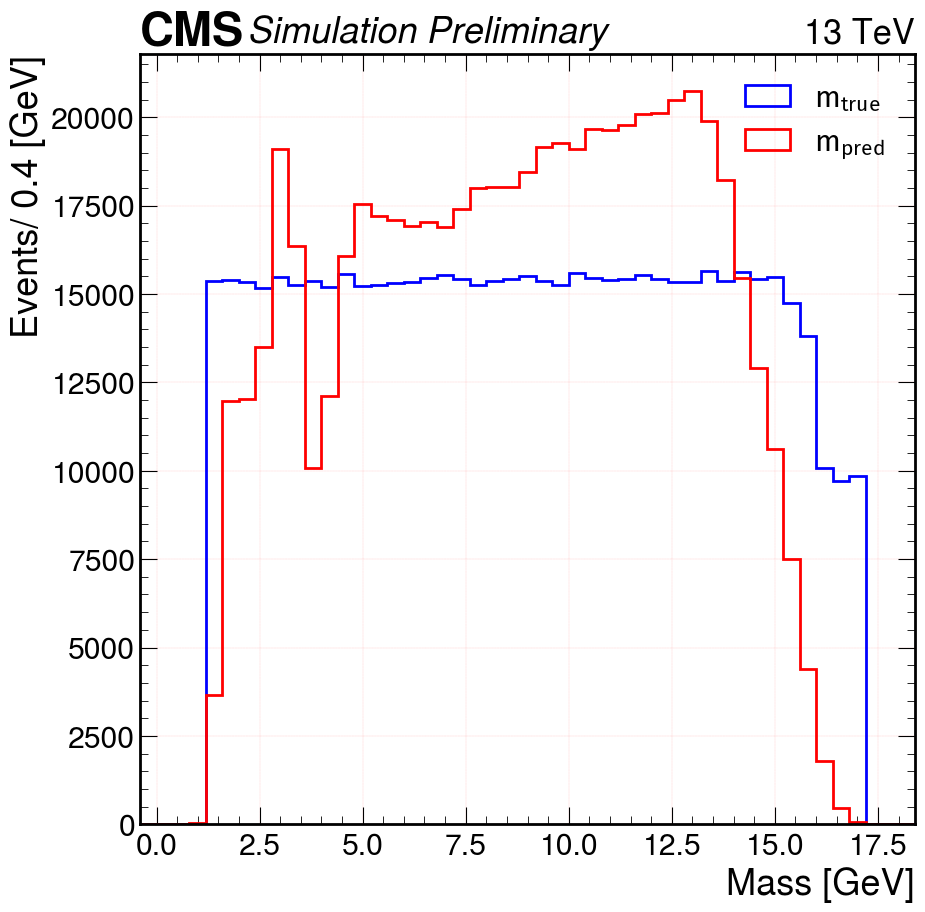

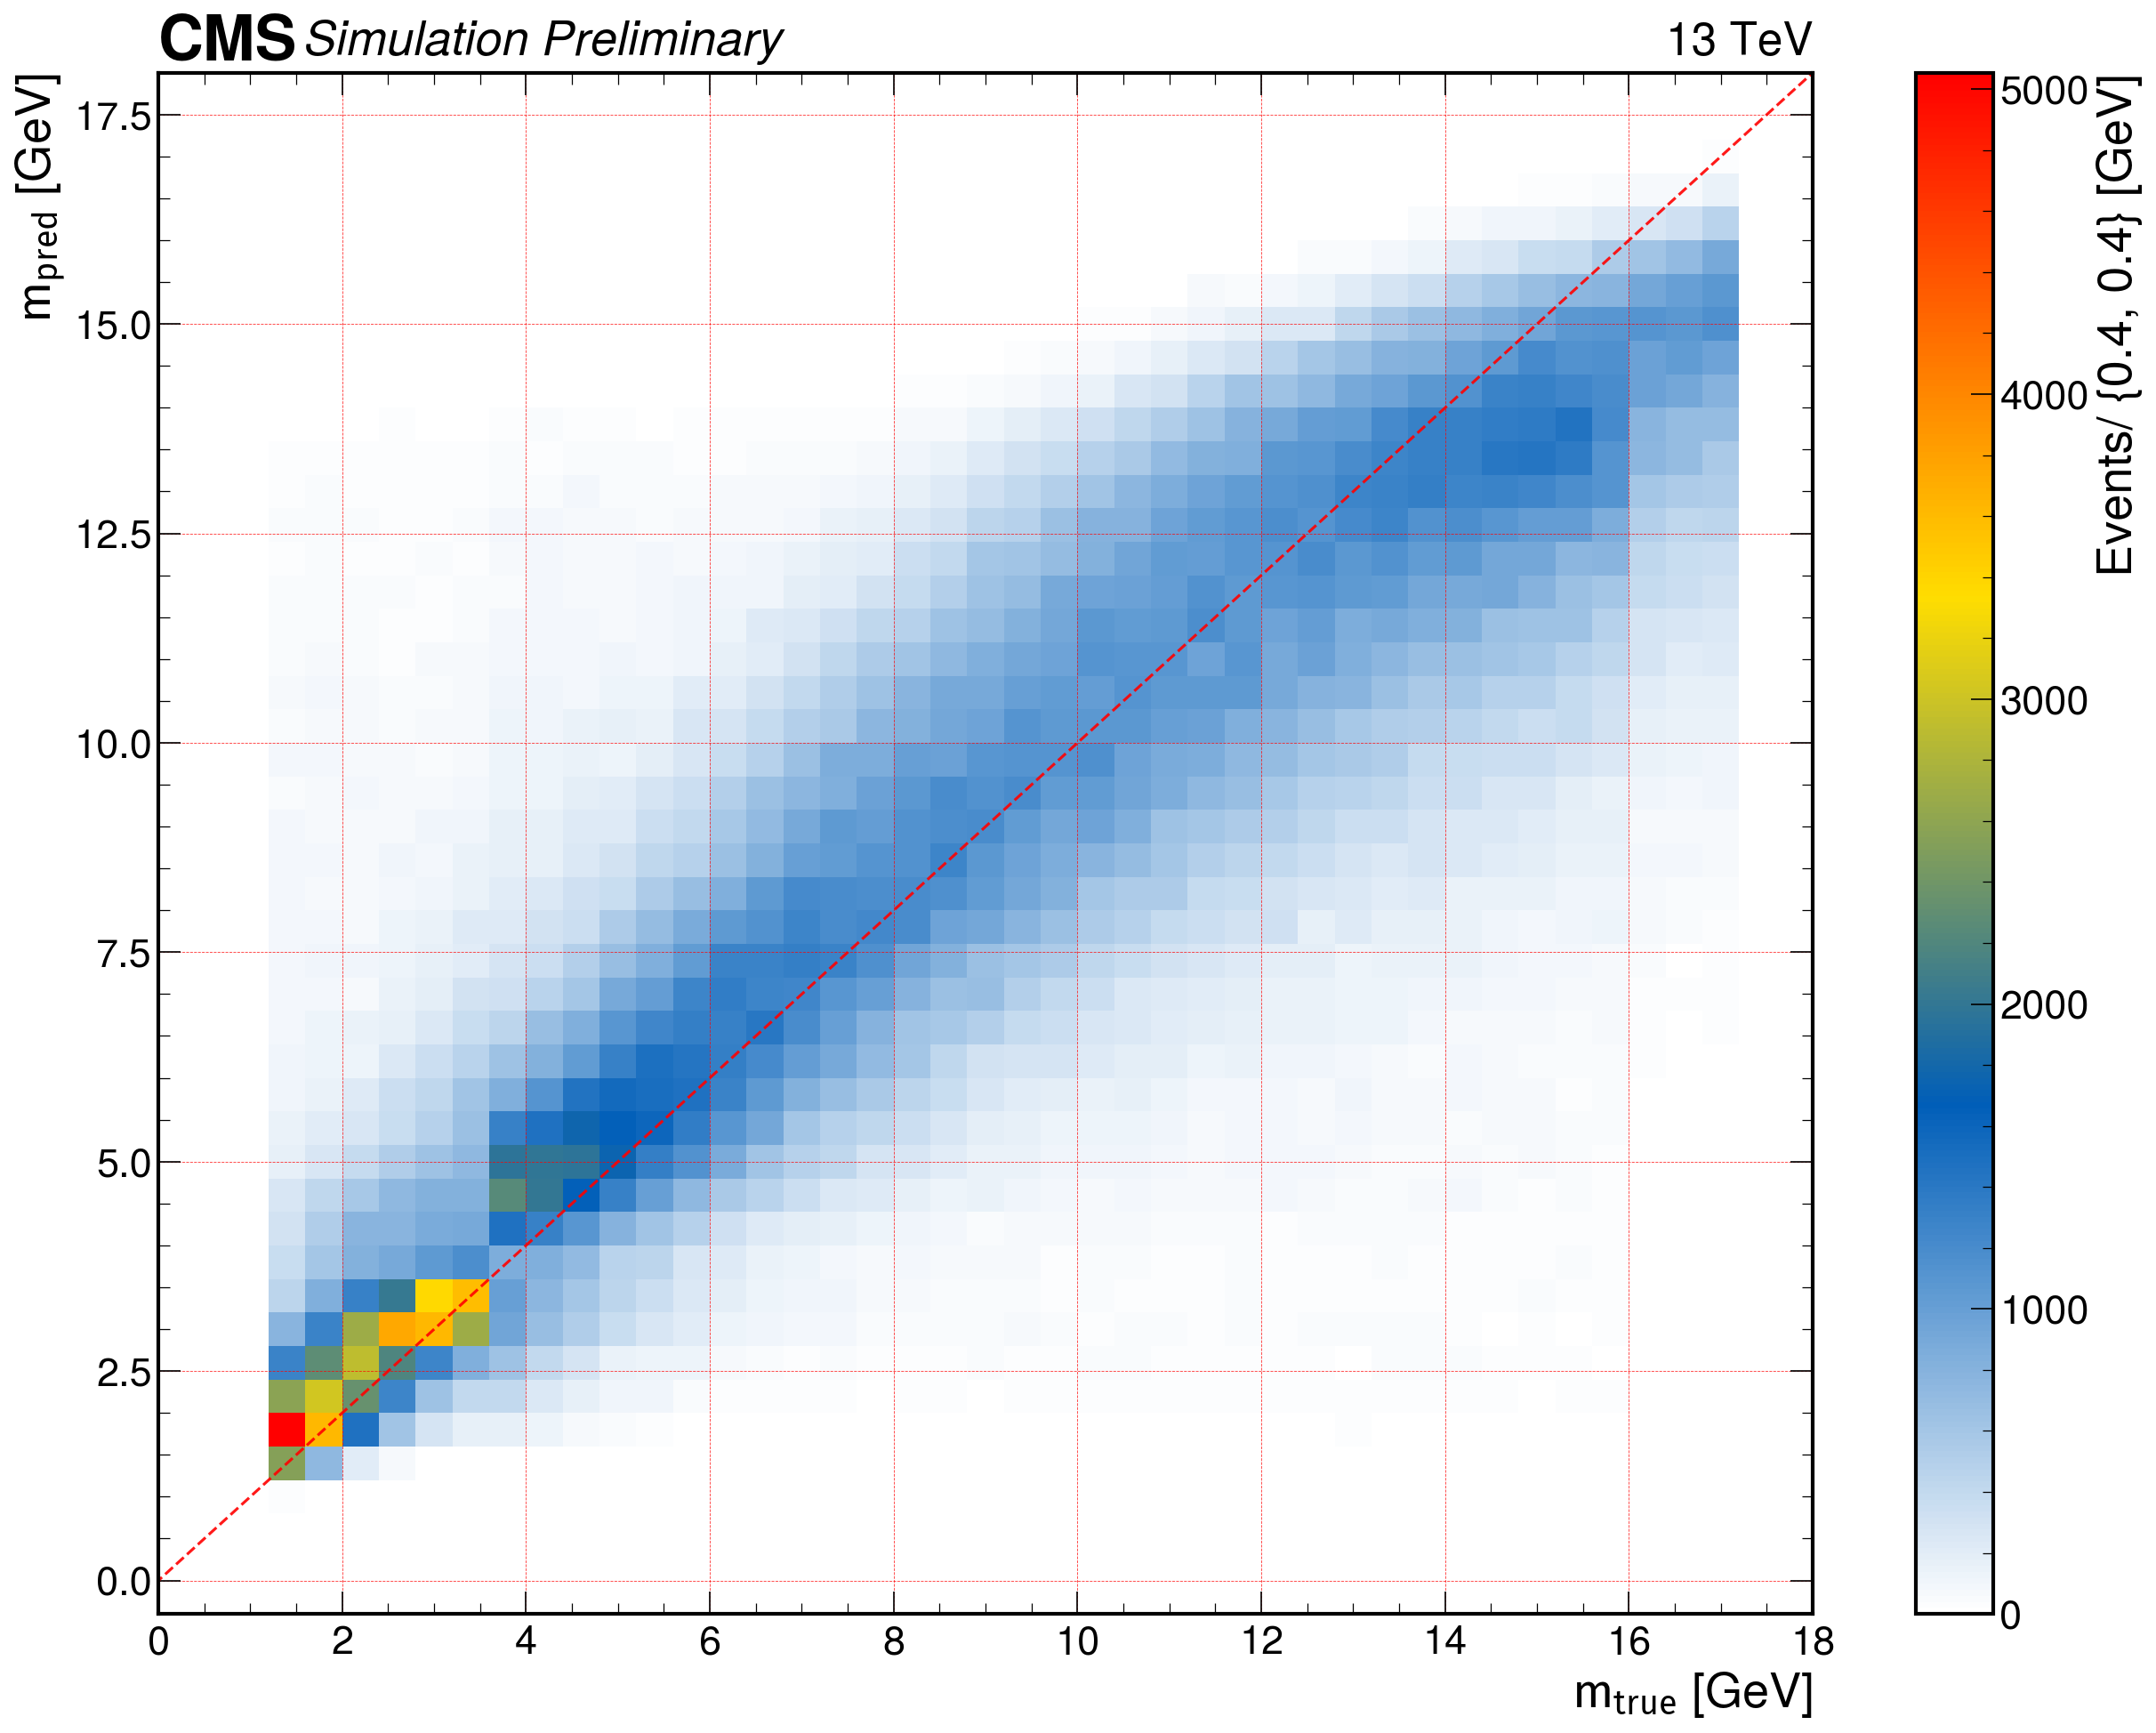

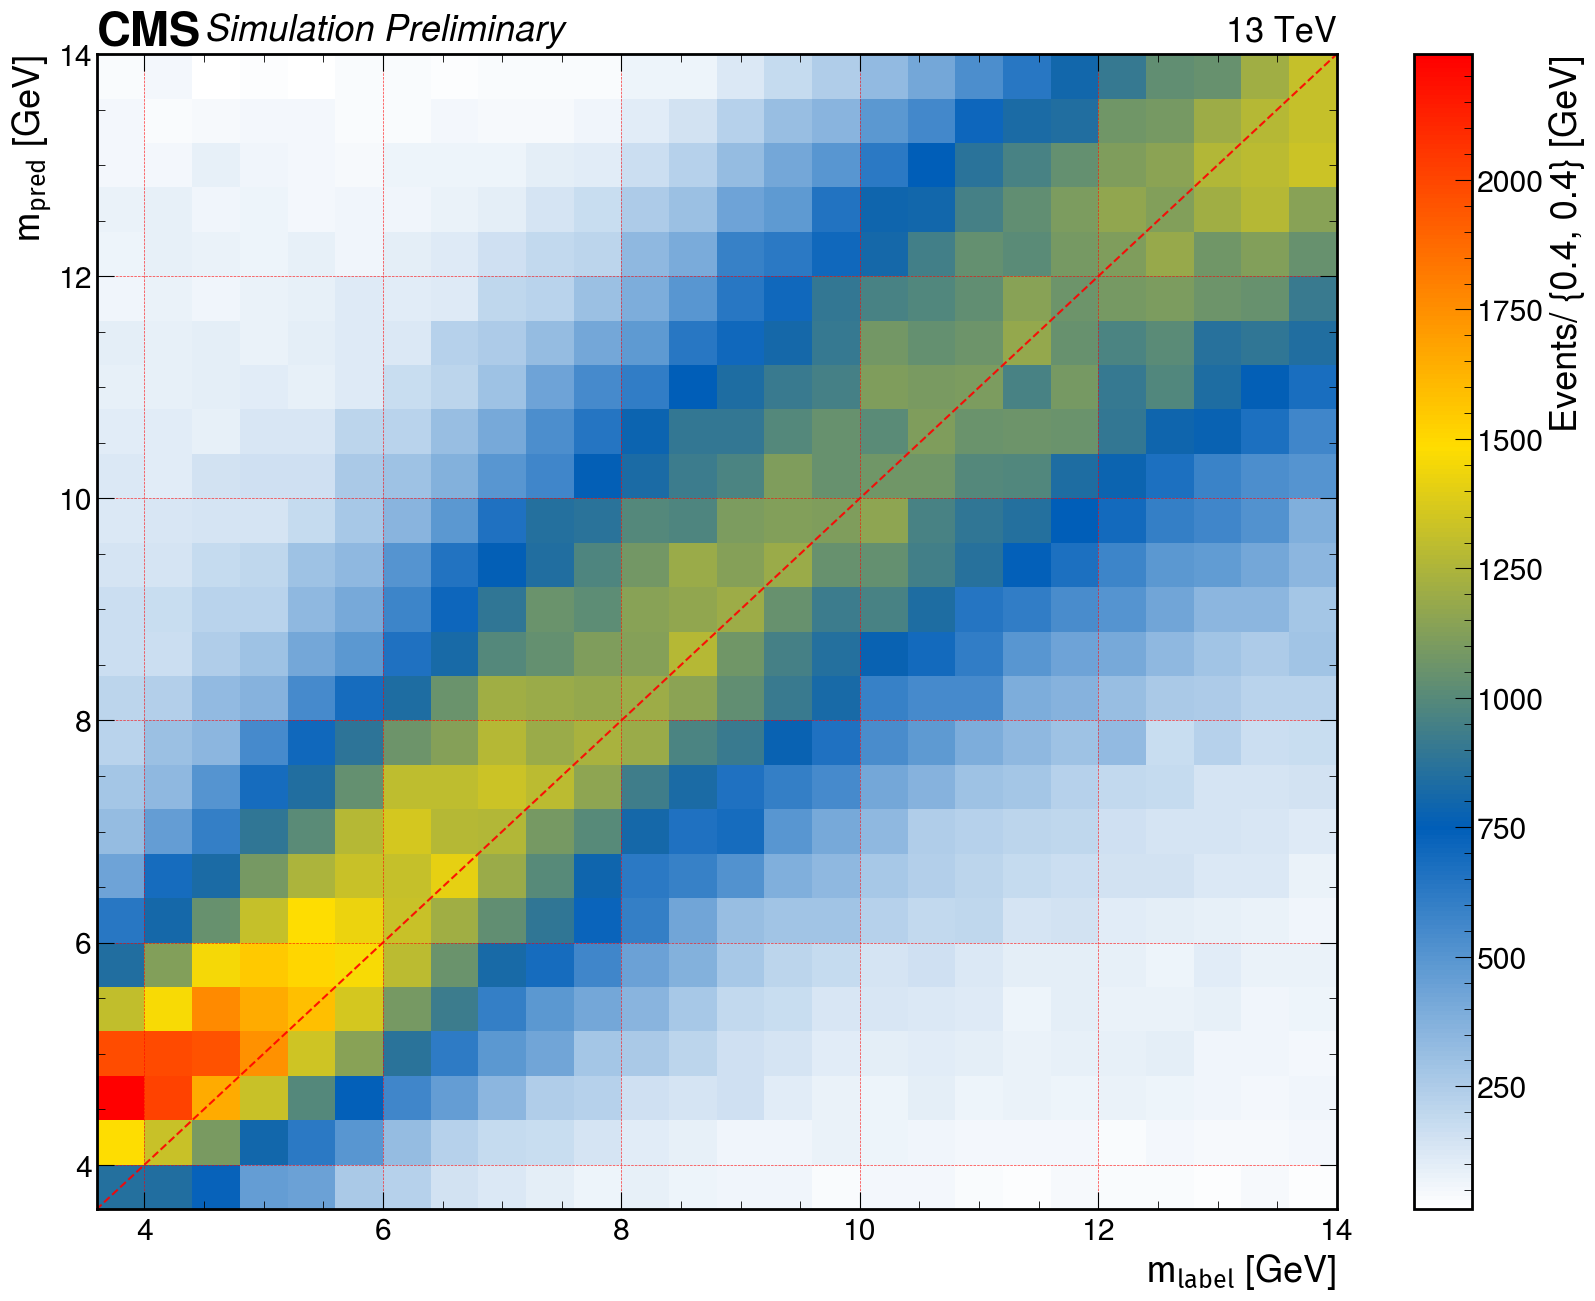

In [9]:
file_in =f'{parent_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'

infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m_true_=data["m_true"]
m_pred_=data["m_pred"]
m_true_ = np.concatenate(m_true_)
m_pred_ = np.concatenate(m_pred_)  


m0_min = 0.8
m0_max = 17.2
bin_size = 0.4
fig, ax = plt.subplots()
plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
plt.xlim(m0_min-1.2,m0_max+1.2)
# plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
plt.grid(color='r', linestyle='--', linewidth=.1)
plt.xlabel('Mass [GeV]')
plt.ylabel('Events/ 0.4 [GeV]')
# plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
plt.legend(loc='upper right')
hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()



# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Truncated version
fig, ax = plt.subplots(figsize=(20,15))
hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(3.6, 14.1, .8),size=15)
# plt.yticks(np.arange(3.6, 14.1, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
plt.grid(color='r', linestyle='--', linewidth=.5)

hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()
exit


In [5]:
data.keys()

dict_keys(['m_true', 'm_pred', 'mae', 'mre'])

# --------------- Test on signals signal------------------

12
1 files found
keys----- dict_keys(['m_true', 'm_pred', 'mae', 'mre', 'm0'])


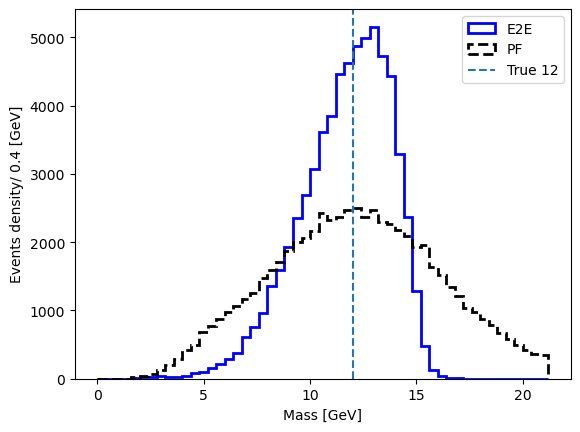

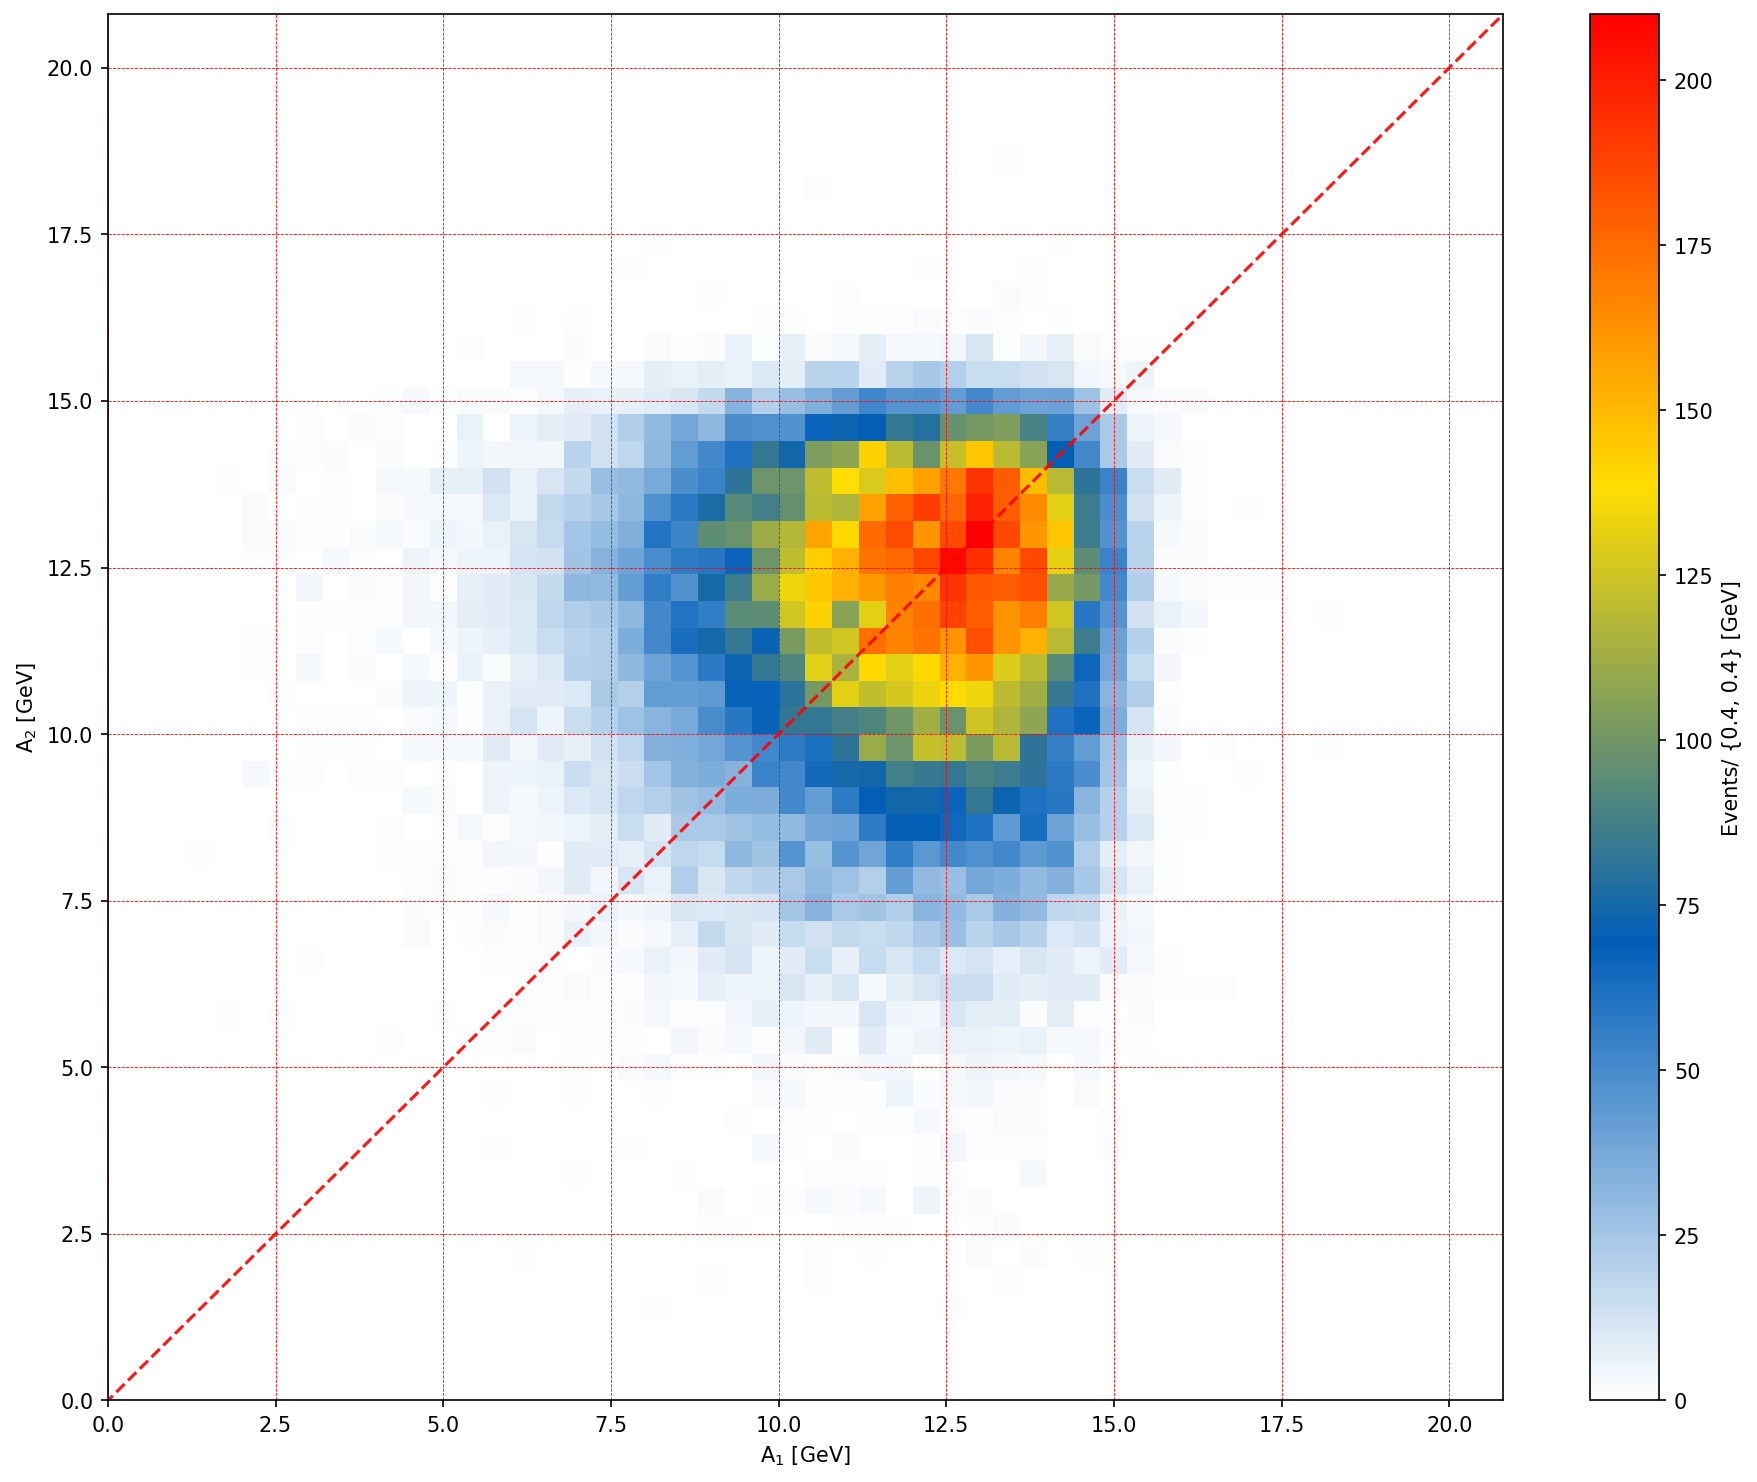

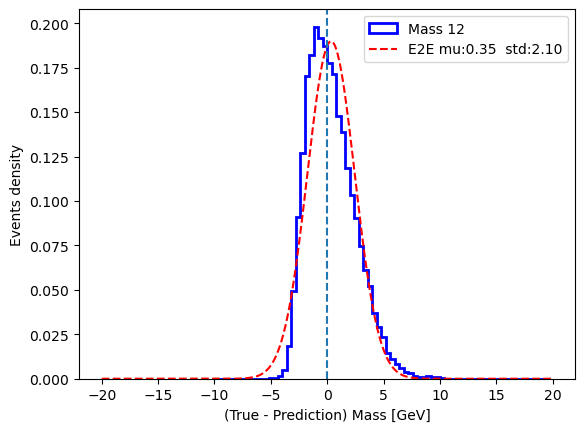

In [6]:
Mass = '12'
mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
print(mass)
paths=np.sort(glob.glob(f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
assert len(paths) > 0
print(f"{len(paths)} files found")

m0_min = 0.8
m0_max = 17.2
bin_size = 0.4




infile = open(f"{paths[0]}", "rb")
data = pickle.load(infile)
print("keys-----", data.keys())
infile.close()
m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m0_ = data["m0"]

m0 = 1.2
m0_max = 20
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(0,m0_max+1.2, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='E2E')
plt.hist(np.array(m0_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='black', linewidth=2, label='PF')
# plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='best')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 

m_pred_1 =[]
m_pred_2 =[]

for i in range(len(m_pred_)): 
    try:
        if i%2: m_pred_1.append(m_pred_[i])
        else: m_pred_2.append(m_pred_[i])
    except:
        if i==0: continue
        if i%2: m_pred_1.append(m_pred_[i])
        else: m_pred_2.append(m_pred_[i])
    

fig, ax = plt.subplots(figsize=(15,12), dpi=150)
plt.hist2d(np.squeeze(m_pred_1), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-0.8, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{A_{1}}$ [GeV]')
plt.ylabel(r'$\mathrm{A_{2}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
# plt.yticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary A Mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()  

residuals = m_true_ - m_pred_
mu, std = norm.fit(residuals)
x = np.linspace(-20,20, num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.squeeze(residuals),bins=np.arange(-10, 20, .4),density=True, histtype='step',  linestyle='-', color='b', linewidth=2, label=f"Mass {Mass}")
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= 0,linestyle='--')
plt.xlabel('(True - Prediction) Mass [GeV]')
plt.ylabel('Events density')
plt.legend(loc='best')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 

### Gaussian fit to prediction

In [78]:
mass = '3p7'
Mass = 3.7
local=f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{mass}_H_AA_4Tau'
rhFileList = '%s/epoch10_val_pseudoscala*.pkl'%(local)
paths = np.sort(glob.glob(rhFileList))
assert len(paths) > 0
print(f"{len(paths)} files found")

1 files found


loaded data file ------>  /global/cfs/cdirs/m4392/bbbam/mass_regression_models_for_validation_tests_using_data_v2/mass_trainer_aToTauTau_m1p2To17p2_v2_13ch/INFERENCE_DATA/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_3p7_H_AA_4Tau/epoch10_val_pseudoscalar_mae2.6245_inference_data.pkl


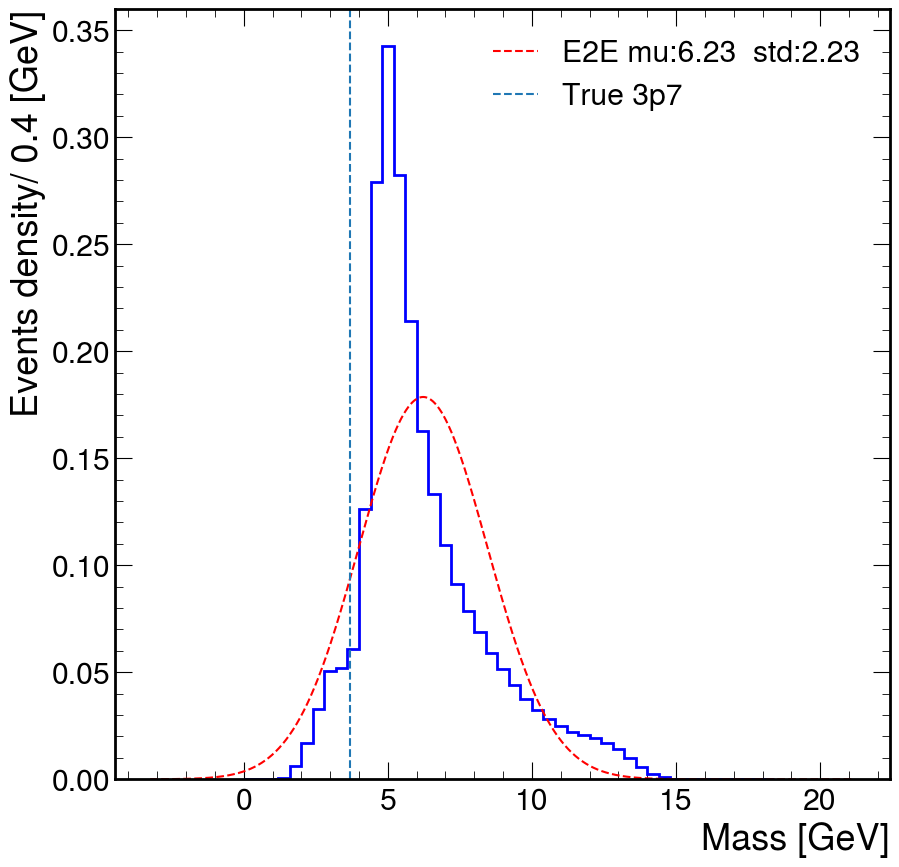

In [79]:
epoch=5

data_file = paths[0]
infile = open(f"{data_file}", "rb")
data = pickle.load(infile)
print(f"loaded data file ------>  {data_file}")
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
mae_ = data["mae"]
mre_ = data["mre"]
m0 = 1.2
m0_max = 17.2
bin_size=0.4
mu, std = norm.fit(m_pred_)
x = np.linspace(min(m_pred_),max(m_pred_), num=1000)
y = norm.pdf(x, mu, std)

fig, ax = plt.subplots()
plt.hist(np.array(m_pred_).flatten(),density=True, range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2)
plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
plt.axvline(x= Mass,linestyle='--',label=f'True {mass}')
plt.xlabel('Mass [GeV]')
plt.ylabel('Events density/ 0.4 [GeV]')
plt.legend(loc='upper right')
# hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

In [86]:
scipy.stats.mode(m_pred_.flatten())

ModeResult(mode=4.734245300292969, count=13)

In [91]:
test = np.array([3.6, 4, 4.4, 4.8, 5.2, 5.6, 6, 6, 6, 3.61, 3.62, 3.63, 3.64, 3.65])

scipy.stats.mode(test)

ModeResult(mode=6.0, count=3)

In [93]:
import numpy as np

# Define the test array
test = np.array([3.6, 4, 4.4, 4.8, 5.2, 5.6, 6, 6, 6, 3.61, 3.62, 3.63, 3.64, 3.65])
test = m_pred_.flatten()
# Define the bin size
bin_size = 0.4

# Create bins from min to max of the test array
bins = np.arange(test.min(), test.max() + bin_size, bin_size)

# Bin the data and get the counts in each bin
hist, bin_edges = np.histogram(test, bins=bins)

# Find the index of the bin with the maximum number of entries
max_bin_index = np.argmax(hist)

# Get the range of the bin with the maximum entries
max_bin_range = (bin_edges[max_bin_index], bin_edges[max_bin_index + 1])

# Output the bin range and the corresponding count
print(f"The bin range {max_bin_range[0]} to {max_bin_range[1]} has the maximum count of {hist[max_bin_index]} elements.")


The bin range 4.752290964126585 to 5.1522909641265855 has the maximum count of 194692 elements.


### fitting gaussion to residuals

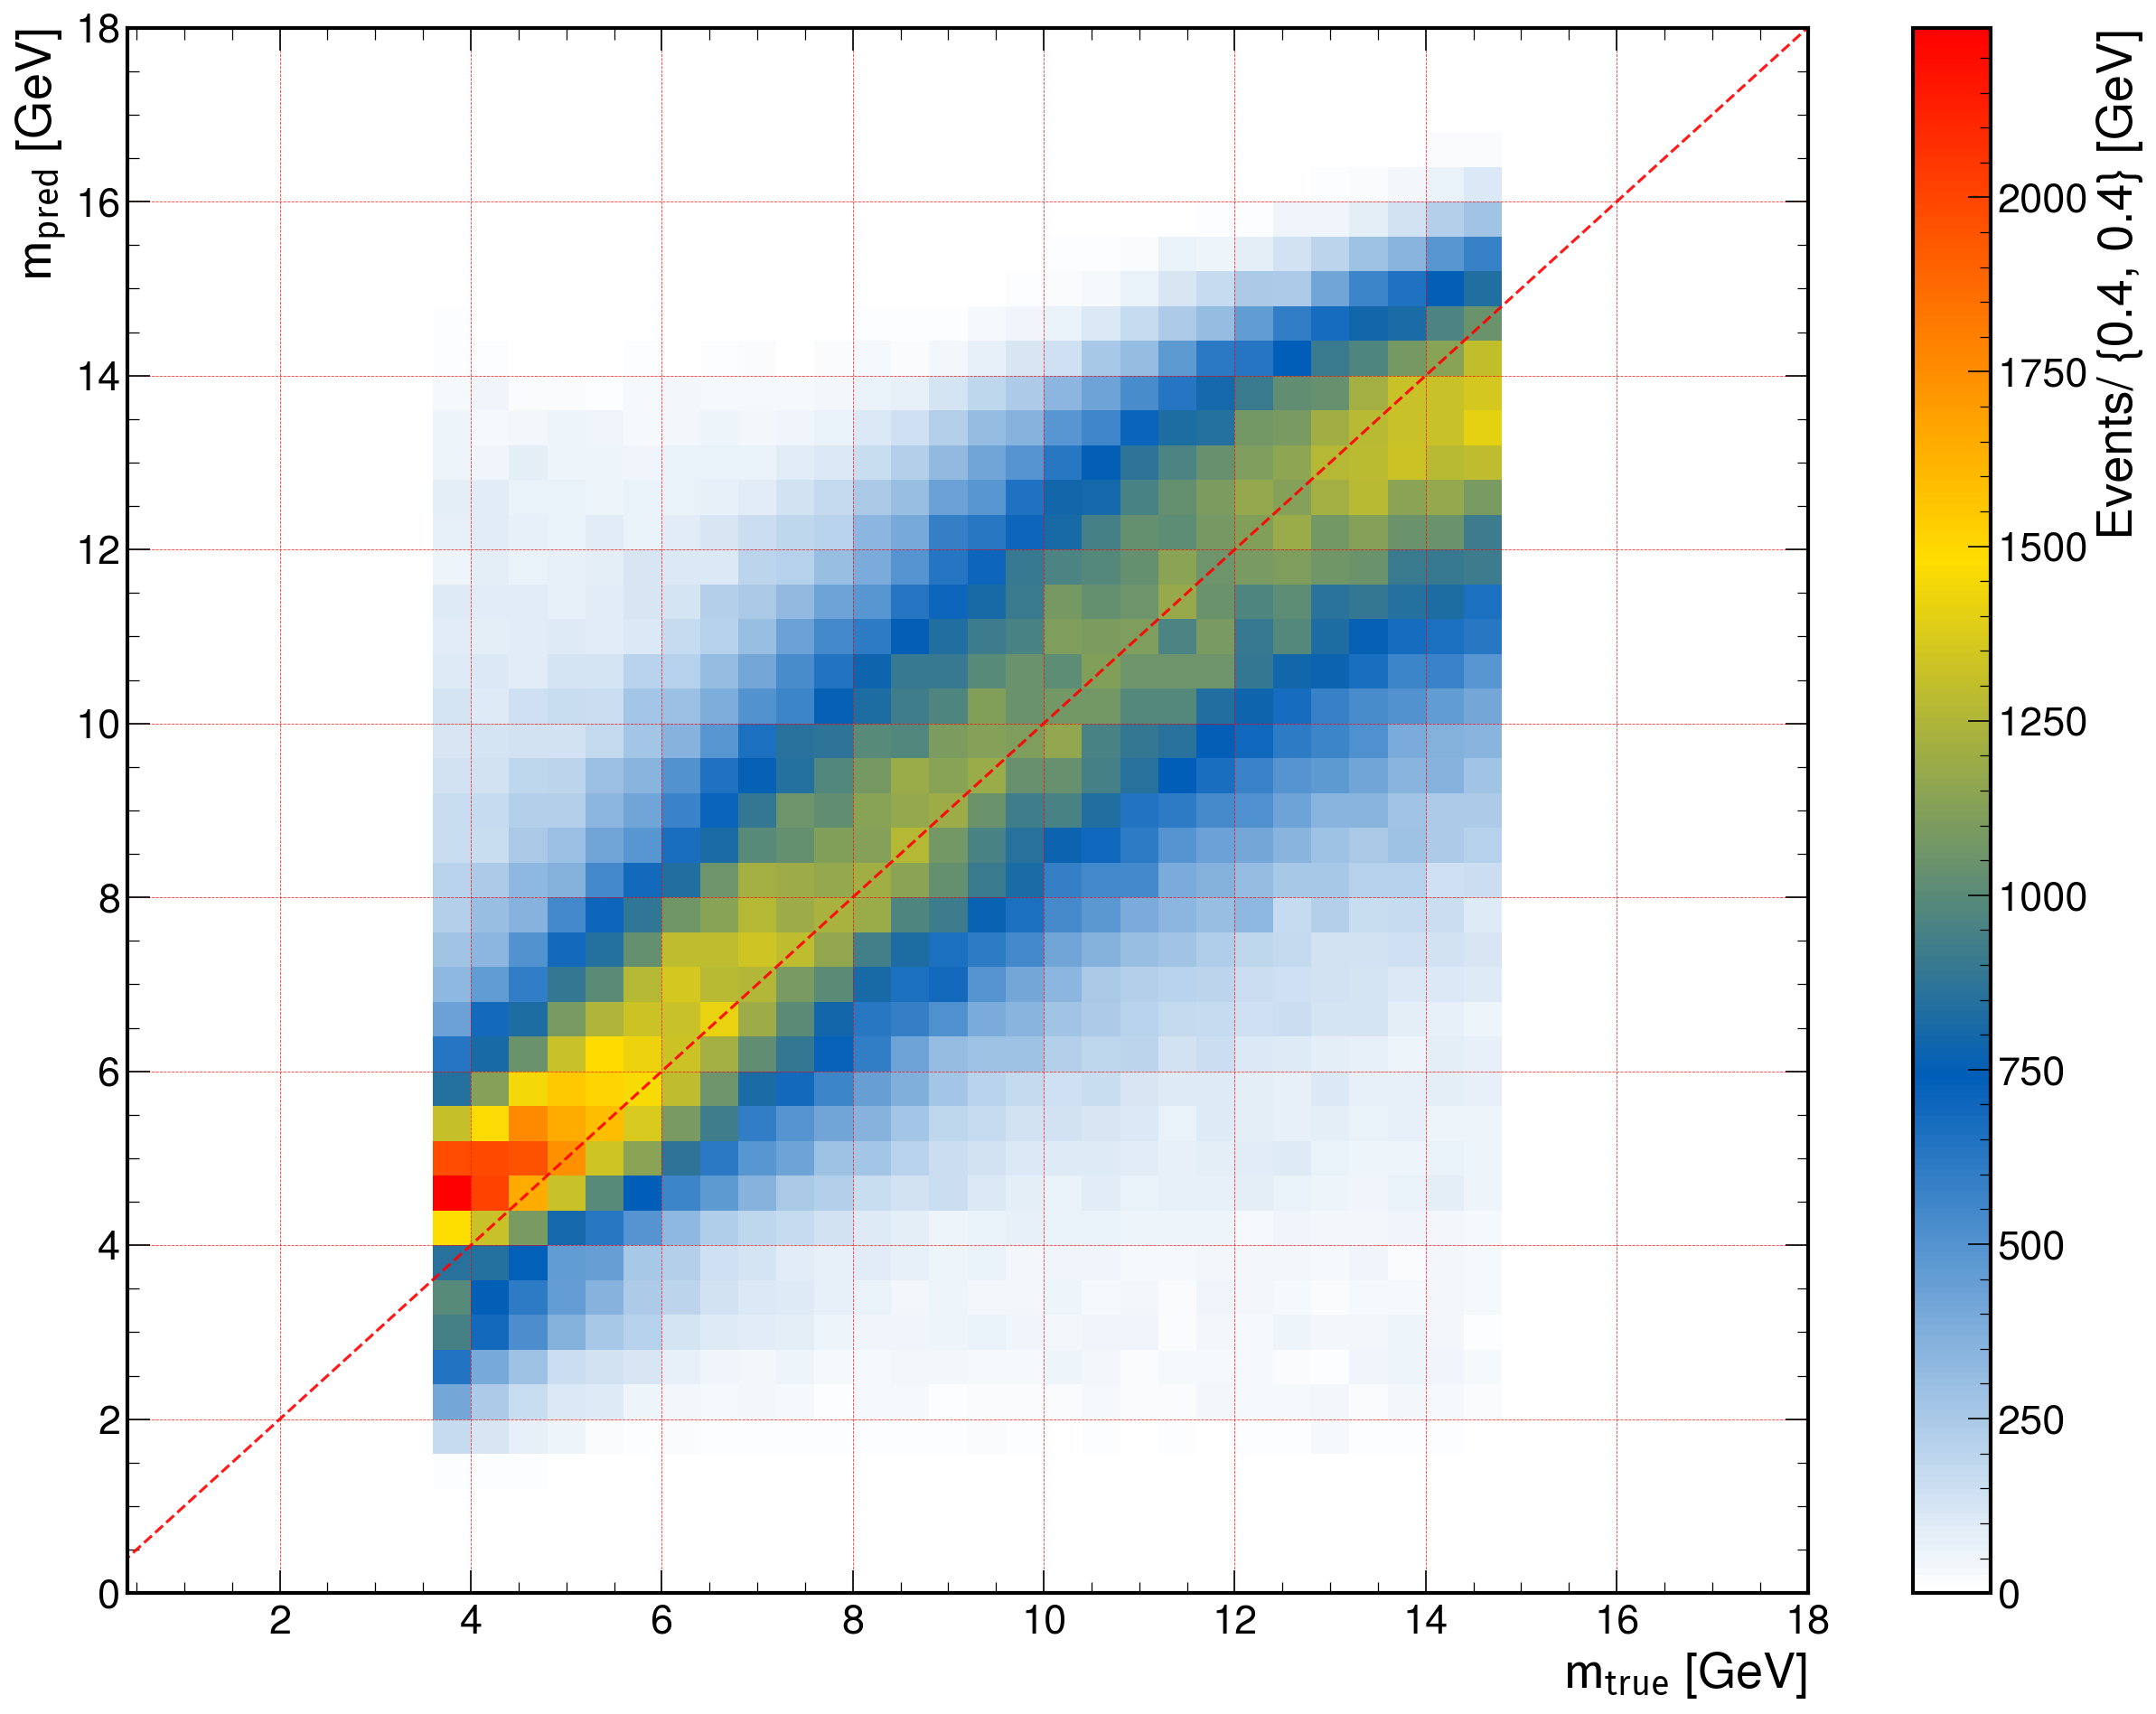

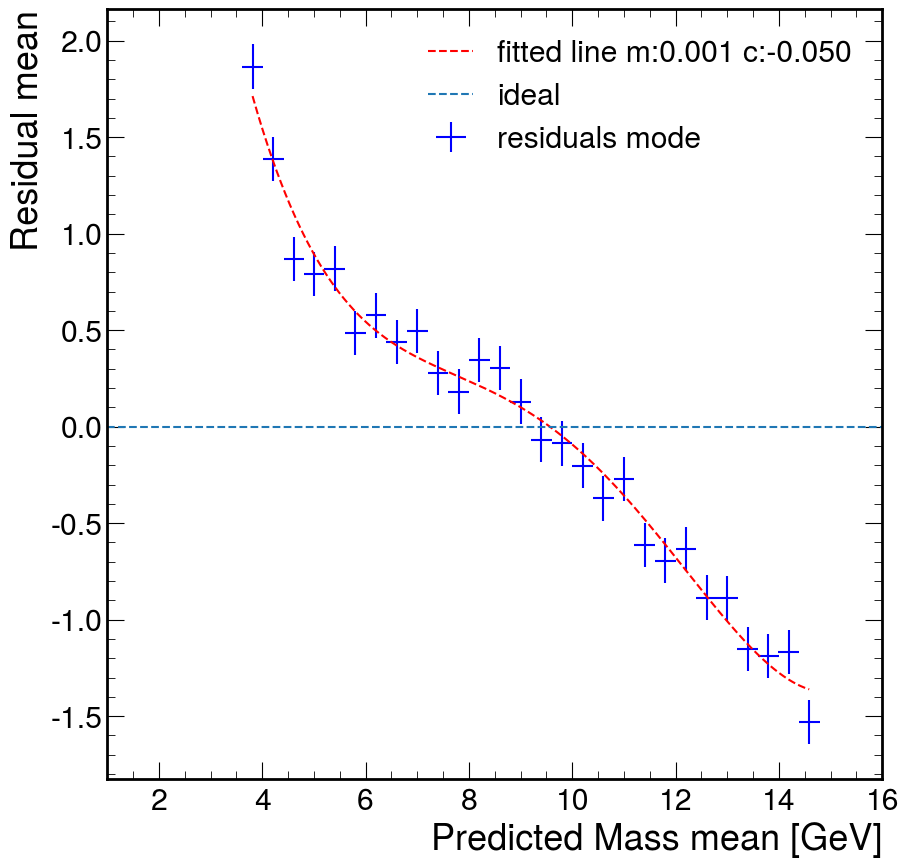

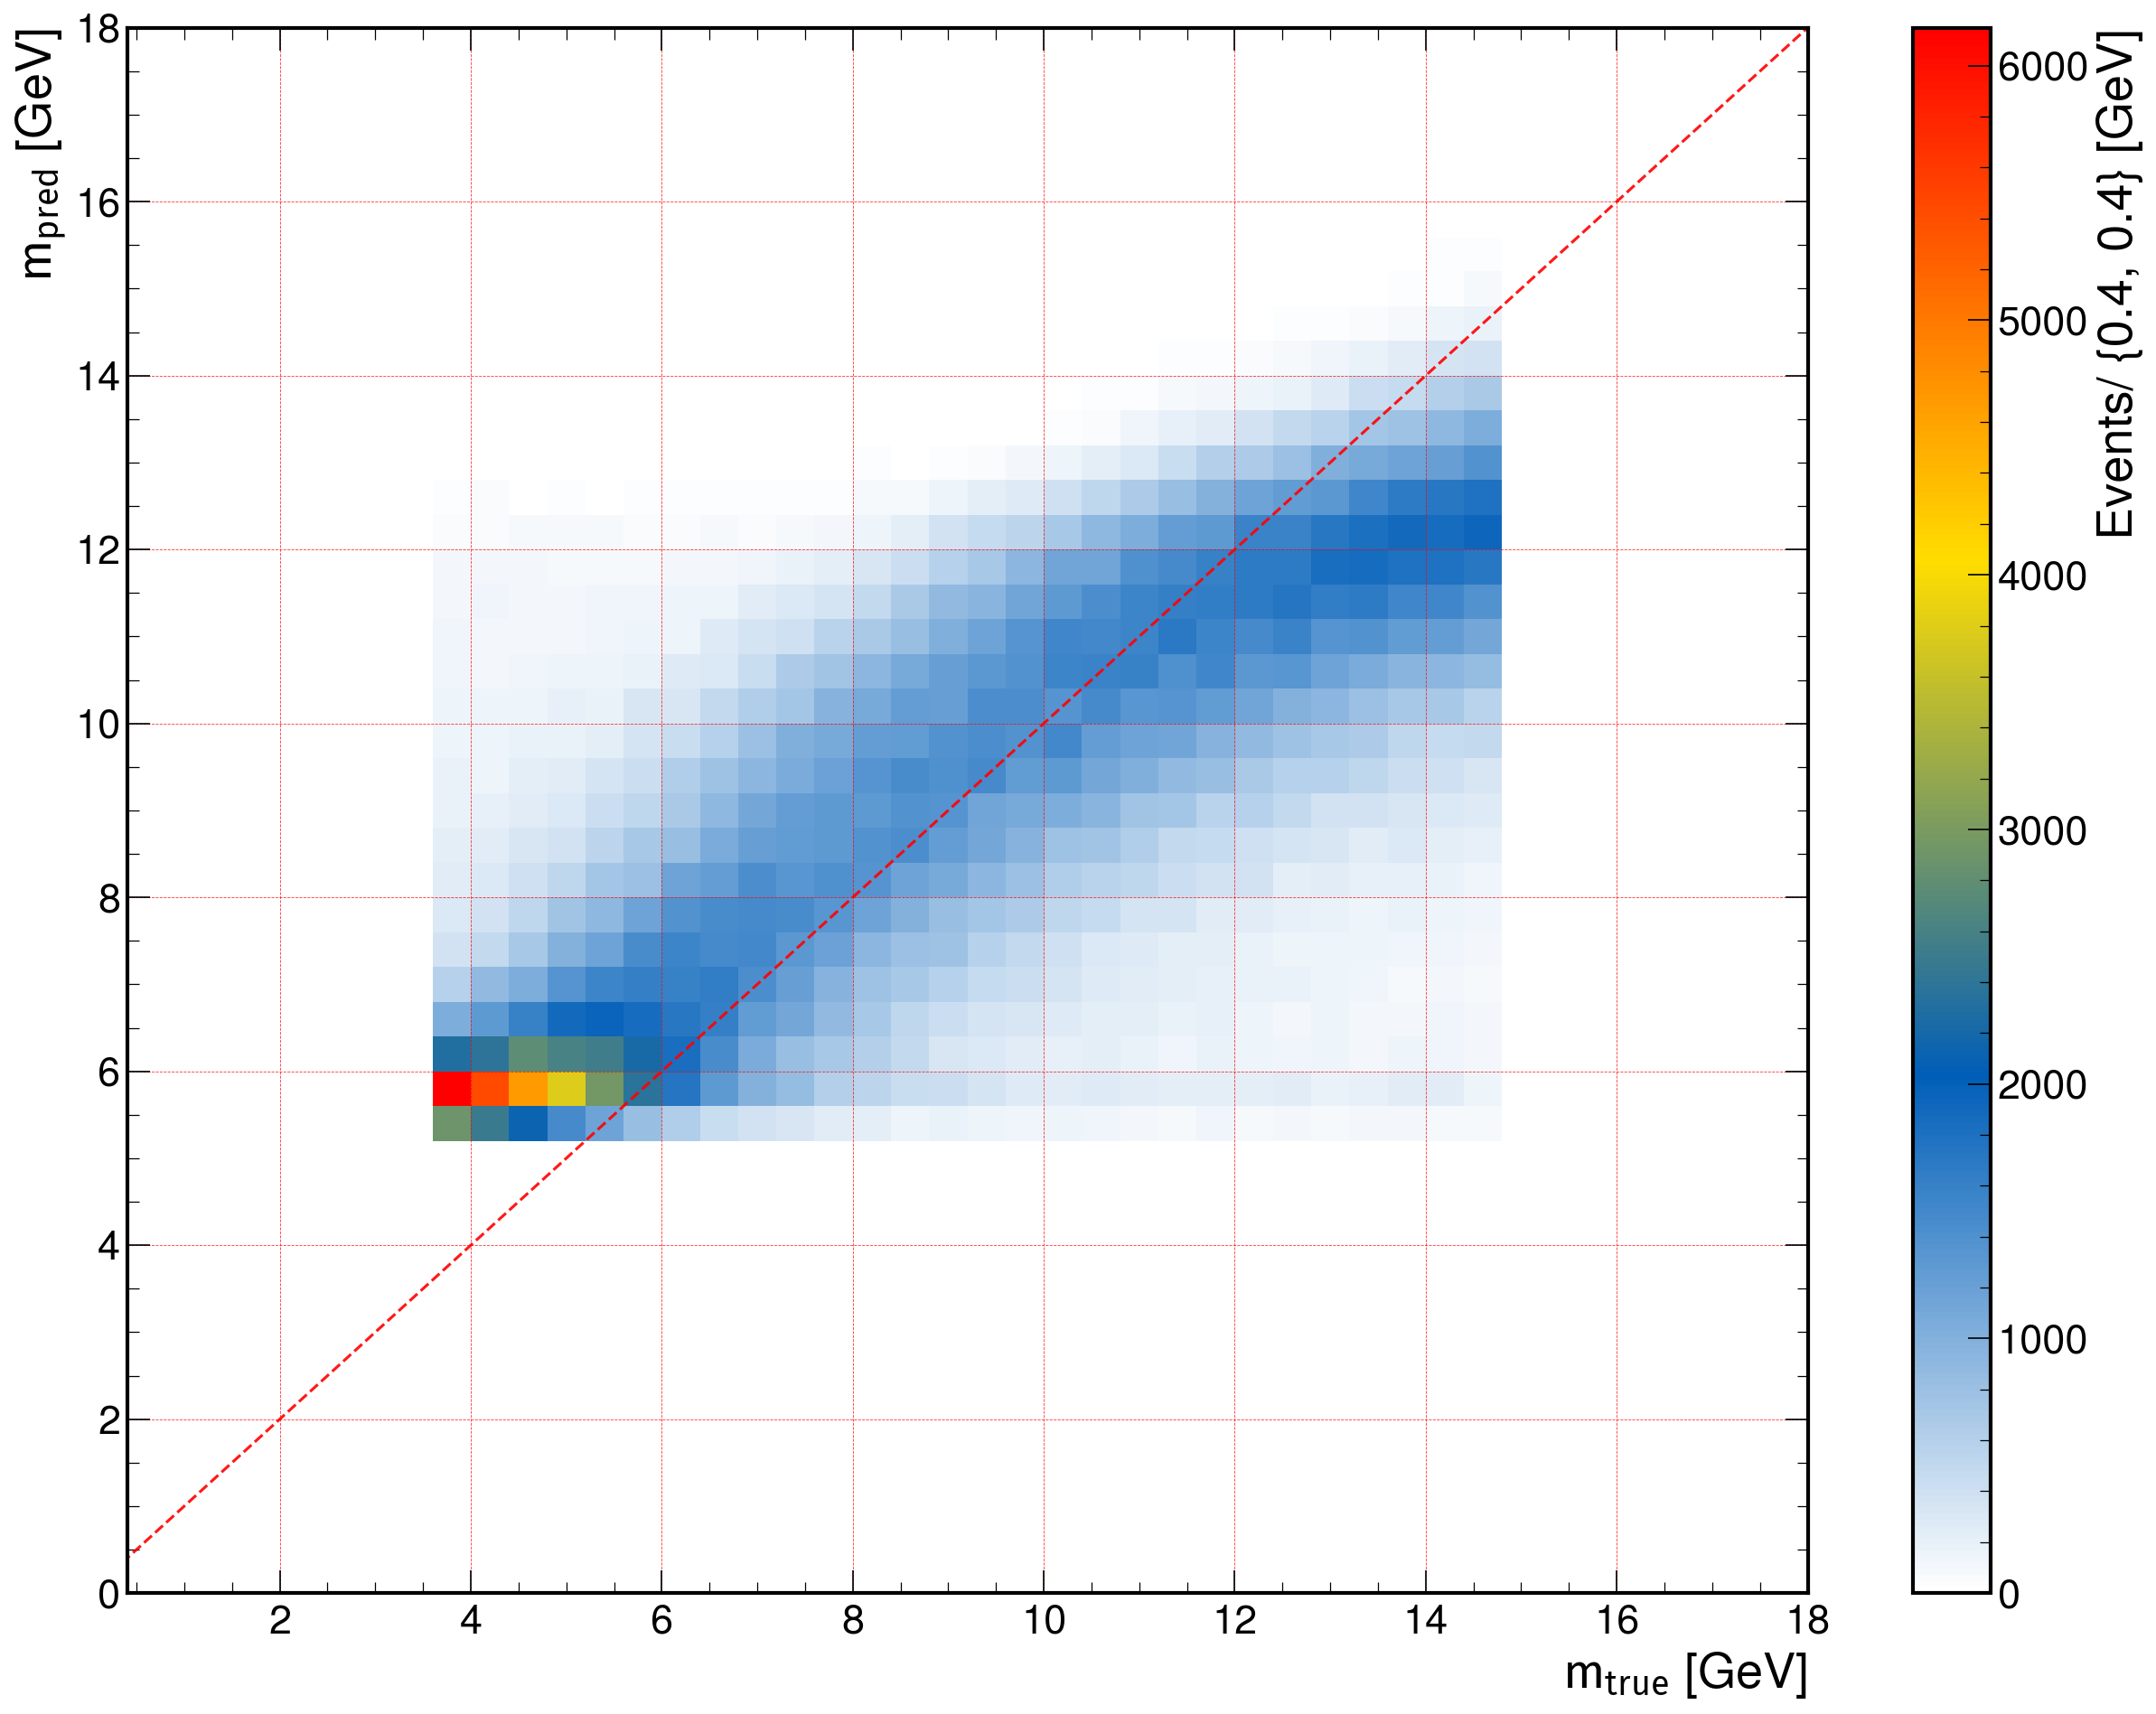

/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:419: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
/global/common/software/nersc/pe/conda-envs/24.1.0/python-3.11/nersc-python/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:424: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2).mean())


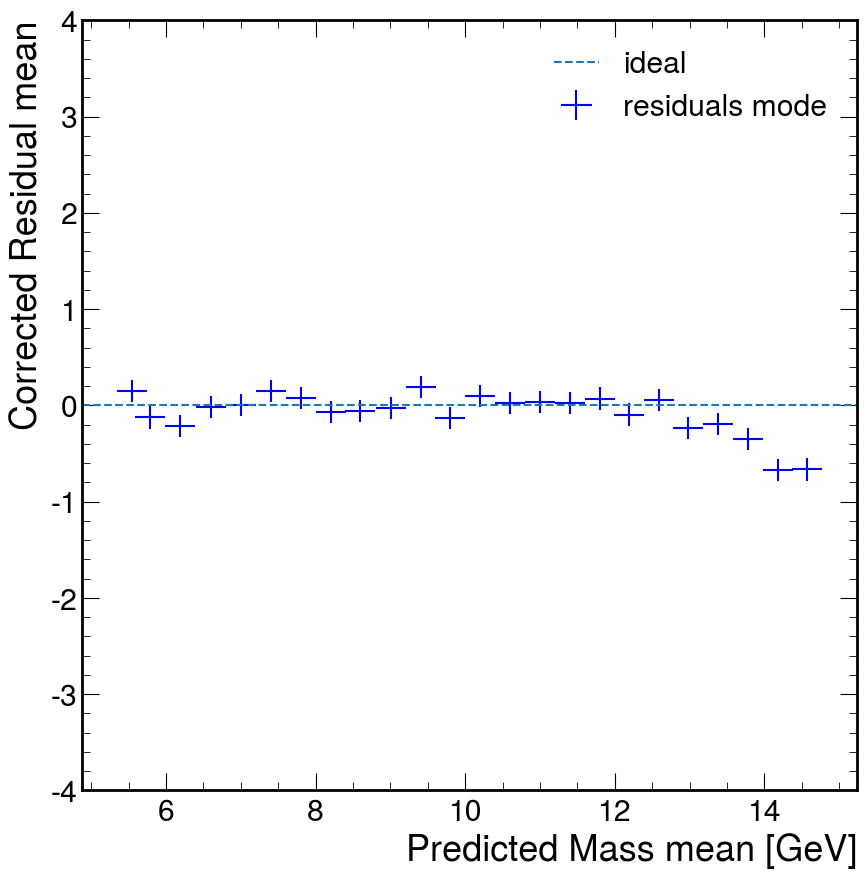

In [55]:
file_in =f'{parent_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'
infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m0_min = 1.2
m0_max = 17.2


m_true_=data["m_true"]
m_pred_=data["m_pred"]
m_true = np.concatenate(m_true_).flatten()
m_pred = np.concatenate(m_pred_).flatten()
mask = (m_true >= 3.6) & (m_true < 14.8)
m_pred = m_pred[mask]
m_true = m_true[mask]

# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true),np.squeeze(m_pred), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Initial calculations
bins = np.arange(3.6, 14.9, 0.4)
mean_pred_bins = []
mean_true_bins = []
residuals_mean = []
residuals_std = []
residuals_mode = []
for i in range(len(bins) - 1):
    temp_mass_pred = m_pred[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = np.mean(m_true[(m_pred >= bins[i]) & (m_pred < bins[i + 1])])
    mean_true_bins.append(temp_mass_true)
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean.append(mu)
    residuals_std.append(std)
    residuals_mode.append(scipy.stats.mode(temp_residual)[0])

# Polynomial fit
coeff_mean = np.polyfit(mean_pred_bins, residuals_mode, 4)
polynomial_mean = np.poly1d(coeff_mean)
x = np.linspace(min(mean_pred_bins), max(mean_pred_bins), num=1000)
y_fit_mean = polynomial_mean(x)

# First plot with error bars
fig, ax = plt.subplots()
plt.errorbar(mean_pred_bins, residuals_mode, xerr=(bins[1] - bins[0]) / 2, yerr=residuals_std, fmt='none', color='b', label='residuals mode')
plt.plot(x, y_fit_mean, color='r', linestyle='--', label=f"fitted line m:{coeff_mean[0]:.3f} c:{coeff_mean[1]:.3f}")
plt.xlim(1, 16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual mean")
plt.legend()
plt.show()

# Correction function
def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

# Load the data again for corrected predictions
infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_true = np.concatenate(m_true_).flatten()
m_pred = np.concatenate(m_pred_).flatten()
mask = (m_true >= 3.6) & (m_true < 14.8)
m_pred = m_pred[mask]
m_true = m_true[mask]
m_pred = corrected_pred(m_pred)

# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true),np.squeeze(m_pred), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Recalculate for corrected predictions
mean_pred_bins = []
mean_true_bins = []
residuals_mean_2 = []
residuals_std_2 = []
residuals_mode_2 = []
for i in range(len(bins) - 1):
    temp_mass_pred = m_pred[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = np.mean(m_true[(m_pred >= bins[i]) & (m_pred < bins[i + 1])])
    mean_true_bins.append(temp_mass_true)
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean_2.append(mu)
    residuals_std_2.append(std)
    residuals_mode_2.append(scipy.stats.mode(temp_residual)[0])

# Second plot with error bars
fig, ax = plt.subplots()
plt.errorbar(mean_pred_bins, residuals_mode_2, xerr=(bins[1] - bins[0]) / 2, yerr=residuals_std, fmt='none', color='b', label='residuals mode')
plt.ylim(-4, 4)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual mean")
plt.legend()
plt.show()


In [44]:
print(polynomial_mean)

          4           3          2
0.001247 x - 0.04977 x + 0.7083 x - 4.448 x + 10.87


### Corrected pridictions

In [56]:
def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

## Correction 2nd time

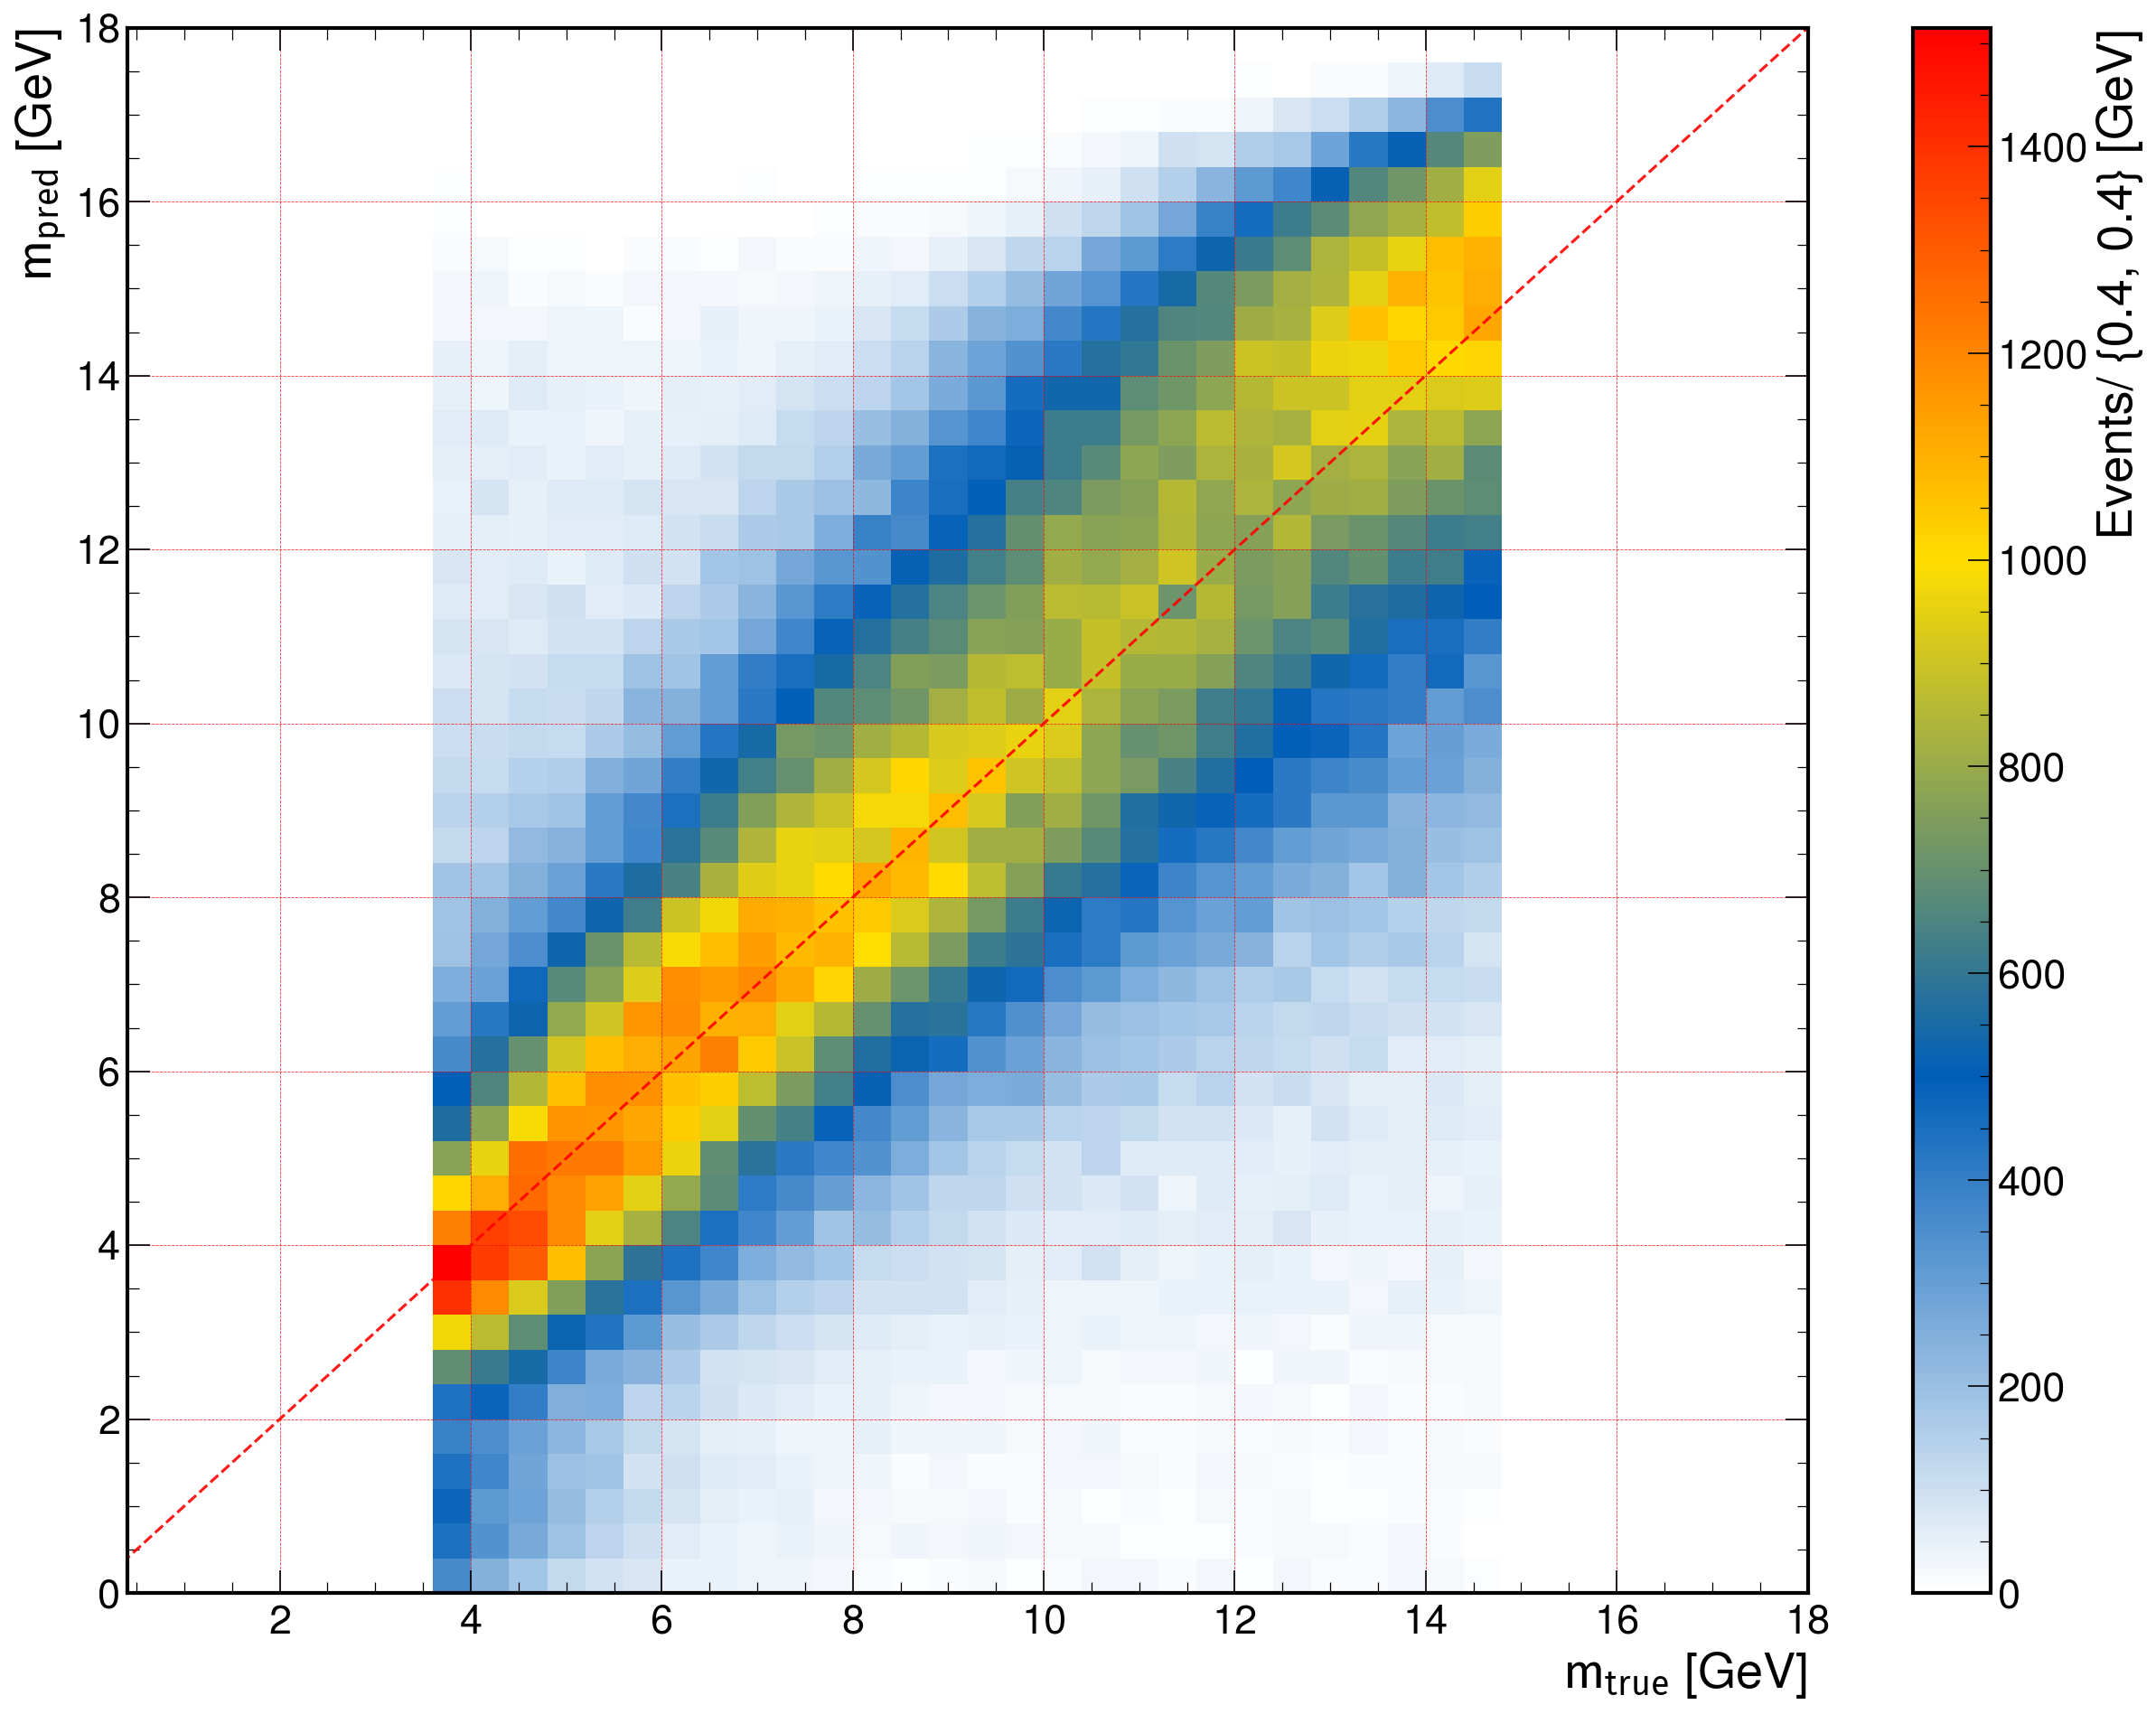

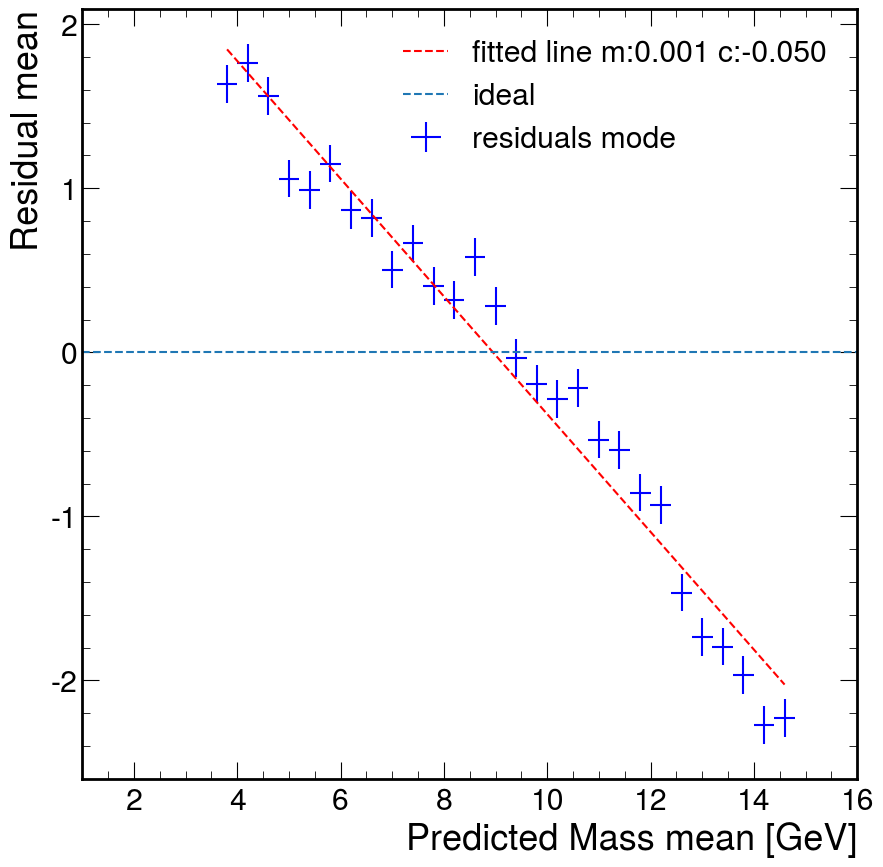

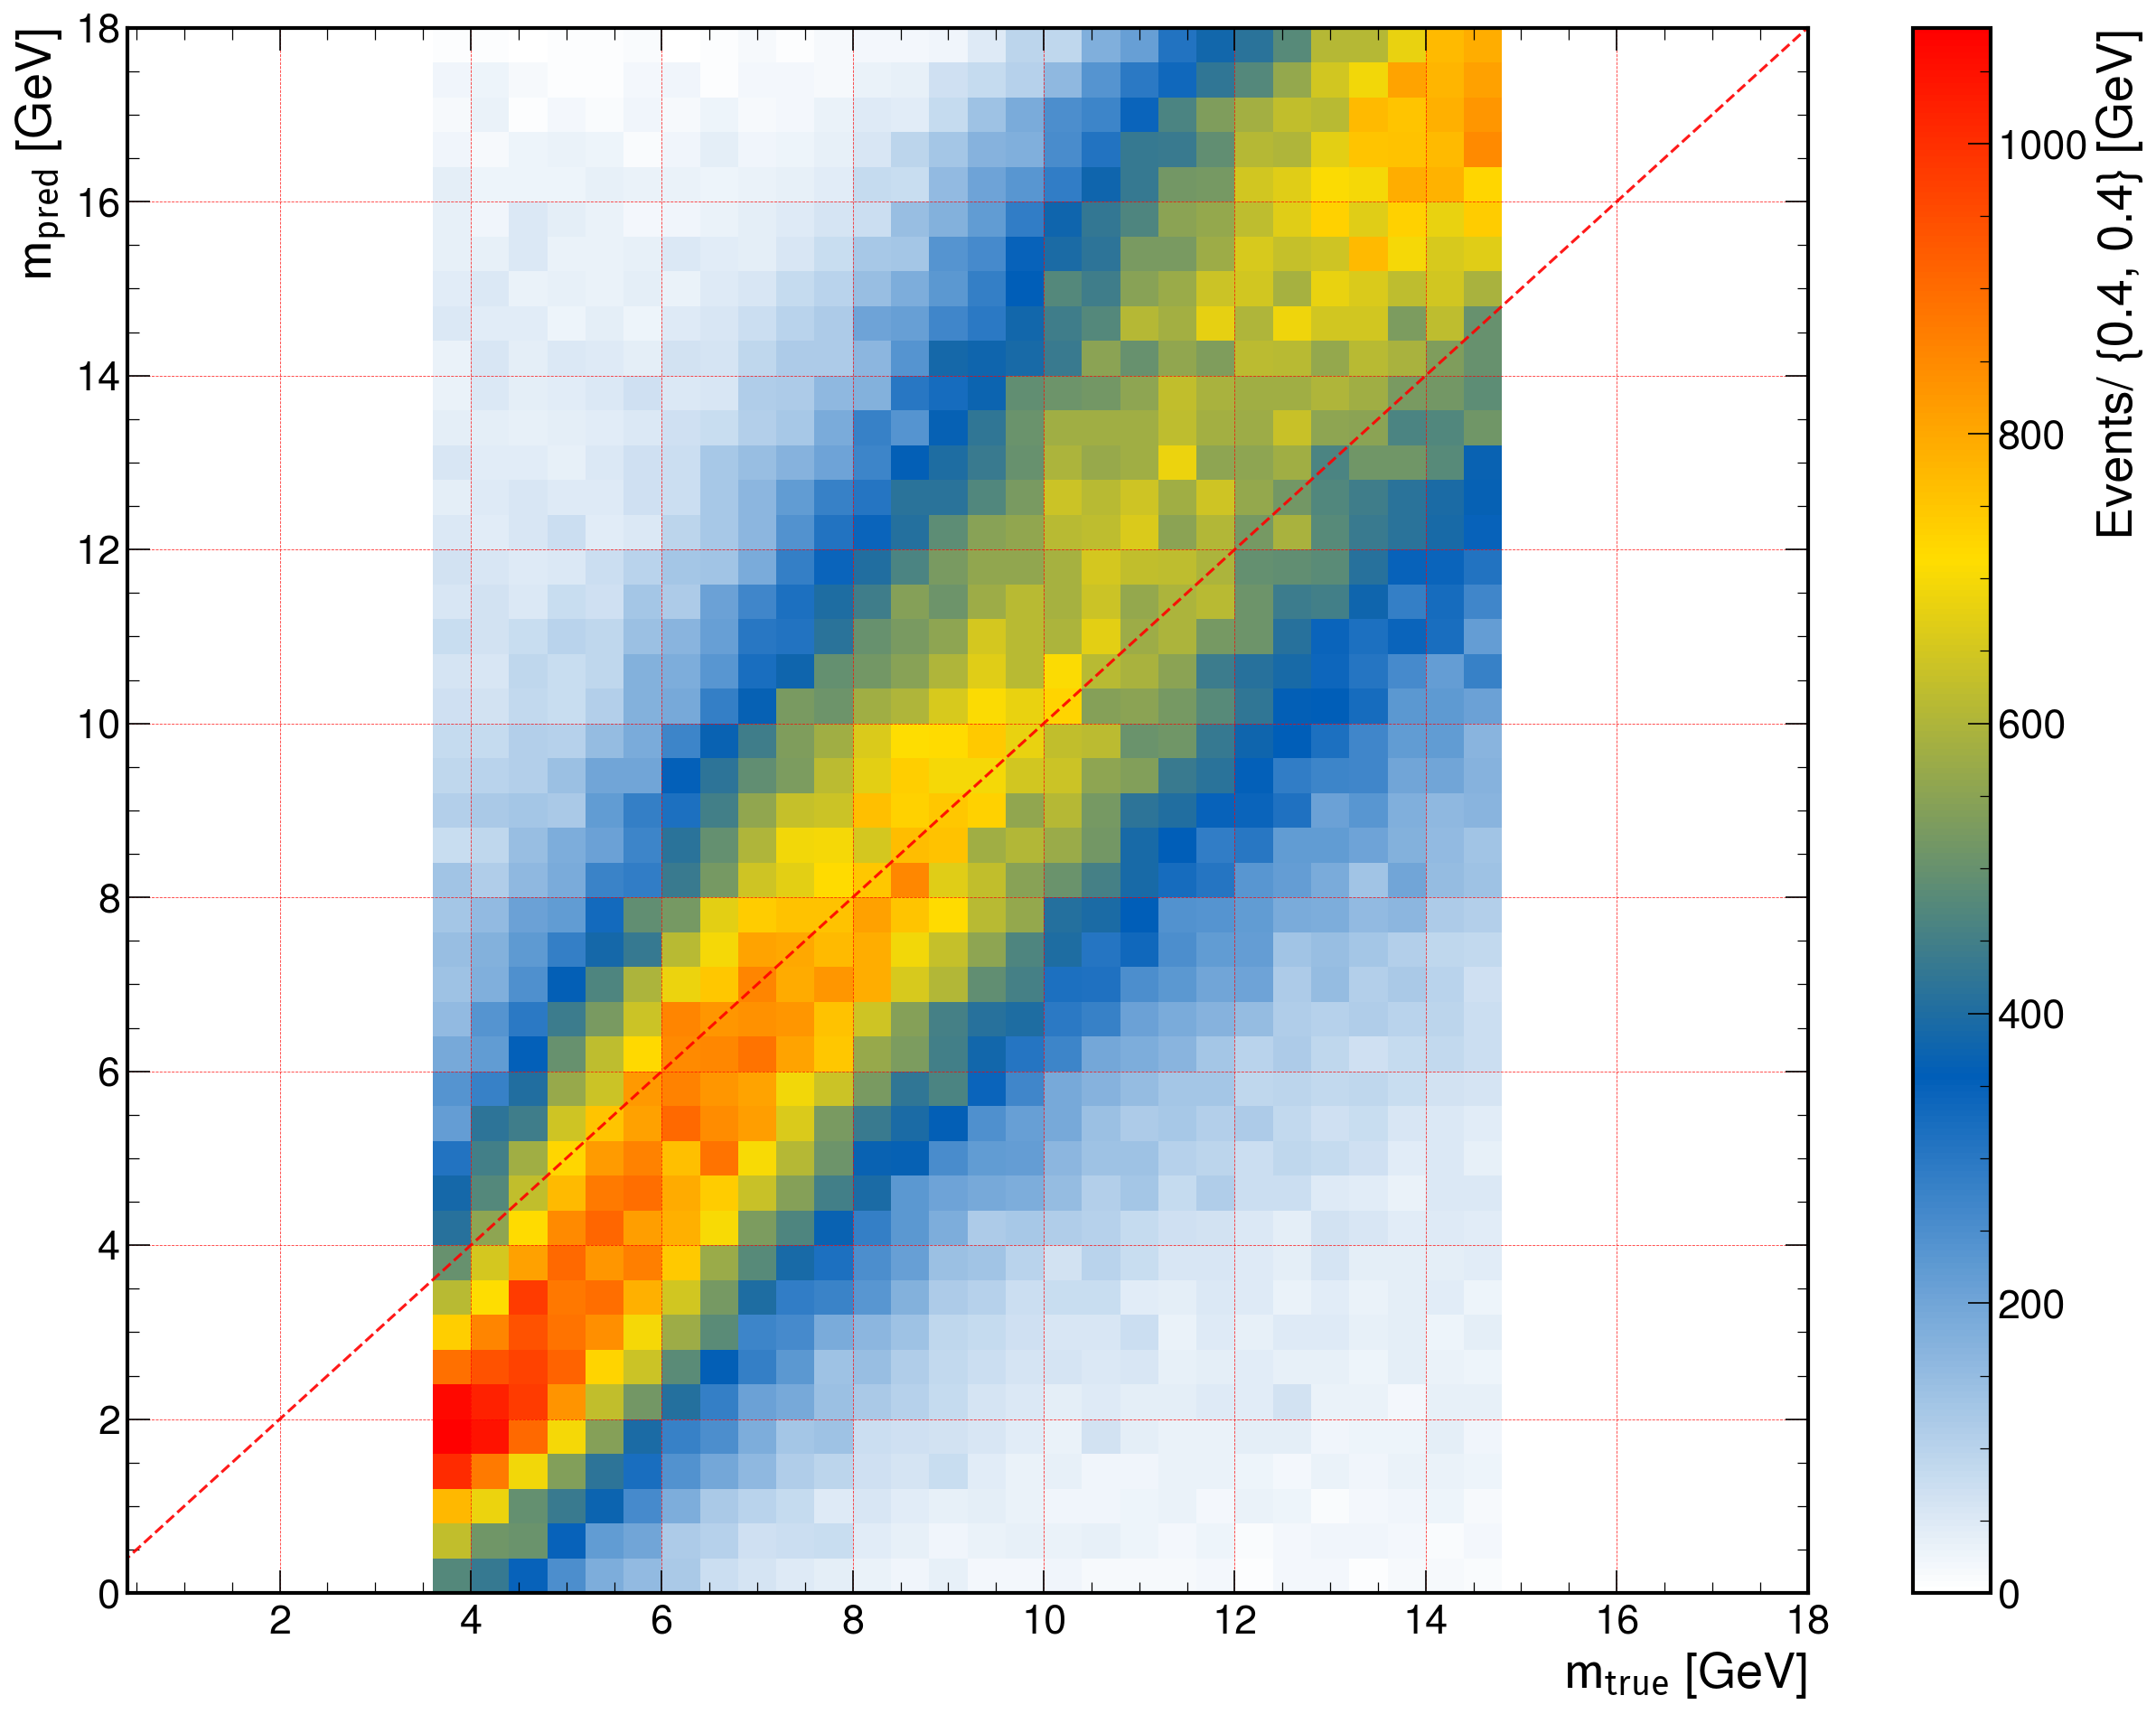

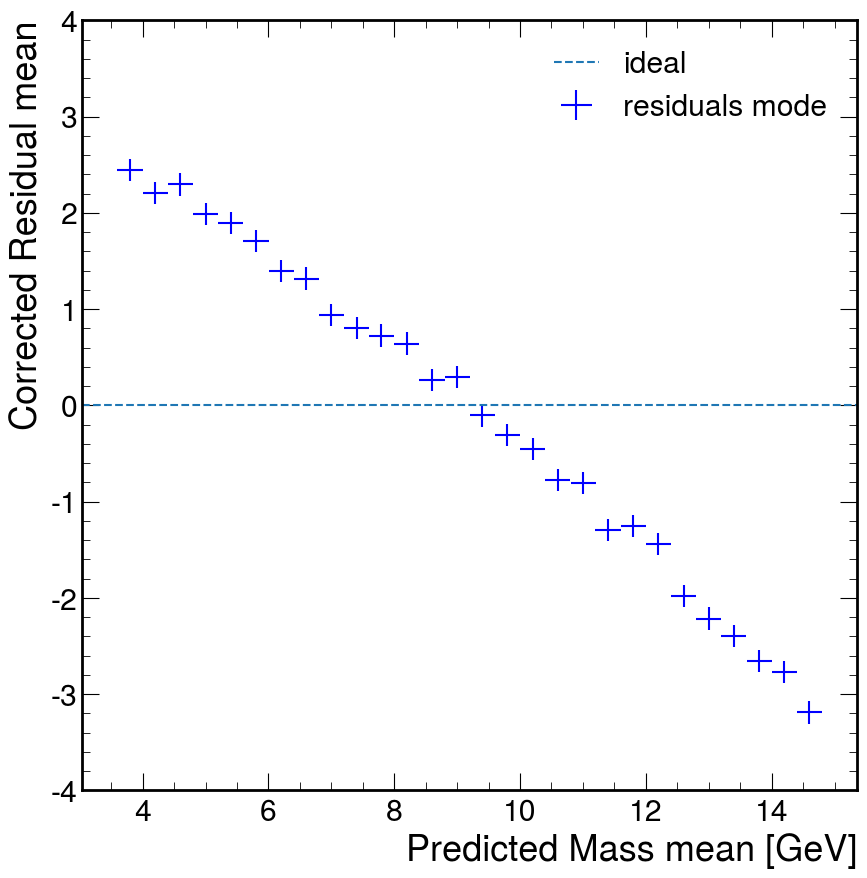

In [46]:
file_in =f'{parent_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'
infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m0_min = 1.2
m0_max = 17.2


m_true_=data["m_true"]
m_pred_=data["m_pred"]
m_true = np.concatenate(m_true_).flatten()
m_pred = np.concatenate(m_pred_).flatten()
mask = (m_true >= 3.6) & (m_true < 14.8)
m_pred = m_pred[mask]
m_true = m_true[mask]
m_pred = corrected_pred(m_pred)

# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true),np.squeeze(m_pred), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()

# Initial calculations
bins = np.arange(3.6, 14.9, 0.4)
mean_pred_bins = []
mean_true_bins = []
residuals_mean = []
residuals_std = []
residuals_mode = []
for i in range(len(bins) - 1):
    temp_mass_pred = m_pred[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = np.mean(m_true[(m_pred >= bins[i]) & (m_pred < bins[i + 1])])
    mean_true_bins.append(temp_mass_true)
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean.append(mu)
    residuals_std.append(std)
    residuals_mode.append(scipy.stats.mode(temp_residual)[0])

# Polynomial fit
coeff_mean2 = np.polyfit(mean_pred_bins, residuals_mode, 1)
polynomial_mean2 = np.poly1d(coeff_mean2)
x = np.linspace(min(mean_pred_bins), max(mean_pred_bins), num=1000)
y_fit_mean = polynomial_mean2(x)

# First plot with error bars
fig, ax = plt.subplots()
plt.errorbar(mean_pred_bins, residuals_mode, xerr=(bins[1] - bins[0]) / 2, yerr=residuals_std, fmt='none', color='b', label='residuals mode')
plt.plot(x, y_fit_mean, color='r', linestyle='--', label=f"fitted line m:{coeff_mean[0]:.3f} c:{coeff_mean[1]:.3f}")
plt.xlim(1, 16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual mean")
plt.legend()
plt.show()

# Correction function
def corrected_pred2(m):
    m = corrected_pred(m)
    mass = m - polynomial_mean2(m)
    return mass

# Load the data again for corrected predictions
infile = open(f"{file_in}", "rb")
data = pickle.load(infile)
infile.close()

m_true_ = data["m_true"]
m_pred_ = data["m_pred"]
m_true = np.concatenate(m_true_).flatten()
m_pred = np.concatenate(m_pred_).flatten()
mask = (m_true >= 3.6) & (m_true < 14.8)
m_pred = m_pred[mask]
m_true = m_true[mask]
m_pred = corrected_pred2(m_pred)

# Extended version
fig, ax = plt.subplots(figsize=(20,15), dpi=150)
plt.hist2d(np.squeeze(m_true),np.squeeze(m_pred), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
# plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
# plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
plt.grid(color='r', linestyle='--', linewidth=.4)
# hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
# plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
plt.show()


# Recalculate for corrected predictions
mean_pred_bins = []
mean_true_bins = []
residuals_mean_2 = []
residuals_std_2 = []
residuals_mode_2 = []
for i in range(len(bins) - 1):
    temp_mass_pred = m_pred[(m_pred >= bins[i]) & (m_pred < bins[i + 1])]
    temp_mean_mass_pred = np.mean(temp_mass_pred)
    mean_pred_bins.append(temp_mean_mass_pred)
    temp_mass_true = np.mean(m_true[(m_pred >= bins[i]) & (m_pred < bins[i + 1])])
    mean_true_bins.append(temp_mass_true)
    temp_residual = temp_mass_true - temp_mass_pred
    mu, std = norm.fit(temp_residual)
    residuals_mean_2.append(mu)
    residuals_std_2.append(std)
    residuals_mode_2.append(scipy.stats.mode(temp_residual)[0])

# Second plot with error bars
fig, ax = plt.subplots()
plt.errorbar(mean_pred_bins, residuals_mode_2, xerr=(bins[1] - bins[0]) / 2, yerr=residuals_std, fmt='none', color='b', label='residuals mode')
plt.ylim(-4, 4)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Corrected Residual mean")
plt.legend()
plt.show()


In [57]:
def plot_1d(corrected=False, file_in=f'{parent_folder_path}/13_channels_aToTauTau_pT30To180_with_mass1p2To17p2_v2_PTscale0.02_ECALscale0_HCALscale1_AOD_m0o14.0_ResNet_blocks3_mae_loss_epochs15_BatchSize1024_from1_ntrain5296128_nval596992_run0/epoch10_val_pseudoscalar_mae1.8745_inference_data.pkl'):
    infile = open(f"{file_in}", "rb")
    data = pickle.load(infile)
    infile.close()

    m_true_=data["m_true"]
    m_pred_=data["m_pred"]
    m_true_ = np.concatenate(m_true_)
    m_pred_ = np.concatenate(m_pred_)  
    mask = (m_true_ > 3.6) & (m_true_ < 14.8)
    m_pred_ = m_pred_[mask]
    m_true_ = m_true_[mask]
    if corrected: m_pred_ = corrected_pred(m_pred_)

    for i in range(len(bins) - 1):
        temp_mass_pred = m_pred_[(m_pred_ >= bins[i]) & (m_pred_ < bins[i + 1])]
        temp_mean_mass_pred = np.mean(temp_mass_pred)
        mean_pred_bins.append(temp_mean_mass_pred)
        temp_mass_true = np.mean(m_true_[(m_pred_ >= bins[i]) & (m_pred_ < bins[i + 1])])
        mean_true_bins.append(temp_mass_true)
        temp_residual = temp_mass_true - temp_mass_pred
        # print(np.mean(temp_residual))

    
    m0_min = 1.2
    m0_max = 17.2
    bin_size = 0.4
    fig, ax = plt.subplots()
    plt.hist(m_true_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{true}}$', linestyle='-', color='blue', linewidth=2)
    plt.hist(m_pred_, range=(m0_min-1.2,m0_max+1.2), bins=len(np.arange(m0_min-1.2,m0_max+1.2,bin_size)), histtype='step', label=r'$\mathrm{m_{pred}}$', linestyle='-', color='red', linewidth=2)
    plt.xlim(m0_min-1.2,m0_max+1.2)
    # plt.xticks(np.arange(m0_min-1.2,m0_max+1.2,.8),)
    plt.grid(color='r', linestyle='--', linewidth=.1)
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events/ 0.4 [GeV]')
    # plt.title(r'$\mathrm{m_{true}}$, $\mathrm{m_{pred}}$ masses',size=25)
    plt.legend(loc='upper right')
    # hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtru_mpred_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()



    # Extended version
    fig, ax = plt.subplots(figsize=(20,15), dpi=150)
    plt.hist2d(np.squeeze(m_true_),np.squeeze(m_pred_), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-1.2, m0_max+1.2, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{true}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=15)
    # plt.yticks(np.arange(m0_min-1.2, m0_max+1.2, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
    plt.grid(color='r', linestyle='--', linewidth=.4)
    # hep.cms.label(llabel=f"Simulation Preliminary ", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_full.png'%(out_dir, epoch), bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()

    # Truncated version
    fig, ax = plt.subplots(figsize=(20,15))
    hist = plt.hist2d(np.squeeze(m_true_), np.squeeze(m_pred_), bins=[np.arange(3.6, 14.1, .4), np.arange(3.6, 14.1, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{m_{label}}$ [GeV]')
    plt.ylabel(r'$\mathrm{m_{pred}}$ [GeV]')
    plt.plot((m0_min, m0_max), (m0_min, m0_max), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(3.6, 14.1, .8),size=15)
    # plt.yticks(np.arange(3.6, 14.1, .8),size=15)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]')
    plt.grid(color='r', linestyle='--', linewidth=.5)

    # hep.cms.label(llabel=f"Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    # plt.savefig('%s/%d_mtrue_mpred_2D_hist_truncated.png'%(out_dir, epoch),  bbox_inches='tight', dpi=300, facecolor = "w")
    plt.show()
    


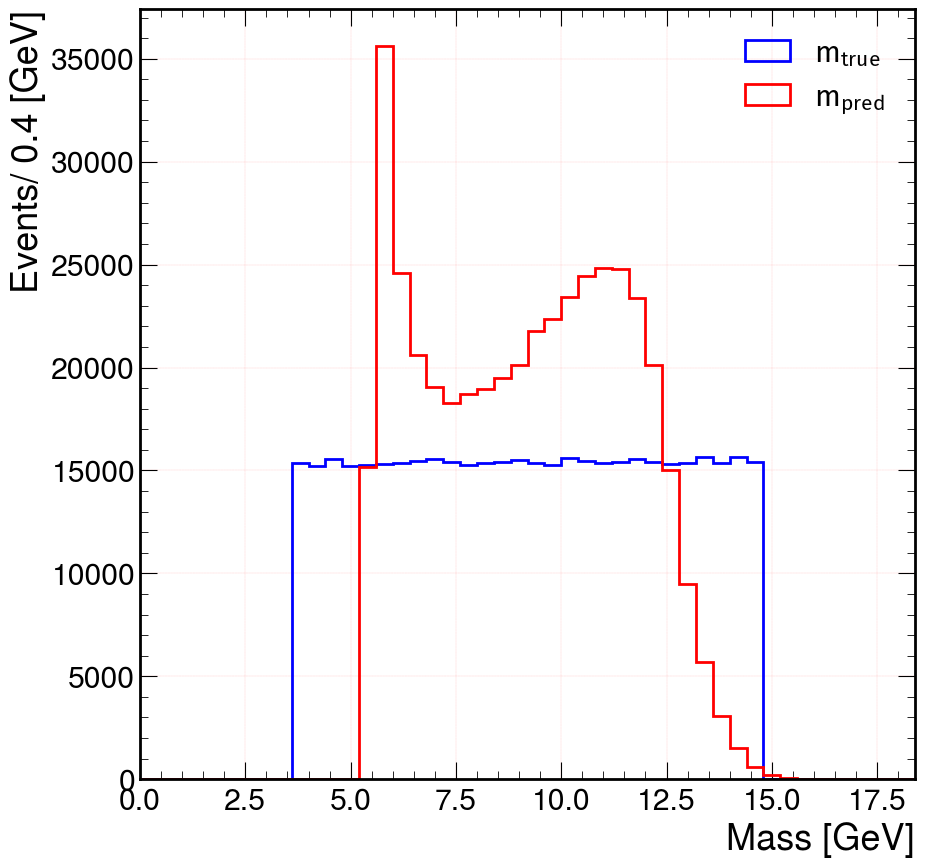

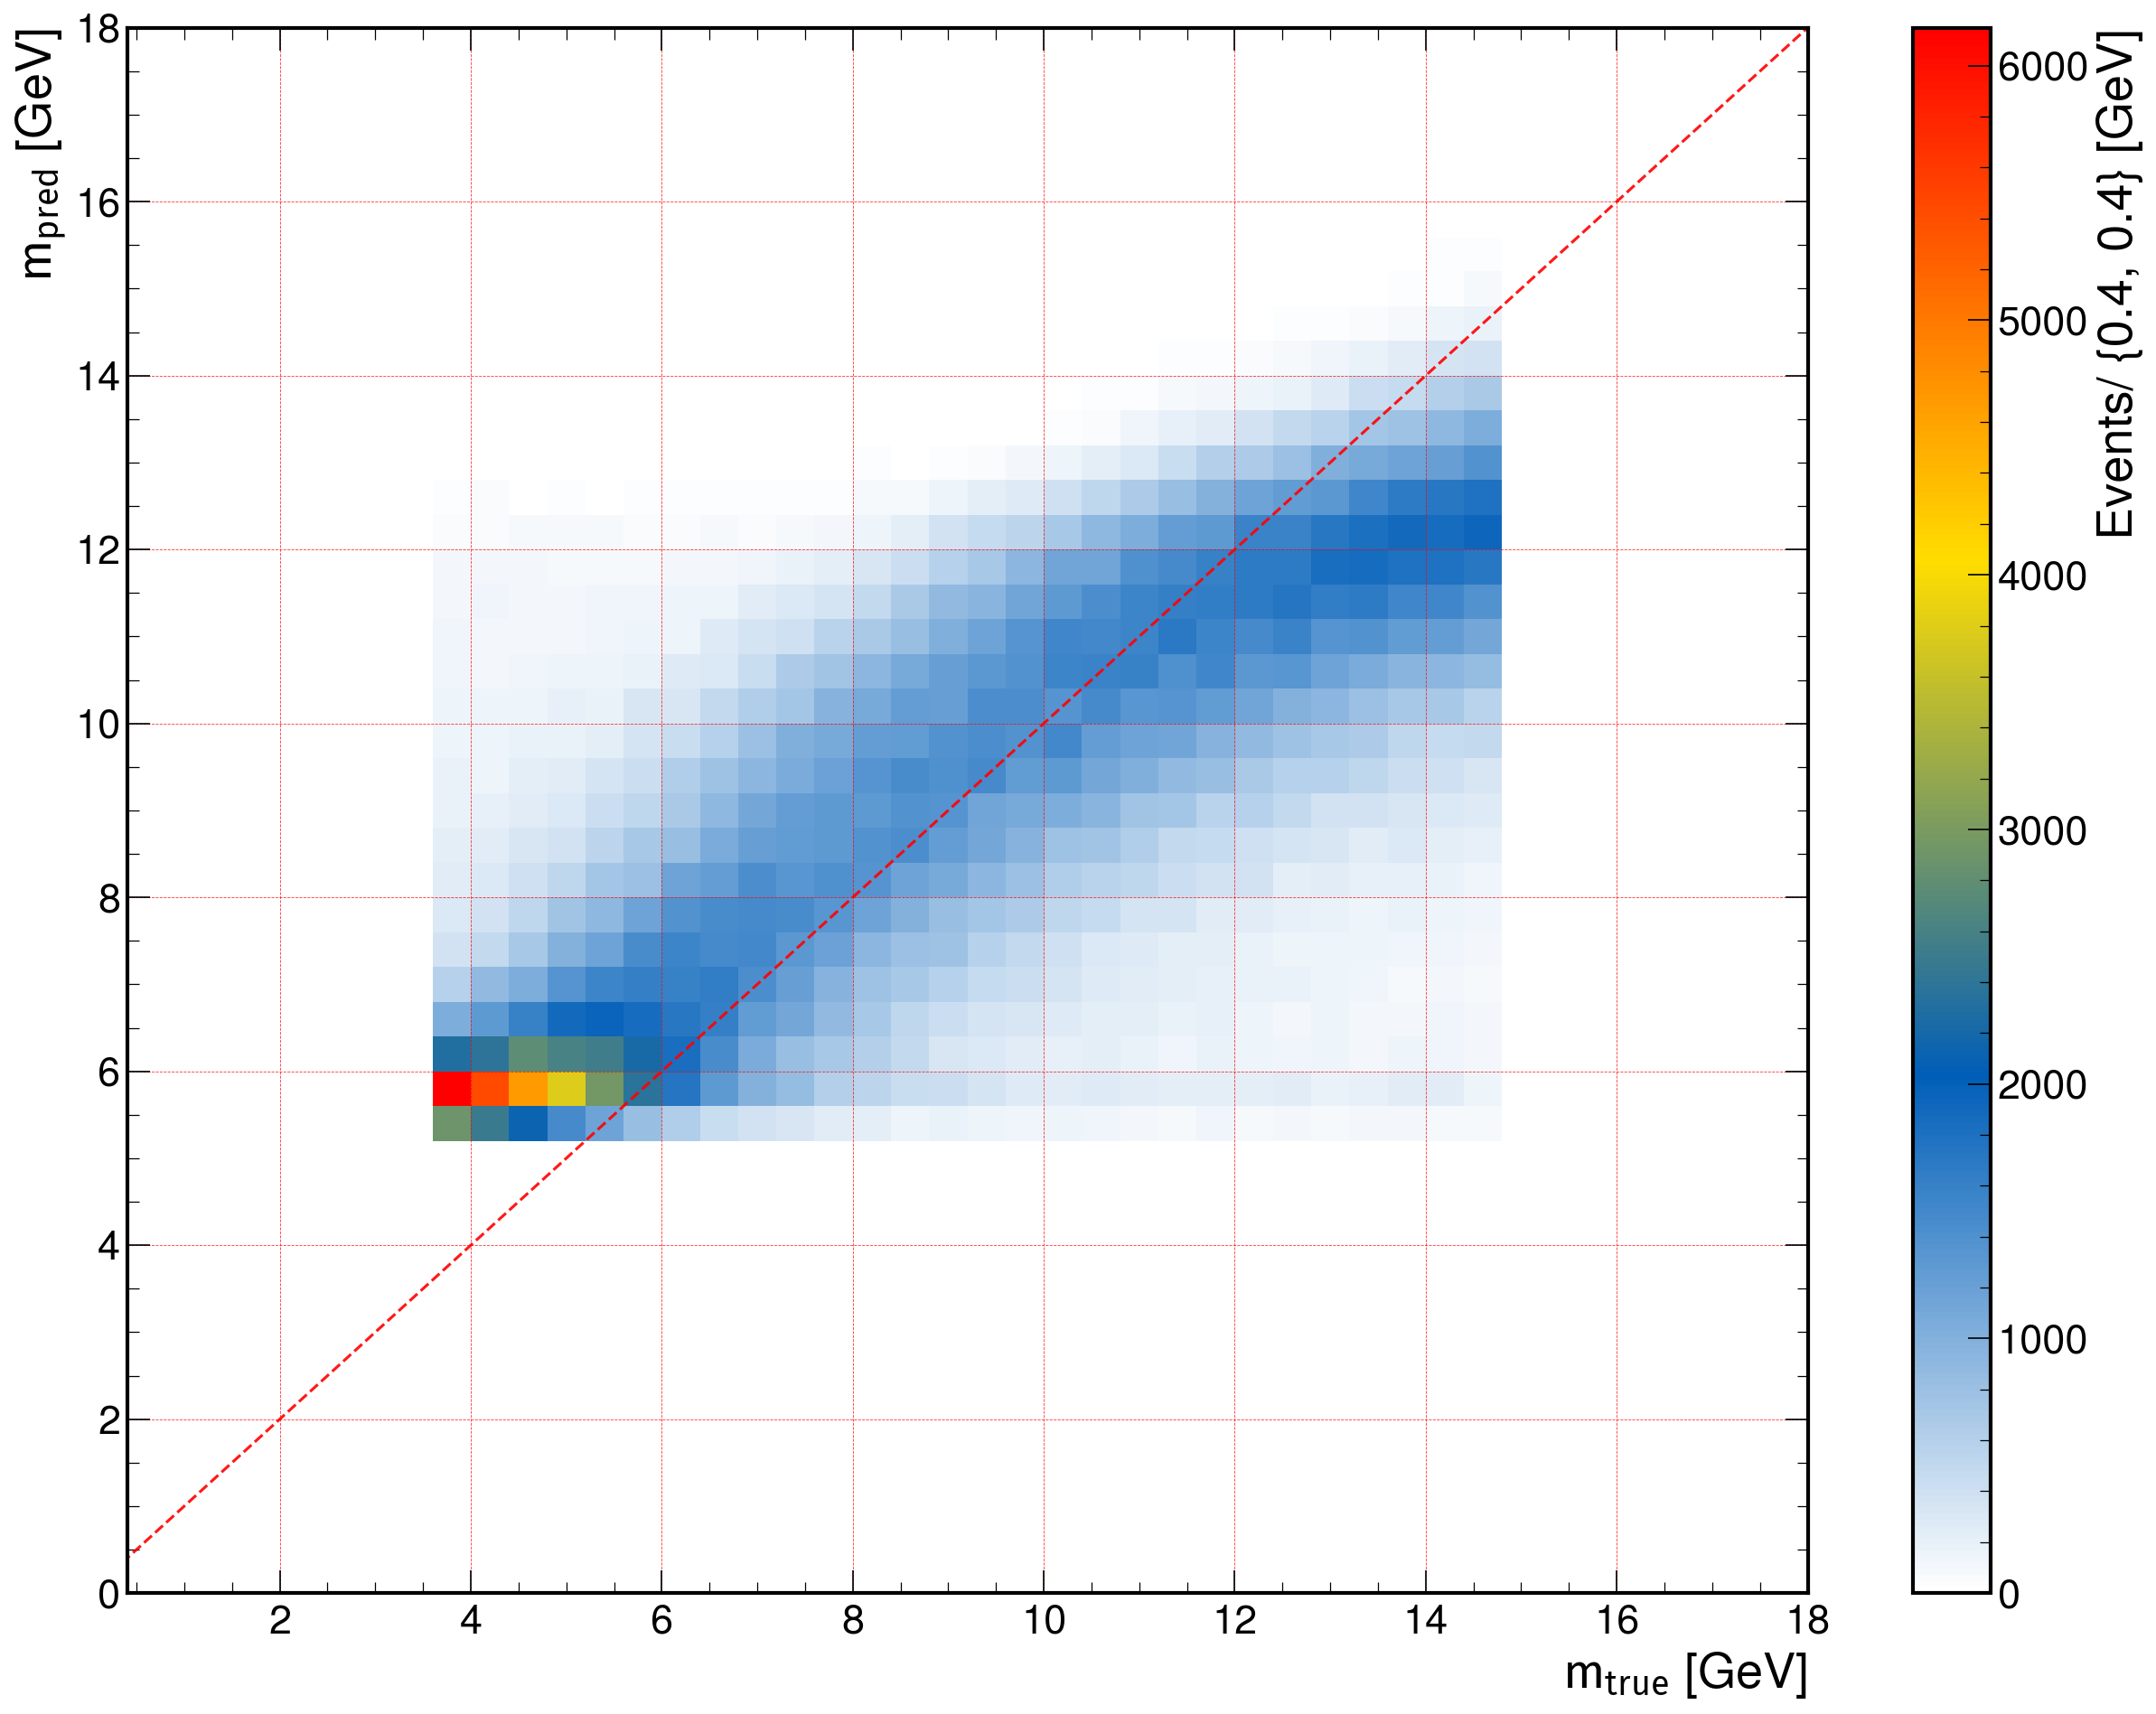

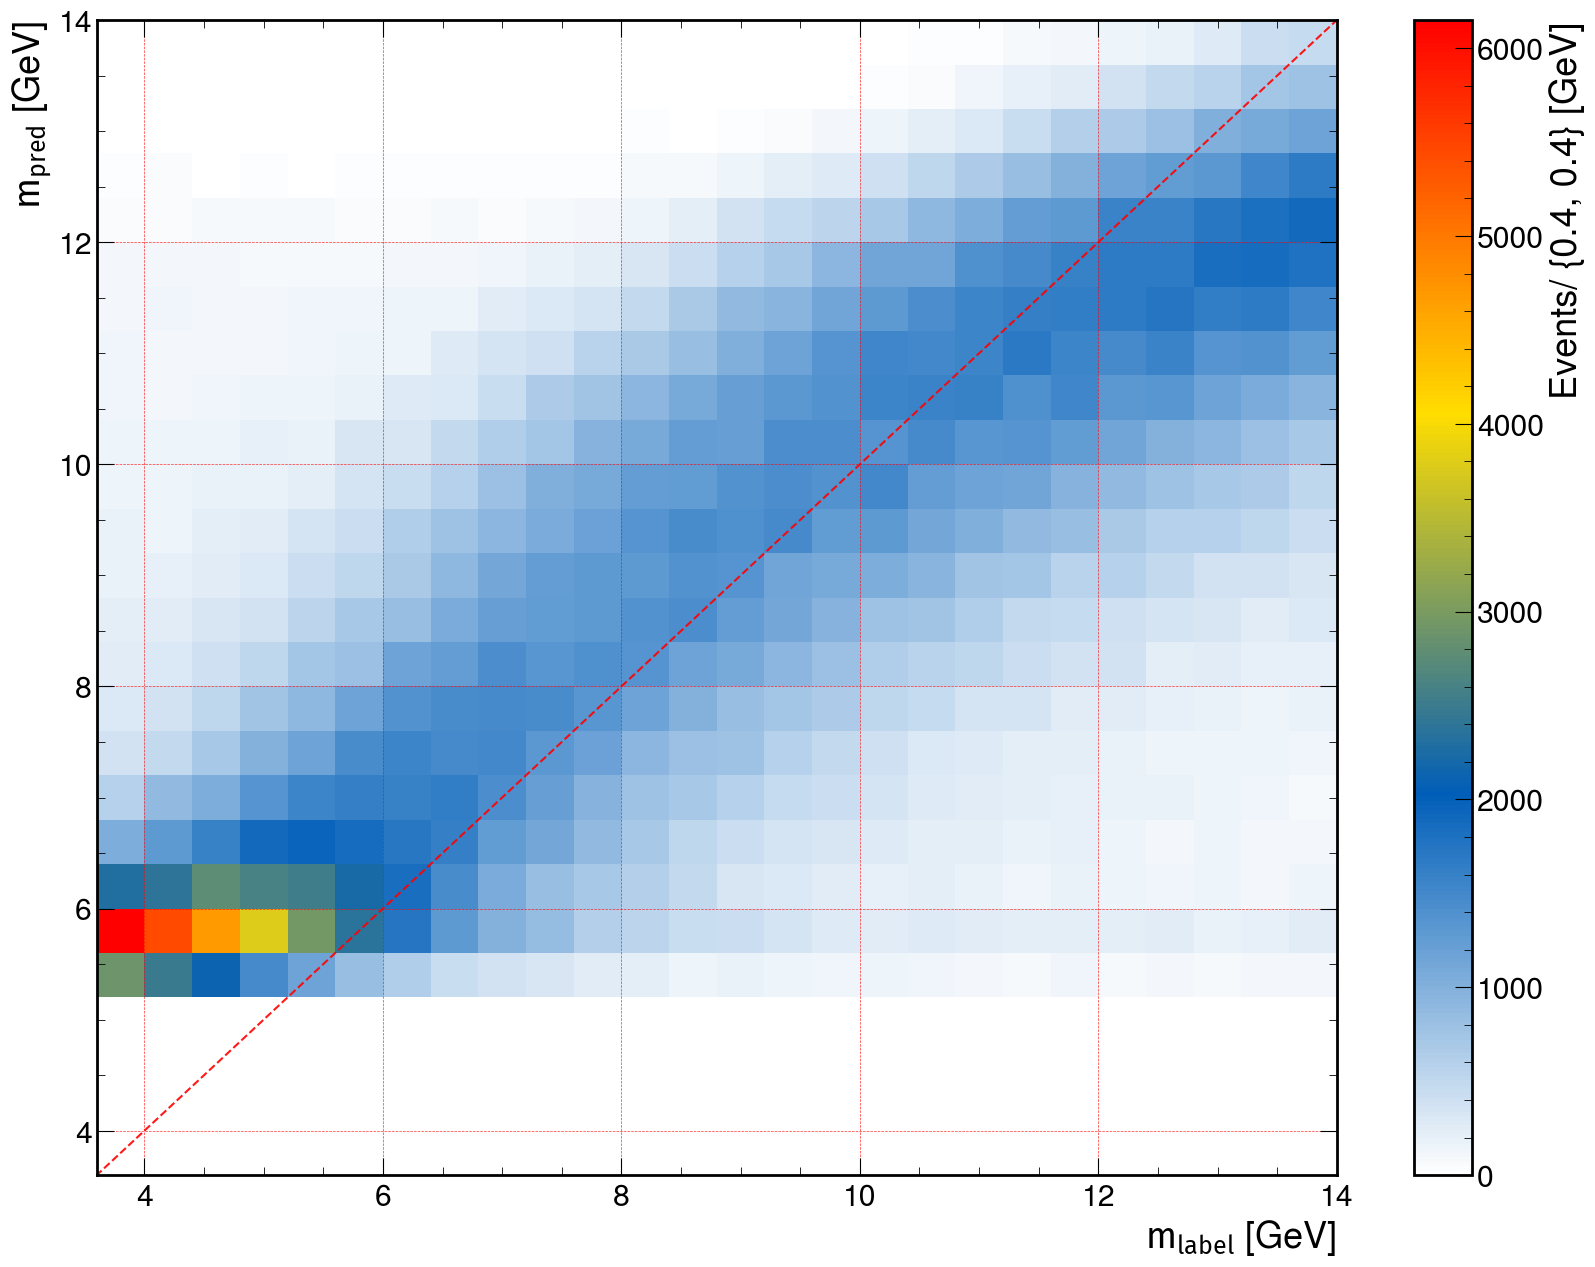

In [58]:
plot_1d(corrected=True)

1.8192008510575095
1.660731836424916
1.4530731427869163
1.2483532956717214
1.1854278581715365
1.0528423531755307
0.9365270616578624
0.7969039816248459
0.6877978190047354
0.6289705371552848
0.49723457869972715
0.46748914679516634
0.40017450448274855
0.19678050159477076
0.0885866015870001
-0.058418398360804834
-0.20927595648813566
-0.40033773256285937
-0.5057603924242541
-0.6906751510894008
-0.8929218571043518
-1.0668026962514097
-1.2943919314687284
-1.5531177450348415
-1.7303031119650716
-1.9319859333751679
-2.1210618806816384
-2.299950483272036


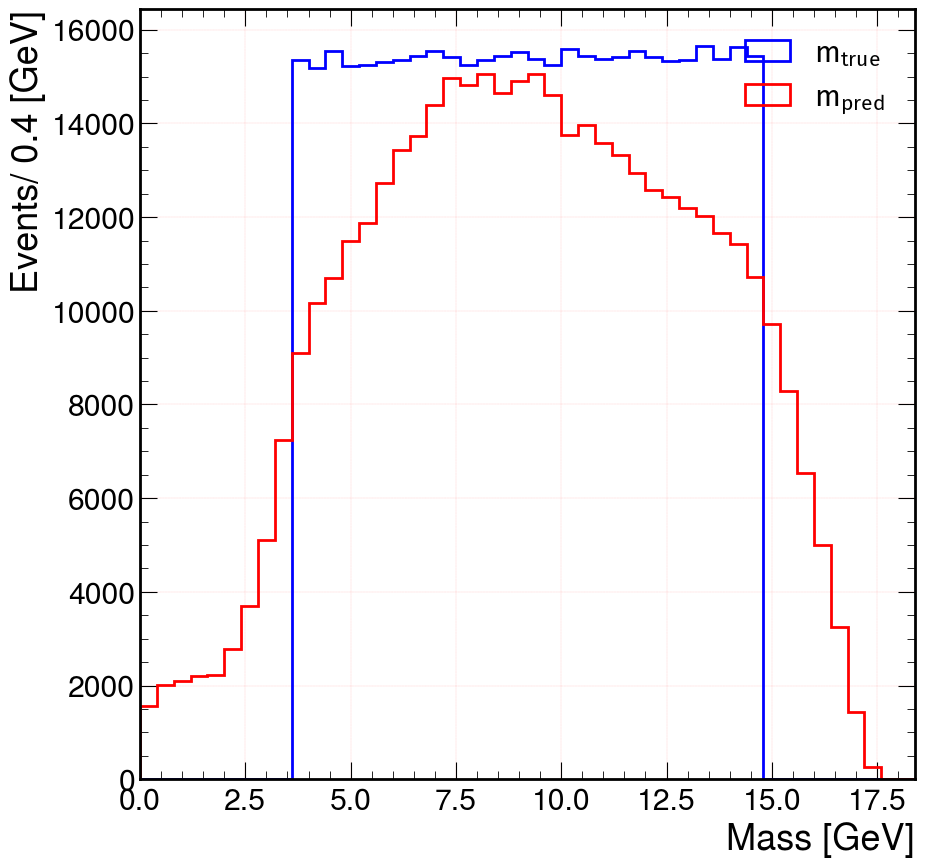

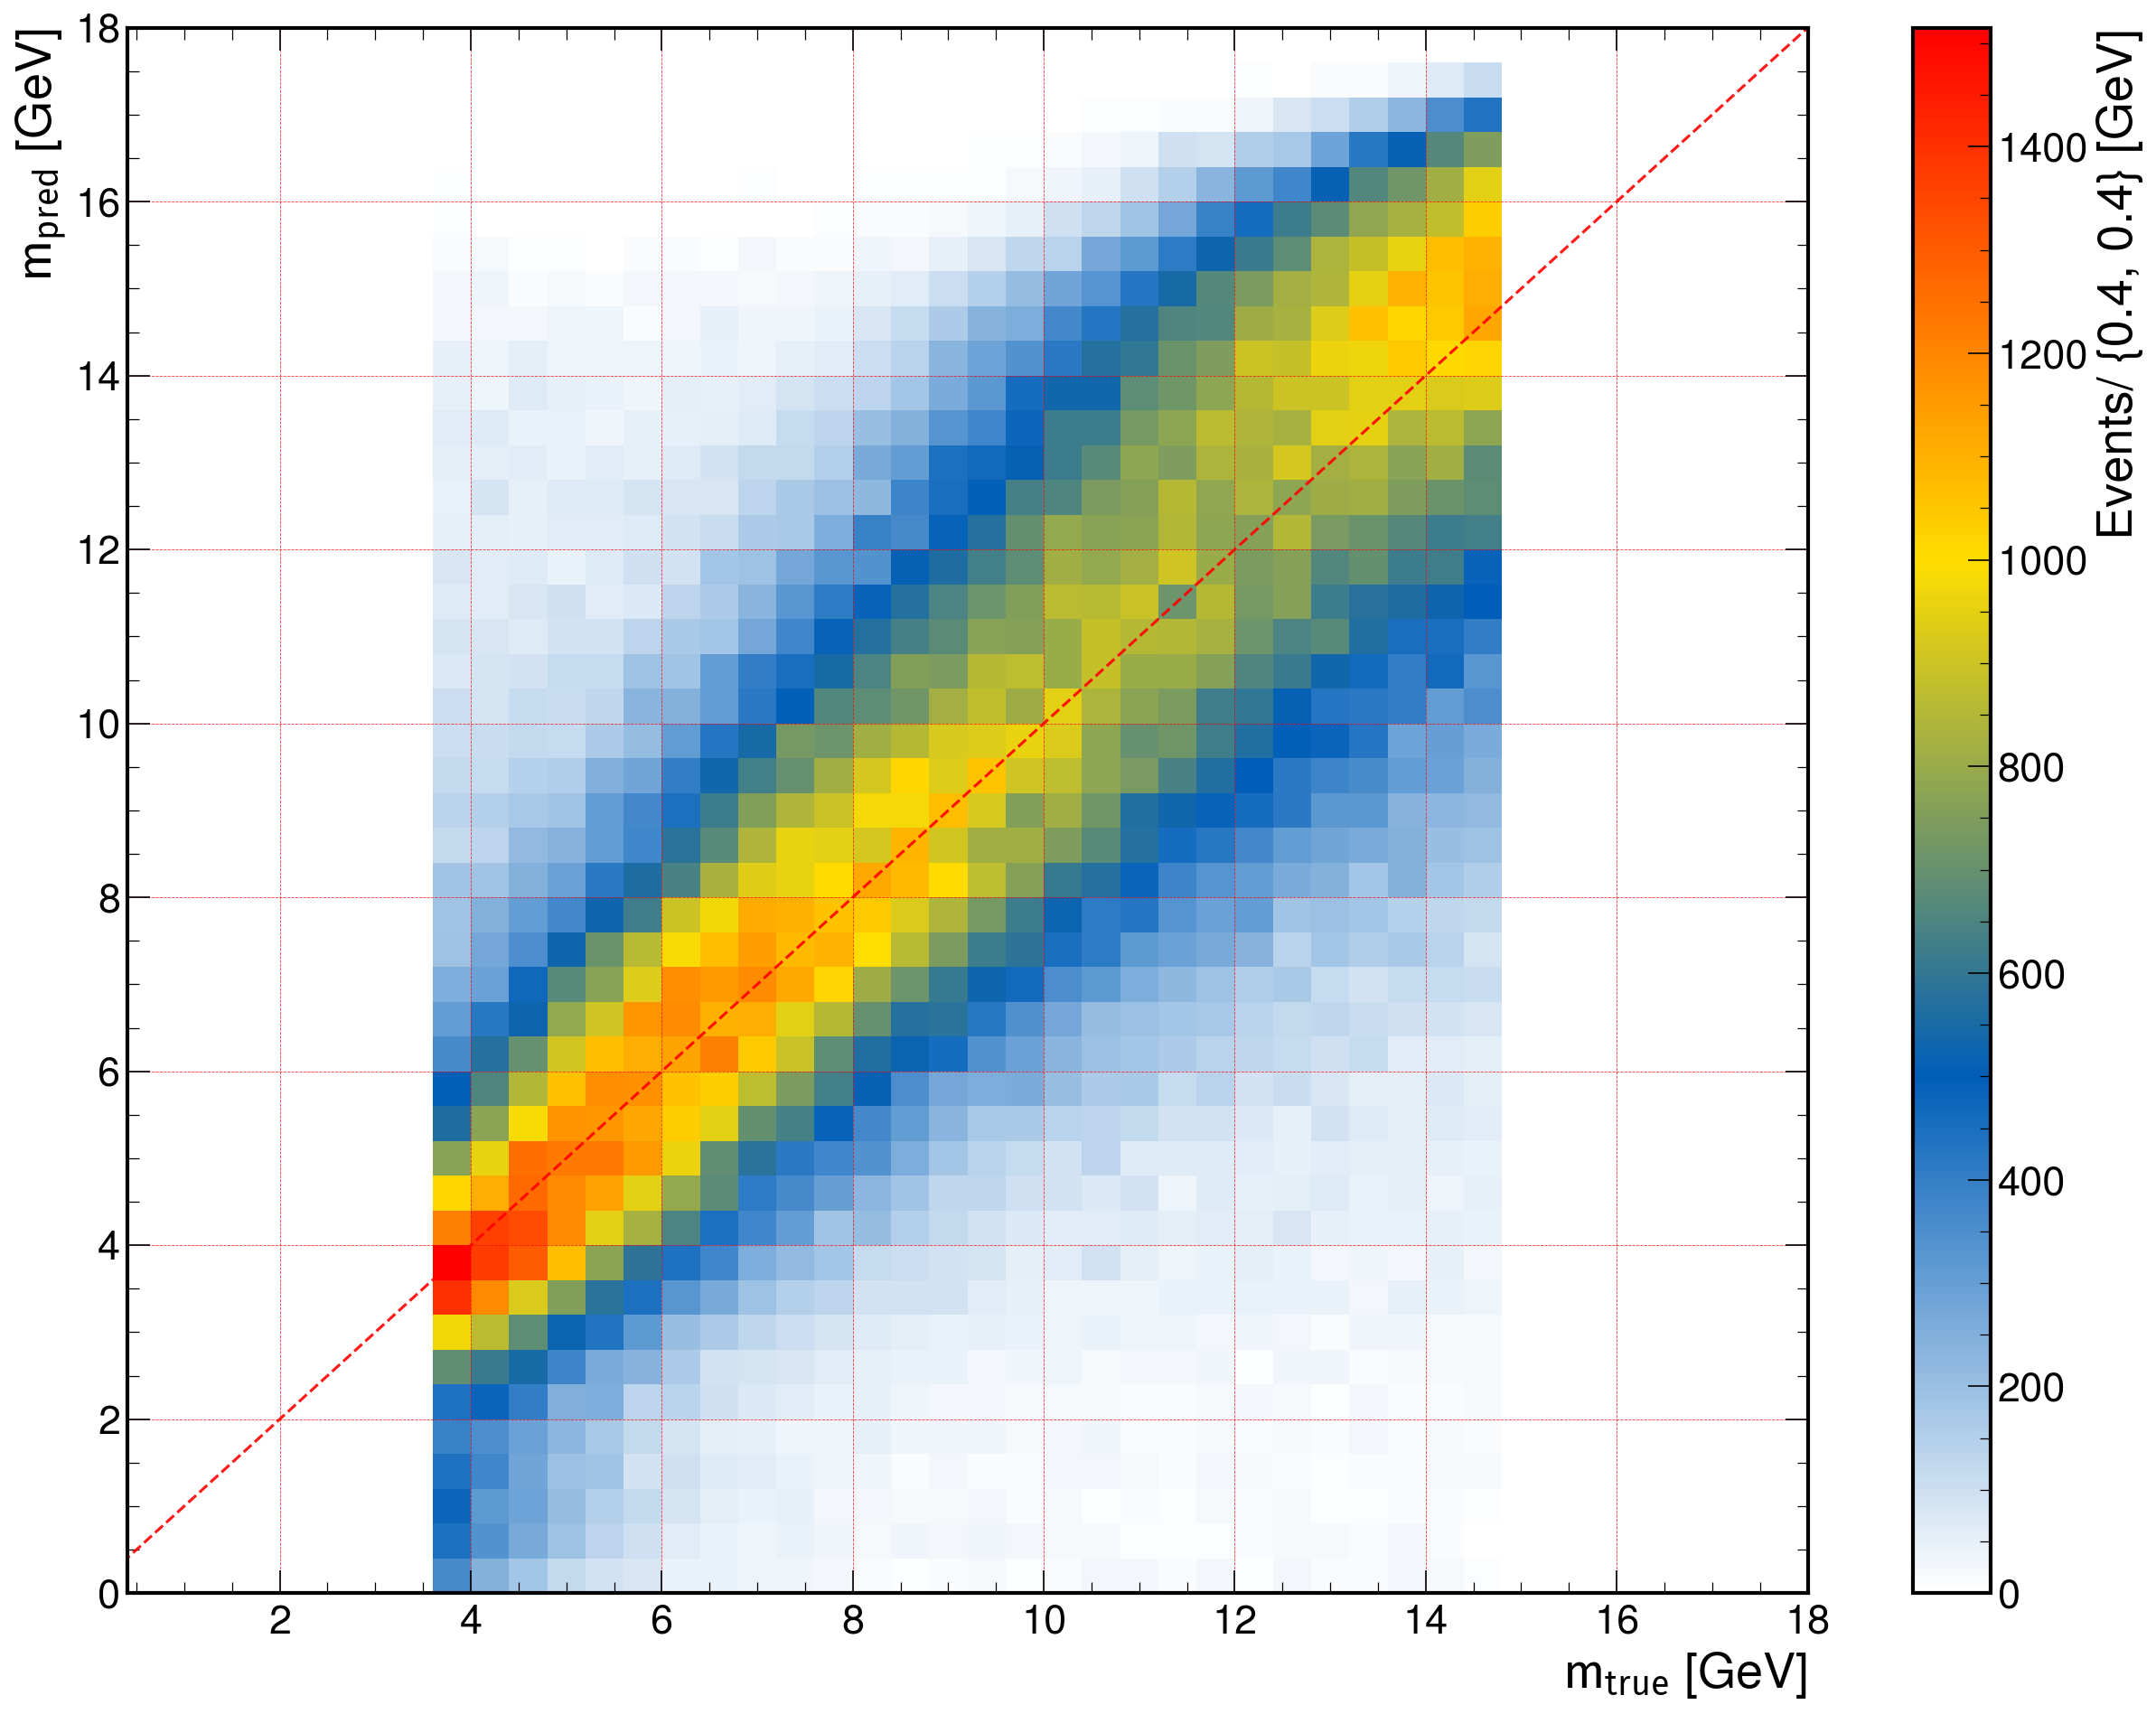

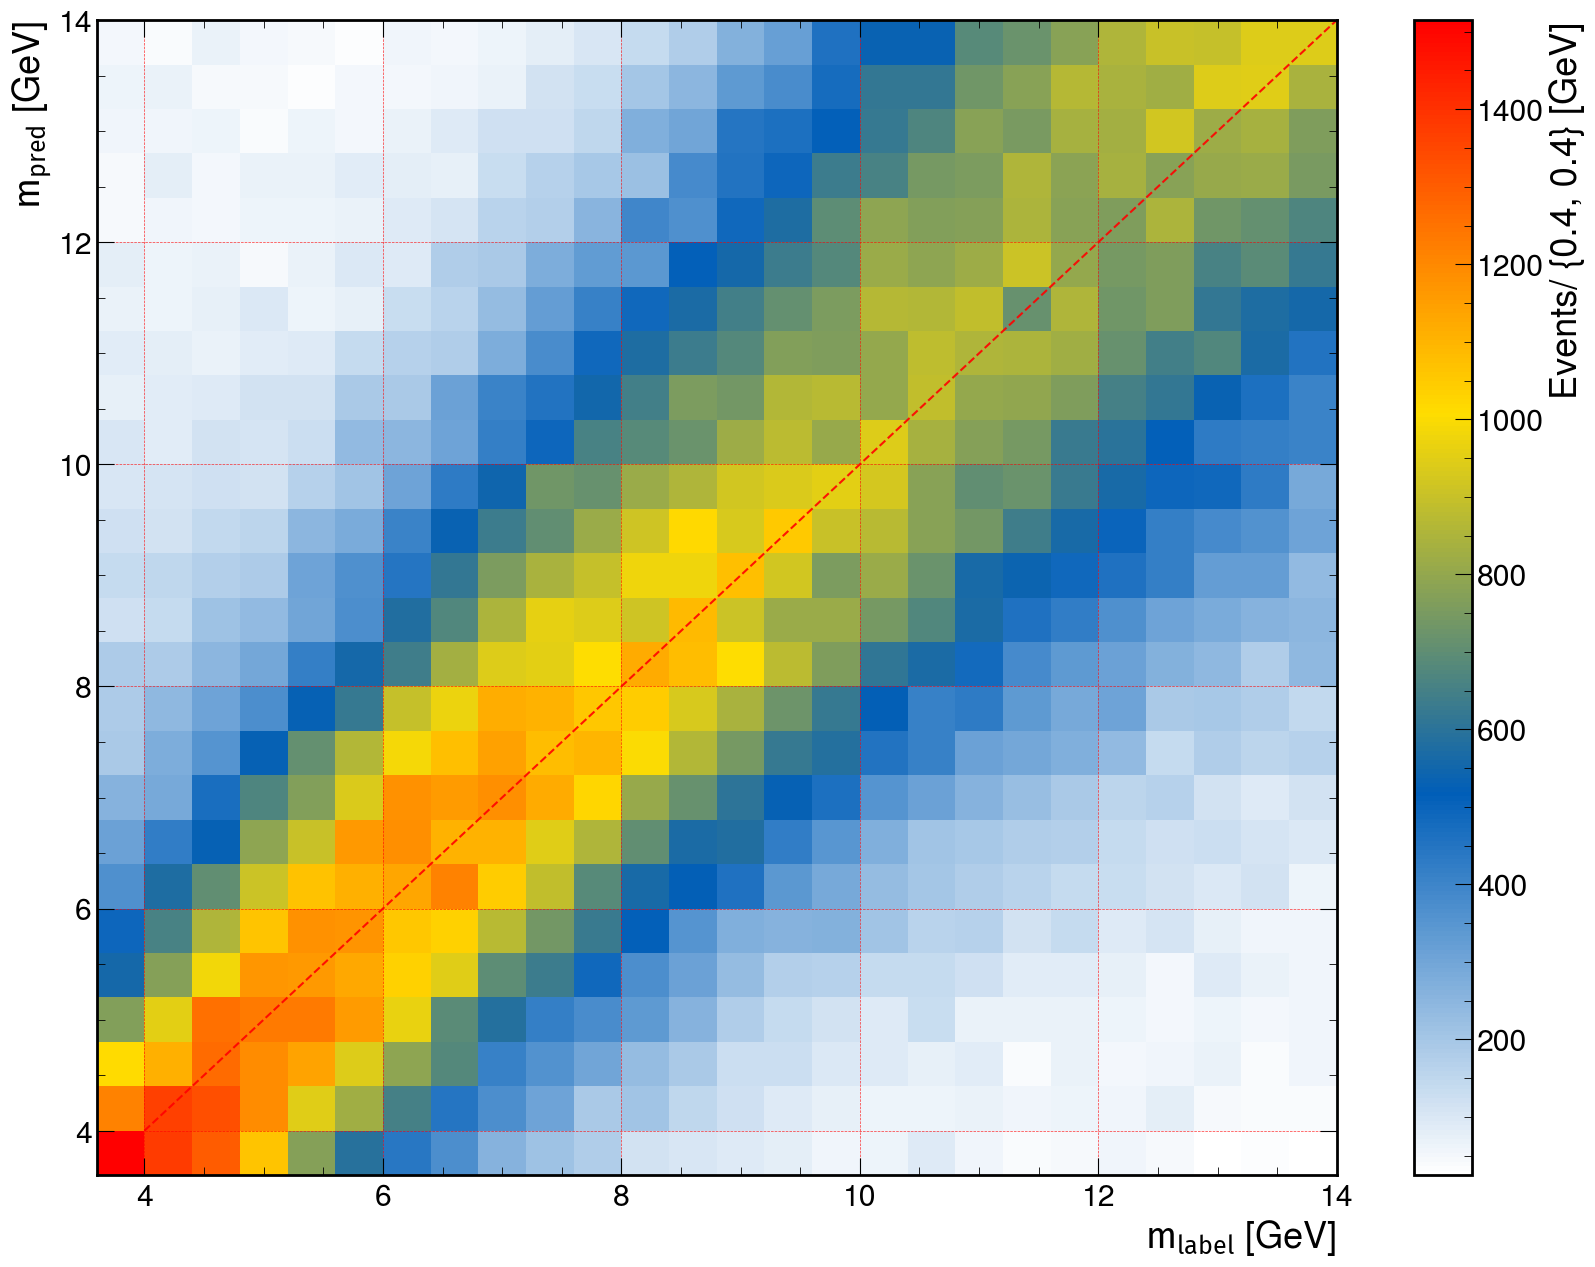

In [19]:
plot_1d(corrected=True)

In [59]:
def plot_signal(Mass = '5', corrected=False):
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    print("Signal Mass : ", mass)
    paths=np.sort(glob.glob(f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
    assert len(paths) > 0
    # print(f"{len(paths)} files found")

    m0_min = 0.8
    m0_max = 17.2
    bin_size = 0.4




    infile = open(f"{paths[0]}", "rb")
    data = pickle.load(infile)
    # print("keys-----", data.keys())
    infile.close()
    m_true_ = data["m_true"]
    m_pred_ = data["m_pred"]
    m0_ = data["m0"]
    mask = (m_true_ > 3.6) & (m_true_ < 14.8)
    m_pred_ = m_pred_[mask]
    m_true_ = m_true_[mask]
    if corrected: m_pred_ = corrected_pred(m_pred_)

    m0 = 1.2
    m0_max = 20
    bin_size=0.4
    mu, std = norm.fit(m_pred_)
    x = np.linspace(0,m0_max+1.2, num=1000)
    y = norm.pdf(x, mu, std)

    fig, ax = plt.subplots()
    plt.hist(np.array(m_pred_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='-', color='b', linewidth=2, label='E2E')
    plt.hist(np.array(m0_).flatten(), range=(0,m0_max+1.2), bins=len(np.arange(0,m0_max+1.2,bin_size)), histtype='step',  linestyle='--', color='black', linewidth=2, label='PF')
    # plt.plot(x, y,linestyle='--', color='red',label=f'E2E mu:{mu:.2f}  std:{std:.2f}')
    plt.axvline(x= mass,linestyle='--',label=f'True {Mass}')
    plt.xlabel('Mass [GeV]')
    plt.ylabel('Events density/ 0.4 [GeV]')
    plt.legend(loc='best')
    # hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
    plt.show() 

    m_pred_1 =[]
    m_pred_2 =[]
    residuals = []
    for i in range(len(m_pred_)): 
        try:
            if i%2: m_pred_1.append(m_pred_[i])
            else: m_pred_2.append(m_pred_[i])
        except:
            if i==0: continue
            if i%2: m_pred_1.append(m_pred_[i])
            else: m_pred_2.append(m_pred_[i])


    fig, ax = plt.subplots(figsize=(15,12), dpi=150)
    plt.hist2d(np.squeeze(m_pred_1), np.squeeze(m_pred_2), bins=[np.arange(m0_min-0.8, m0_max+1.2, .4), np.arange(m0_min-0.8, m0_max+1.2, .4)],cmap=cms_cmap)
    plt.xlabel(r'$\mathrm{A_{1}}$ [GeV]')
    plt.ylabel(r'$\mathrm{A_{2}}$ [GeV]')
    plt.plot((m0_min-1.2, m0_max+1.2), (m0_min-1.2, m0_max+1.2), color='r', linestyle='--', alpha=0.9)
    # plt.xticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
    # plt.yticks(np.arange(m0_min-0.8, m0_max+1.2, .8),size=12)
    plt.colorbar().set_label(label='Events/ {0.4, 0.4} [GeV]' )
    plt.grid(color='r', linestyle='--', linewidth=.4)
    # hep.cms.label(llabel=f"Simulation Preliminary A Mass {mass} GeV", rlabel="13 TeV", loc=0, ax=ax)
    plt.savefig(f'A_Mass_{mass} GeV.png', bbox_inches='tight',dpi=300, facecolor = "w")
    plt.show()  

In [60]:
Masses  = ['3p7', '4', '5', '6', '8', '10', '12', '14']

Signal Mass :  3.7


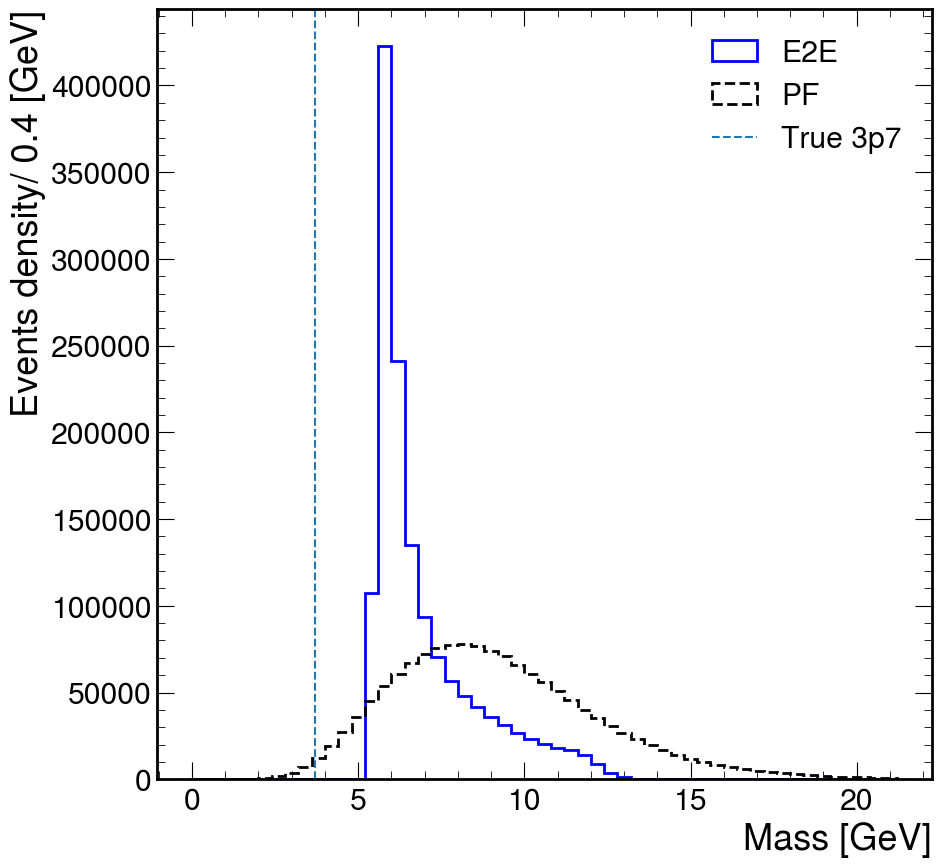

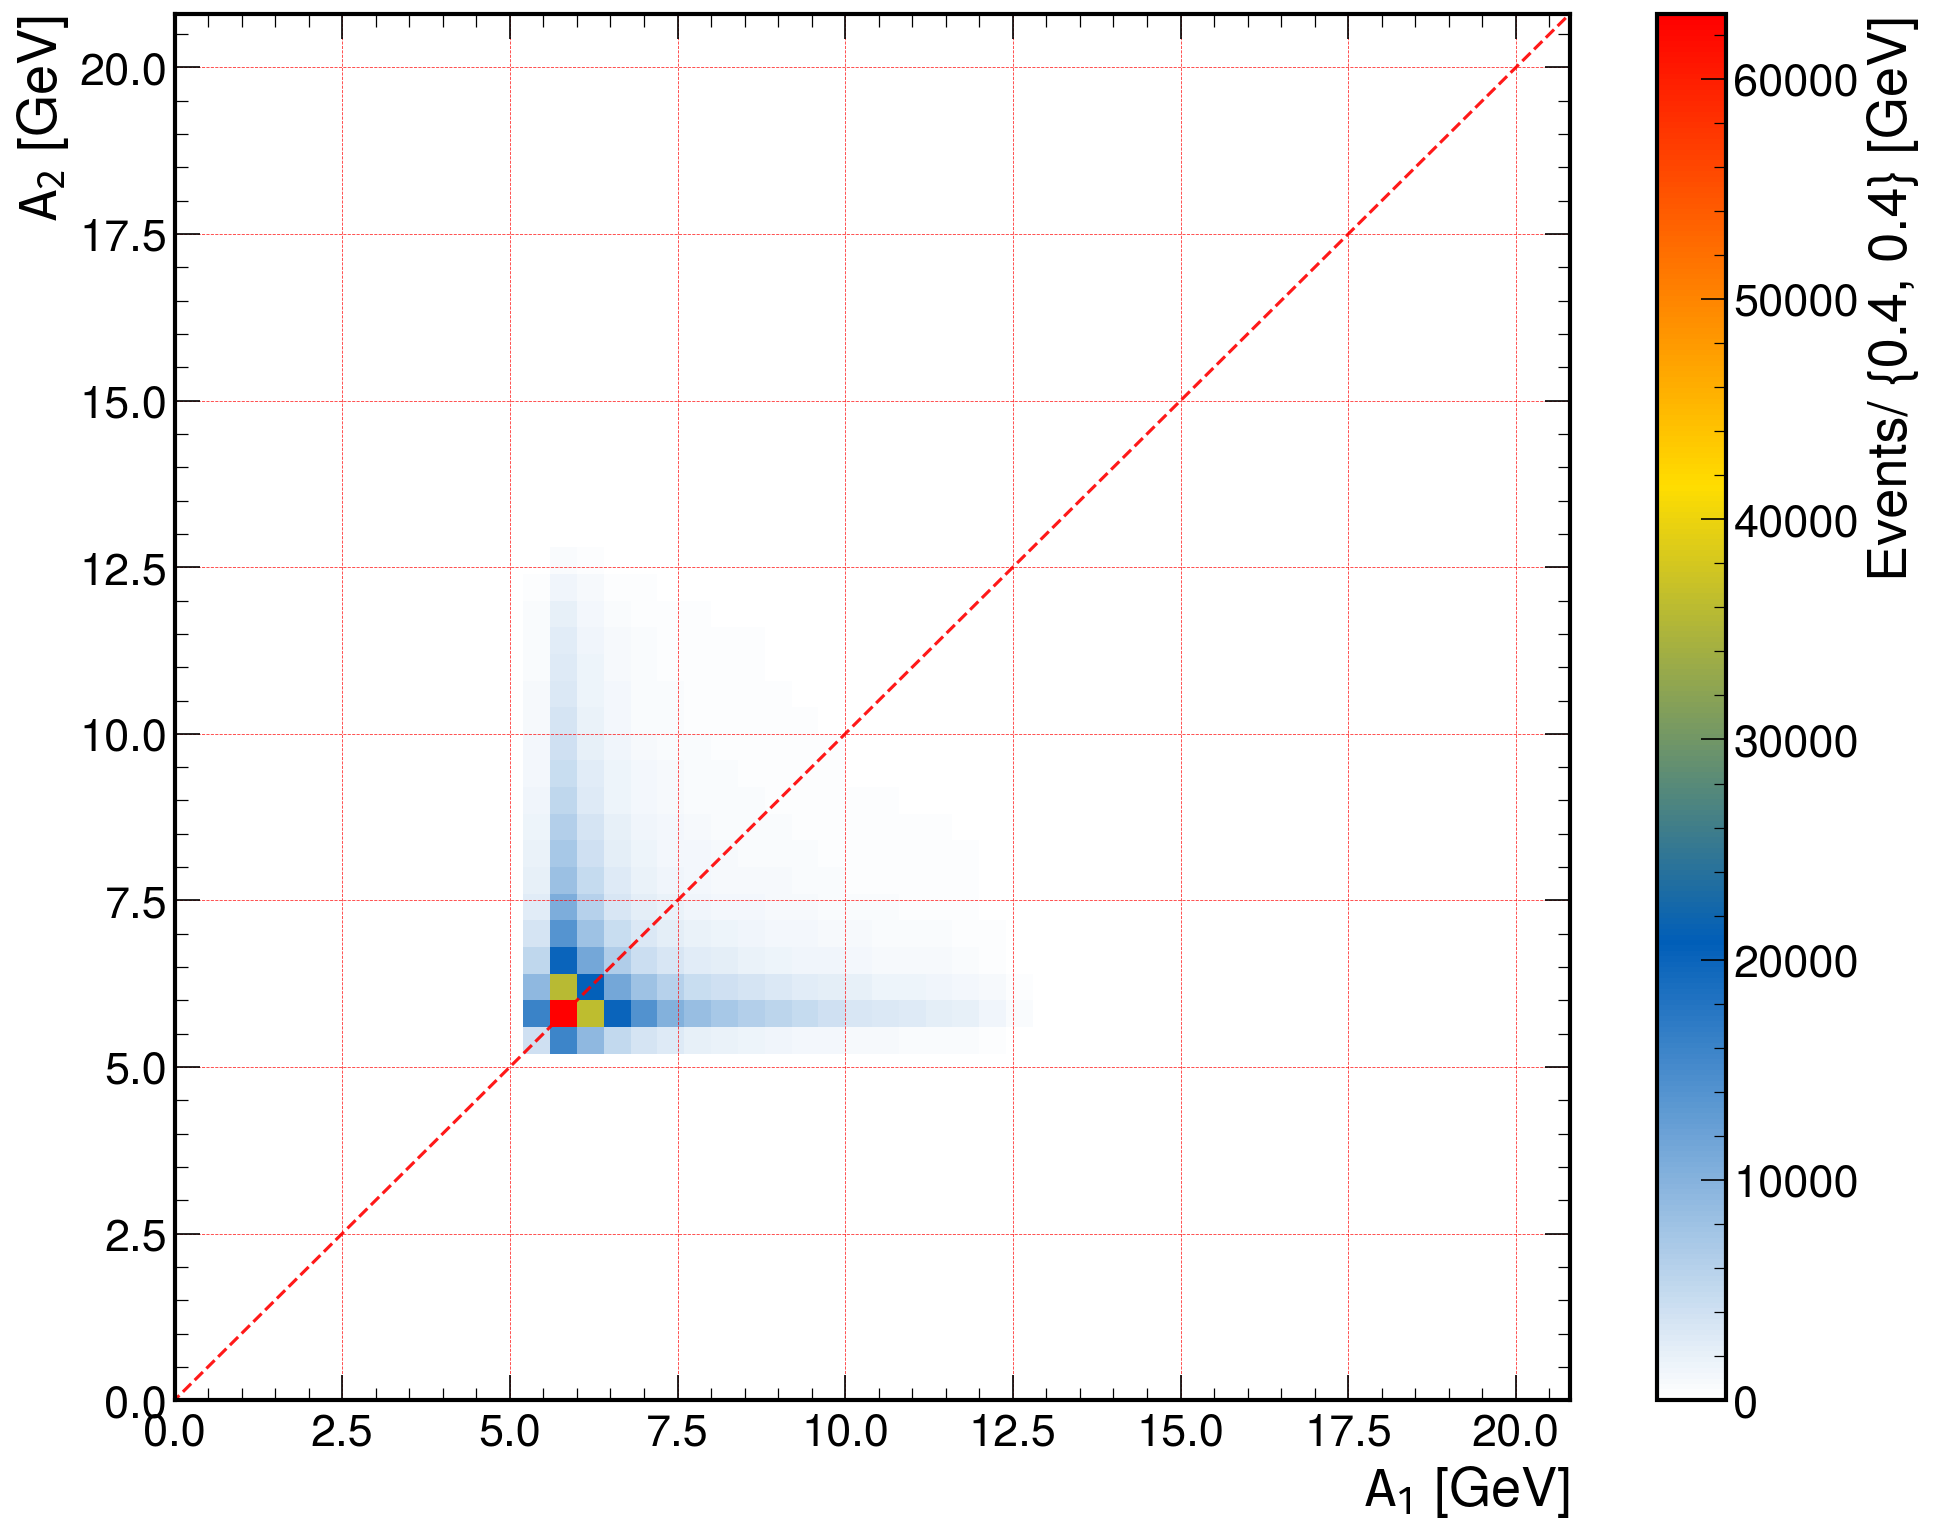

Signal Mass :  4


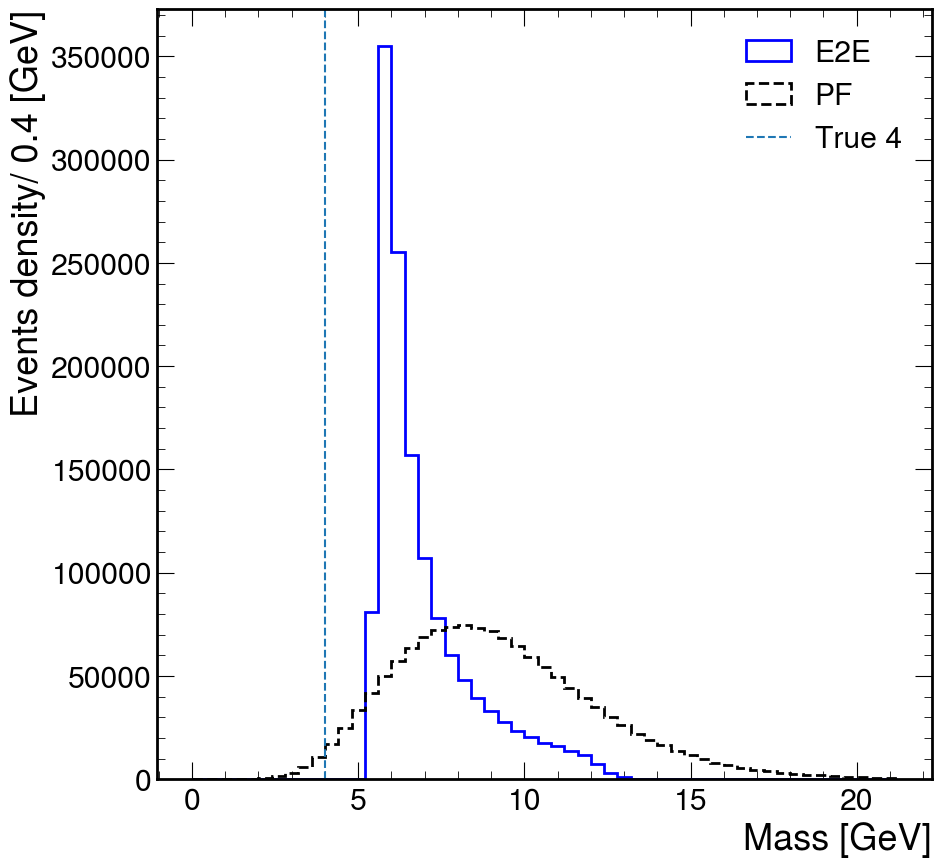

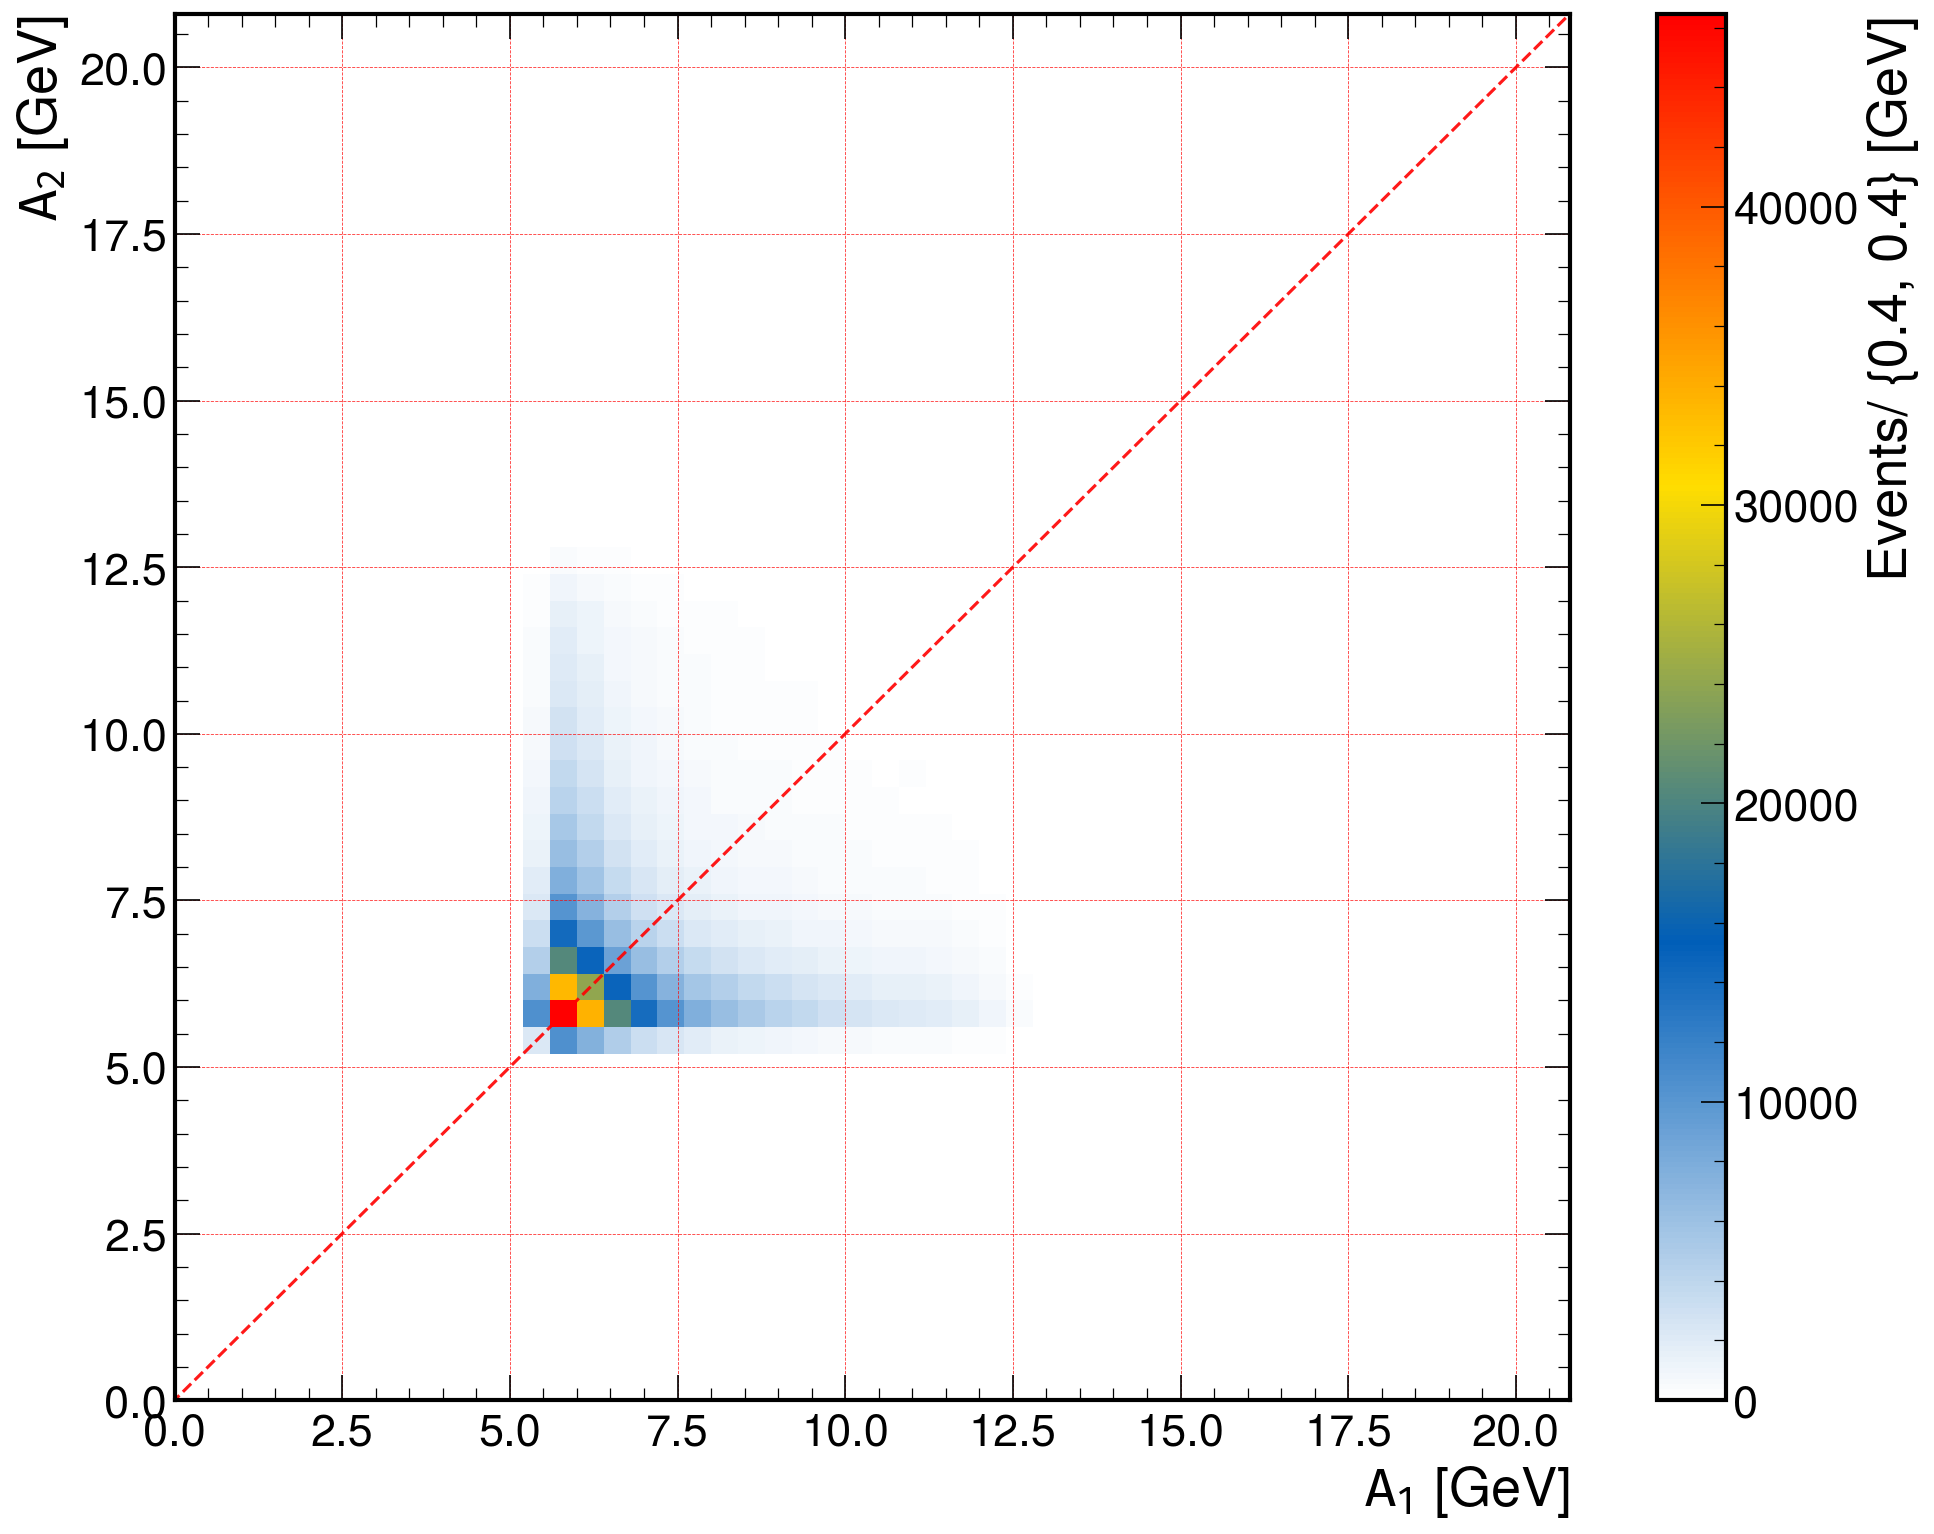

Signal Mass :  5


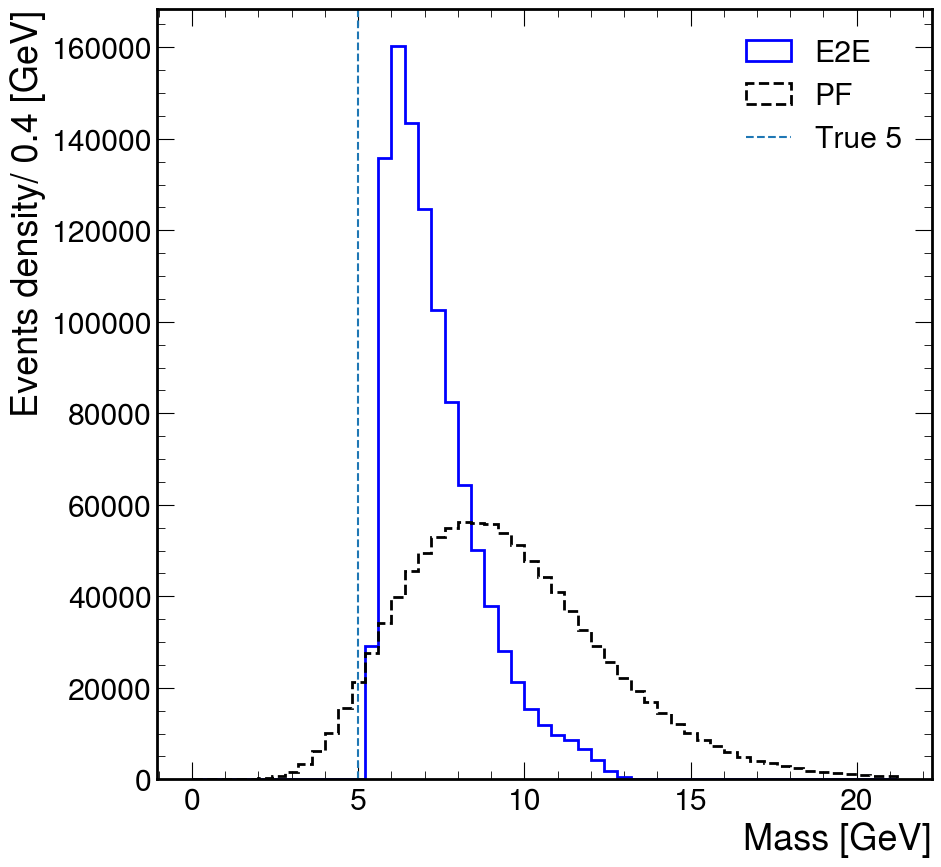

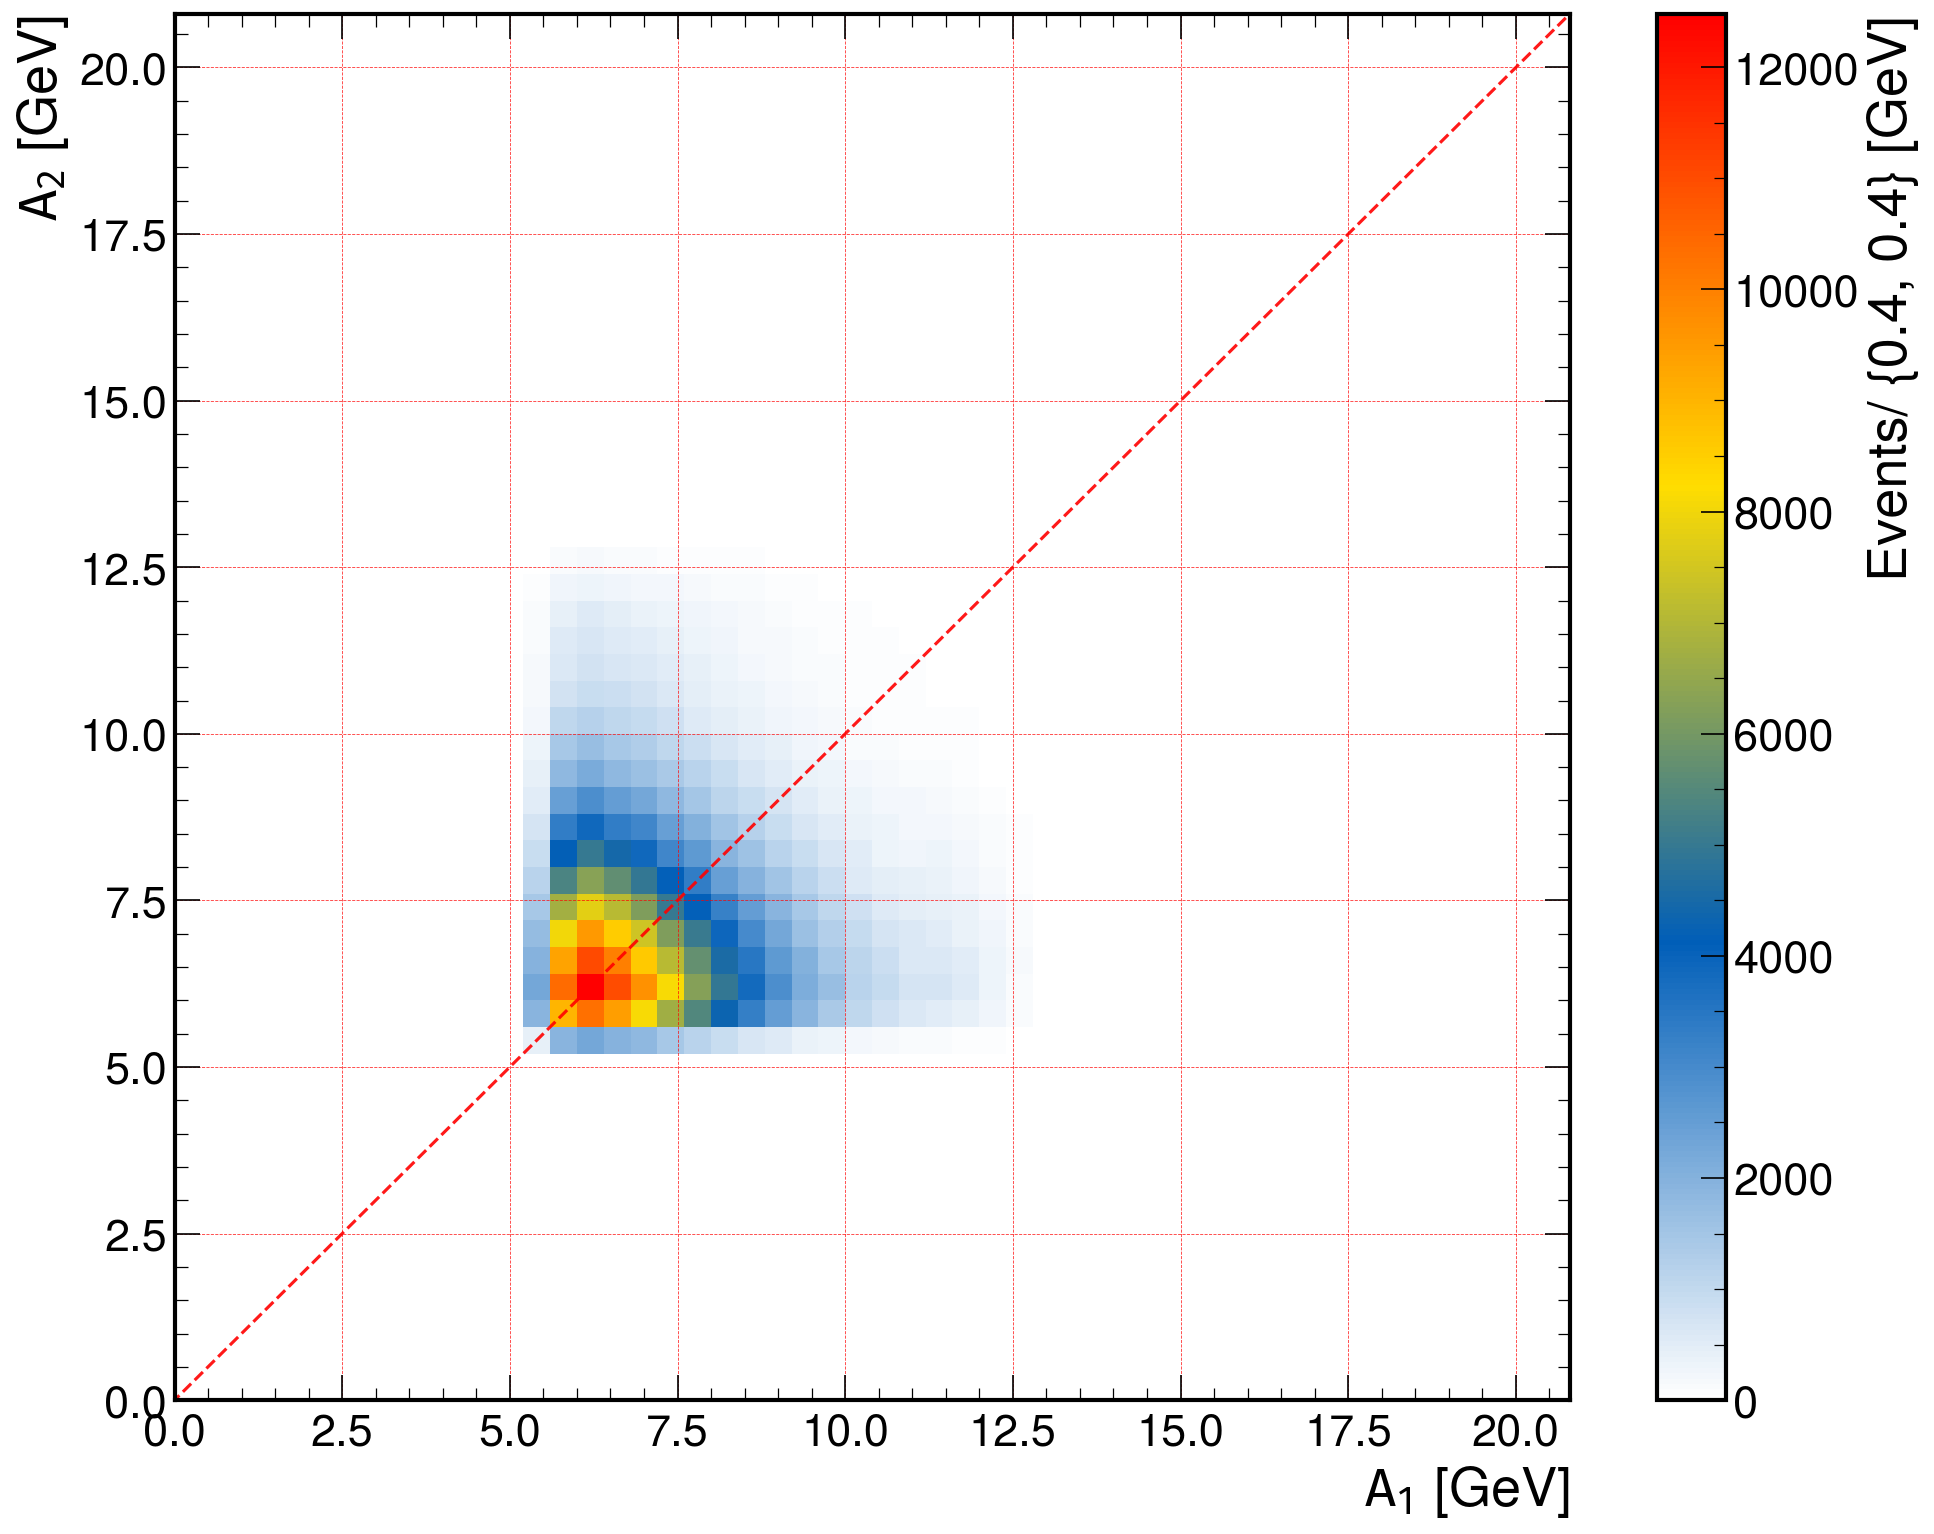

Signal Mass :  6


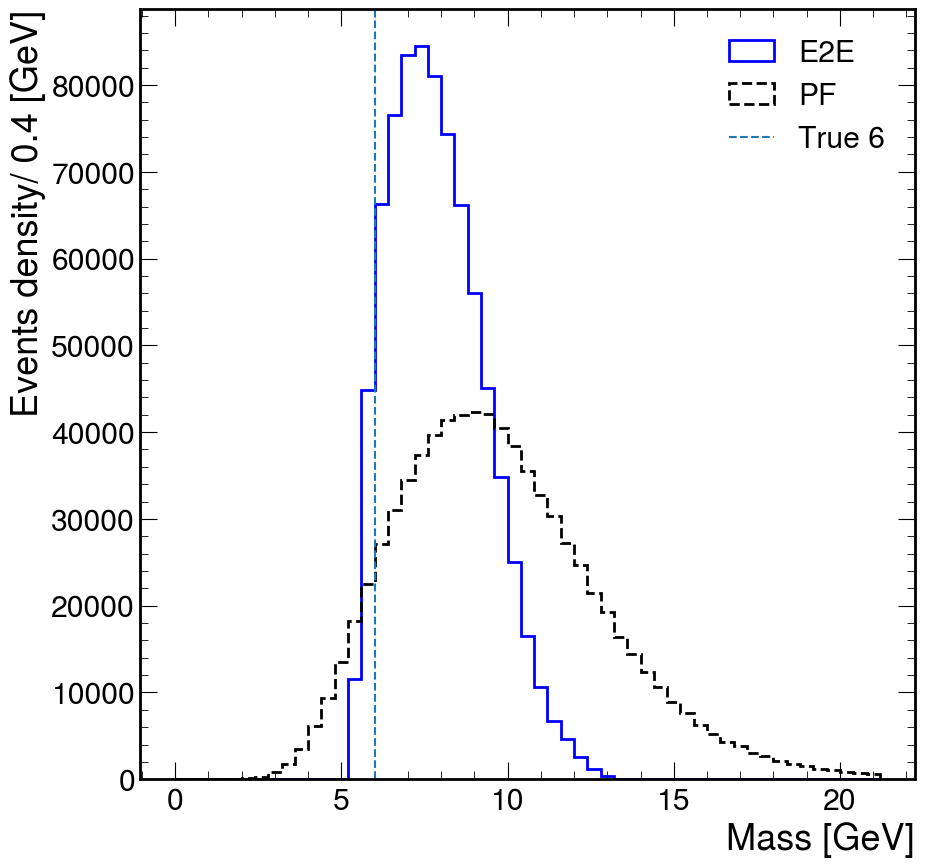

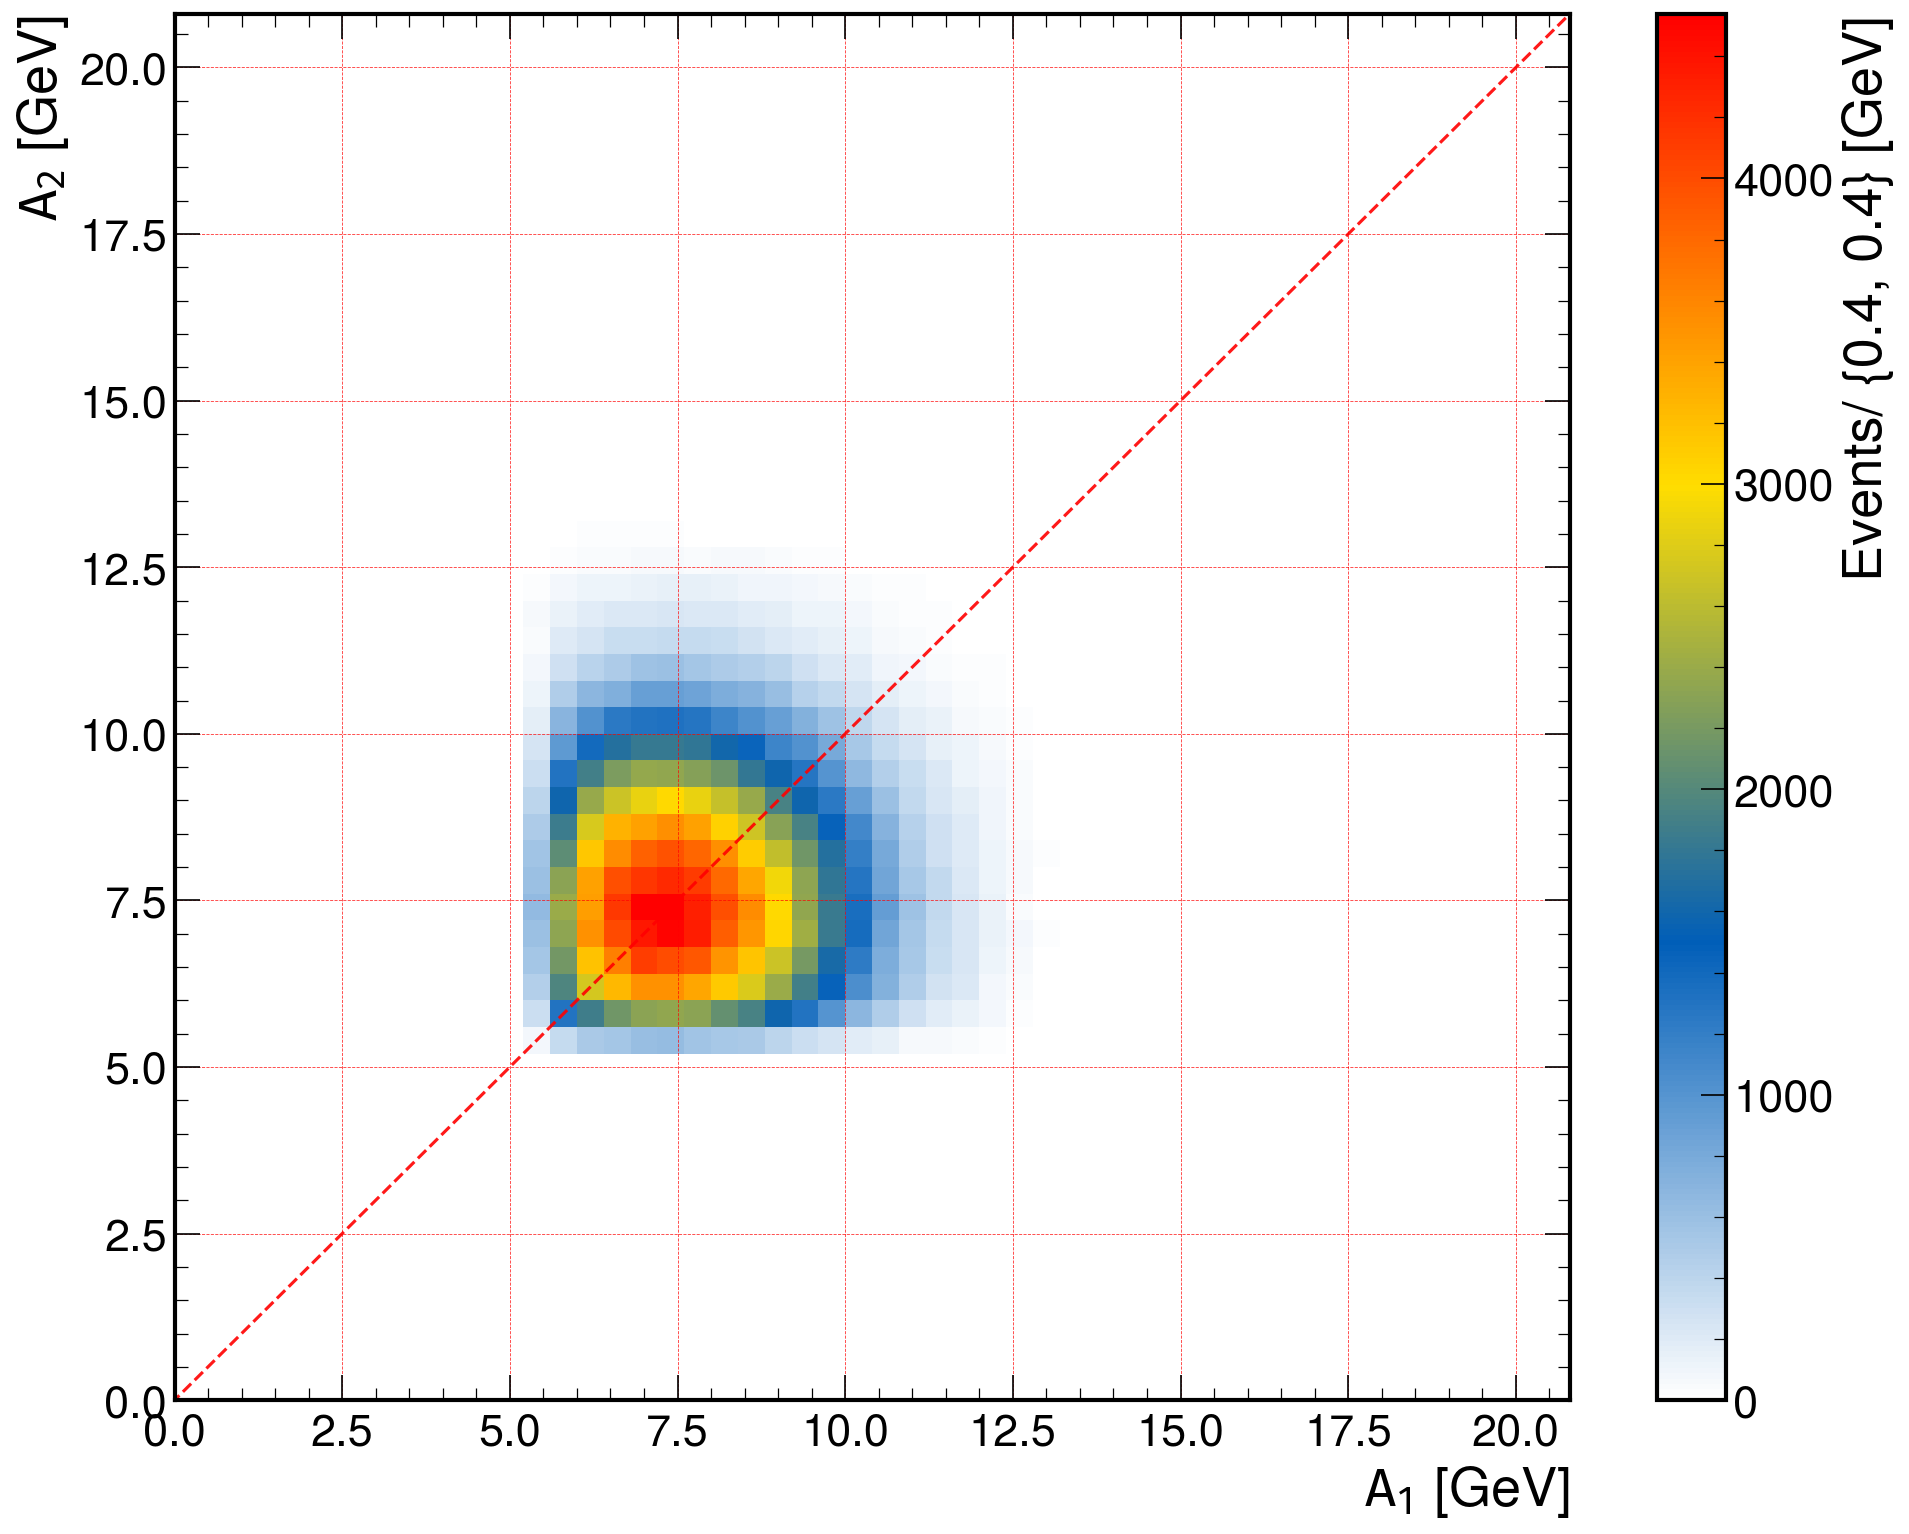

Signal Mass :  8


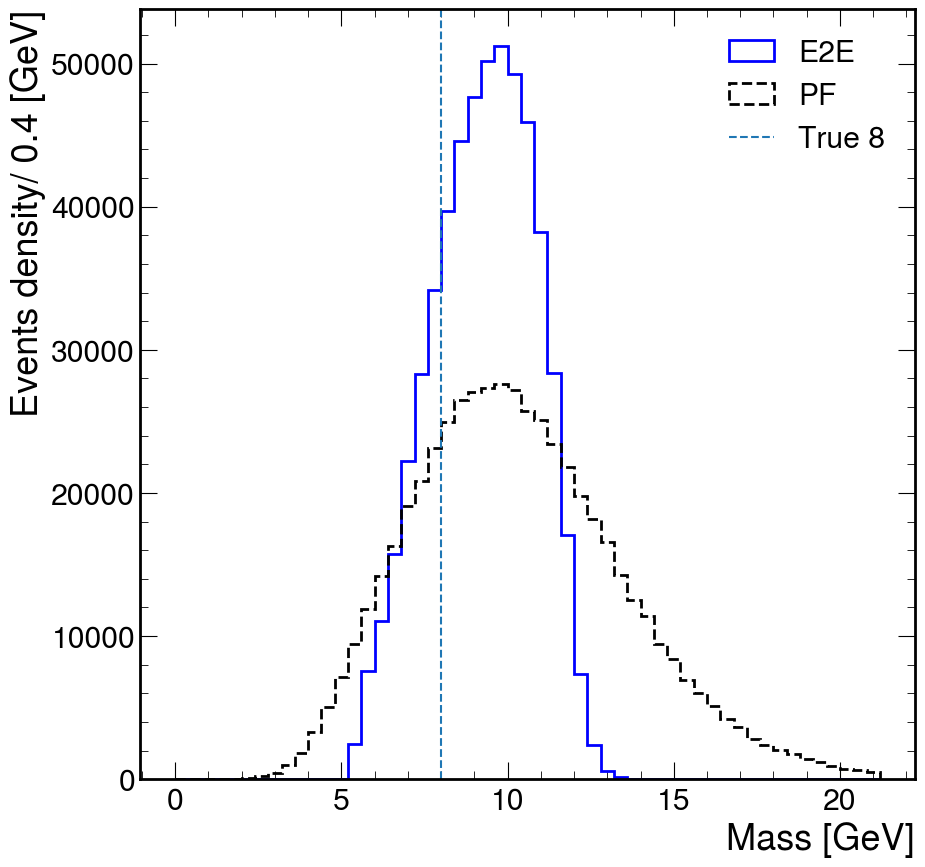

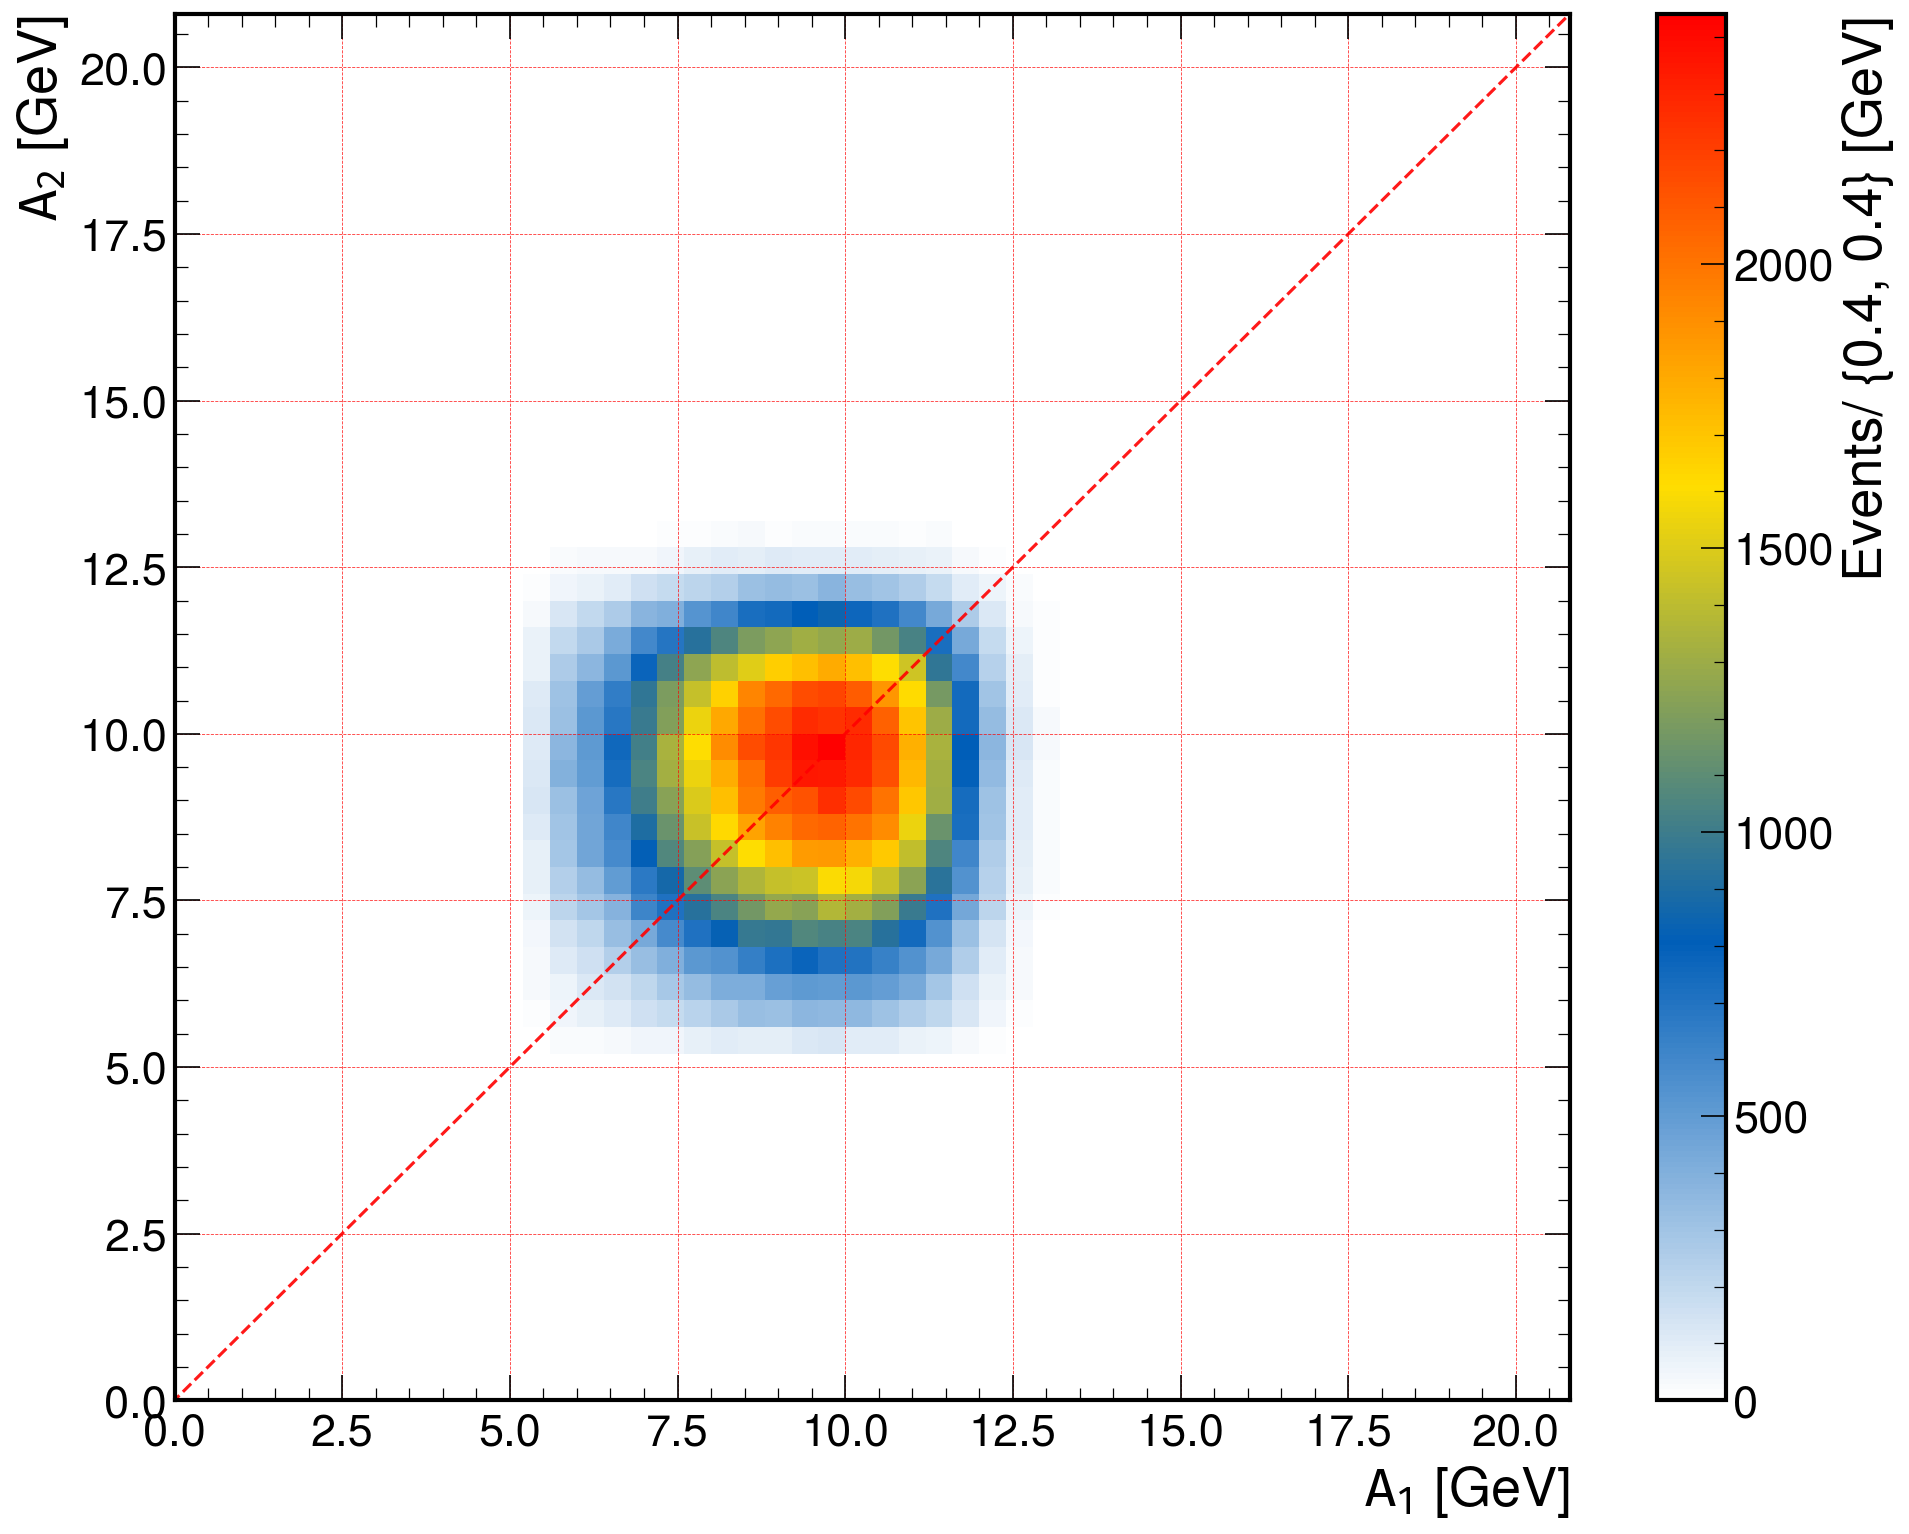

Signal Mass :  10


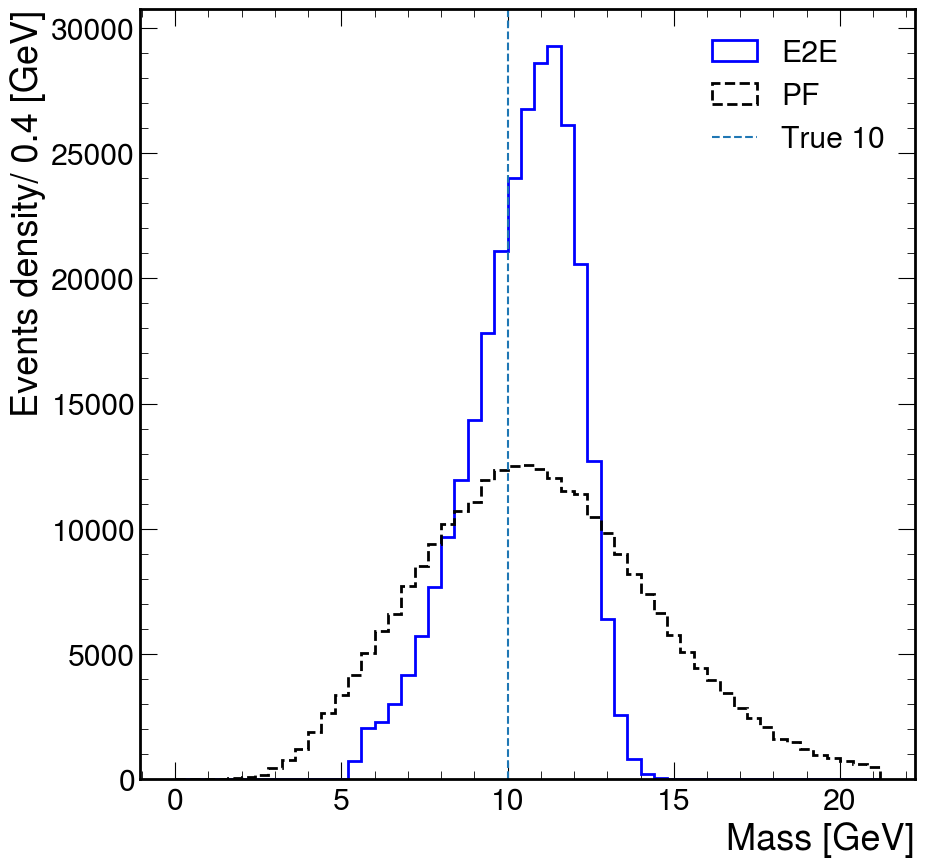

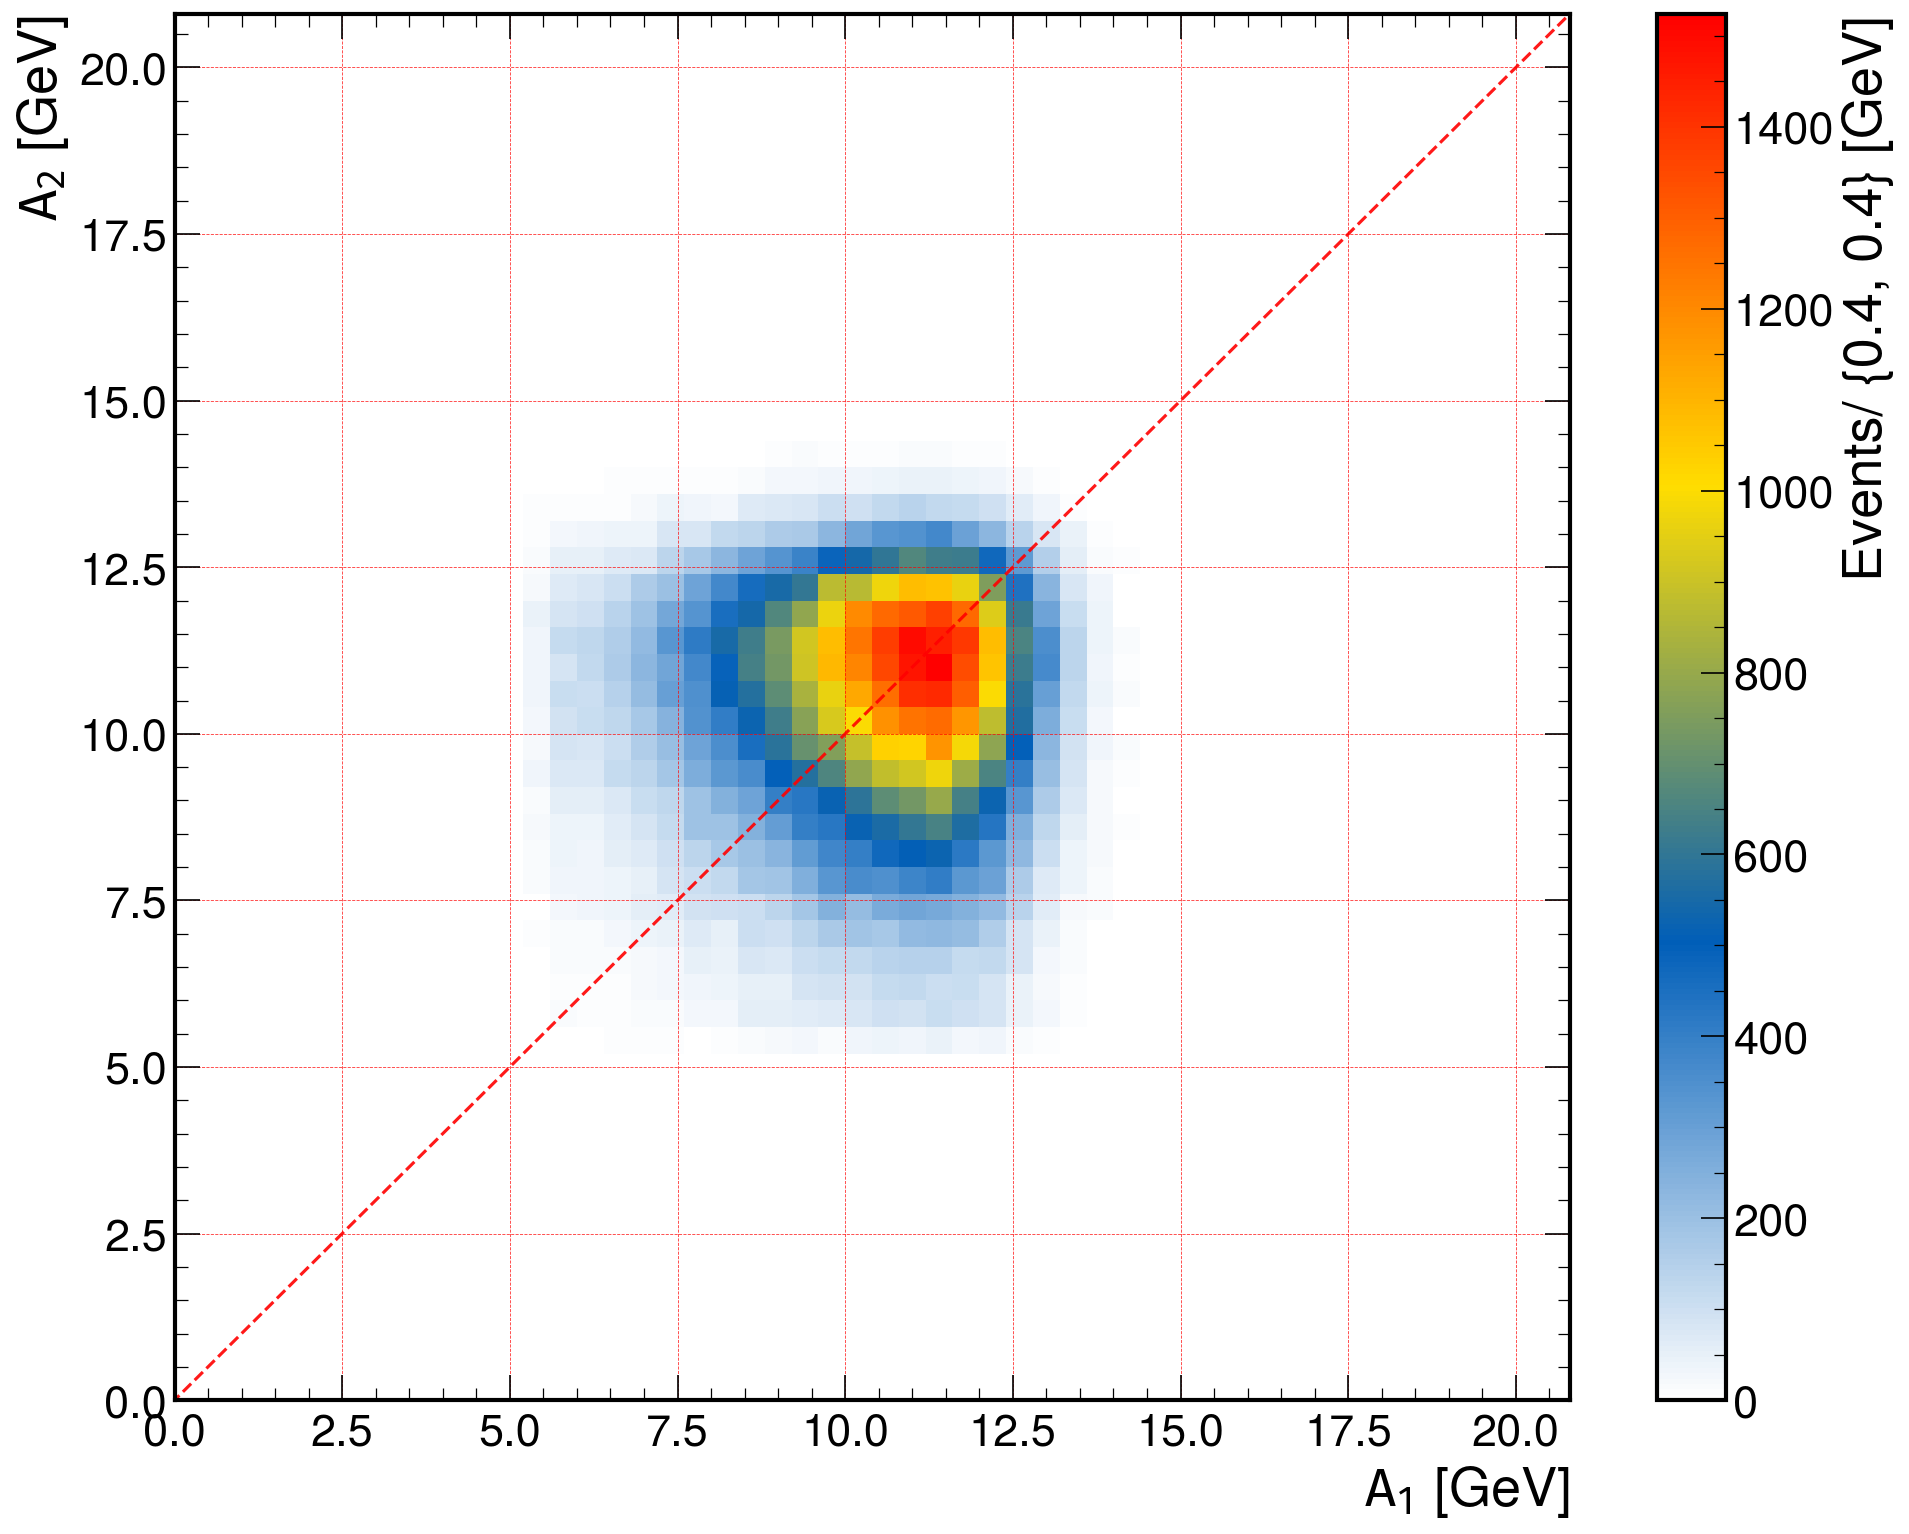

Signal Mass :  12


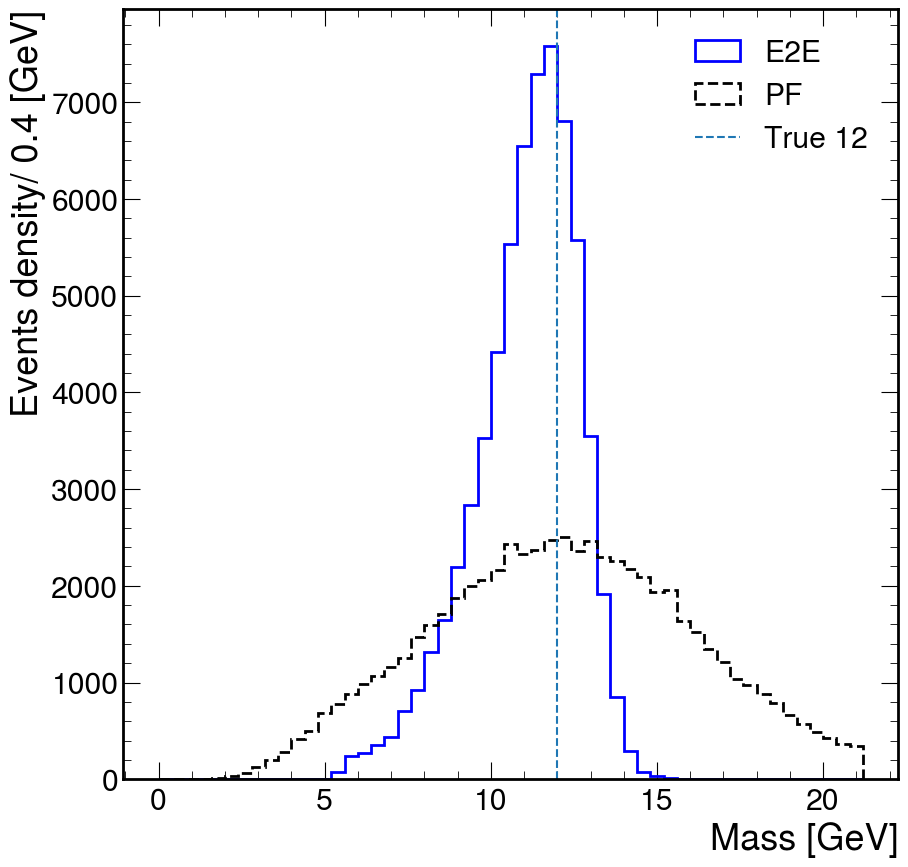

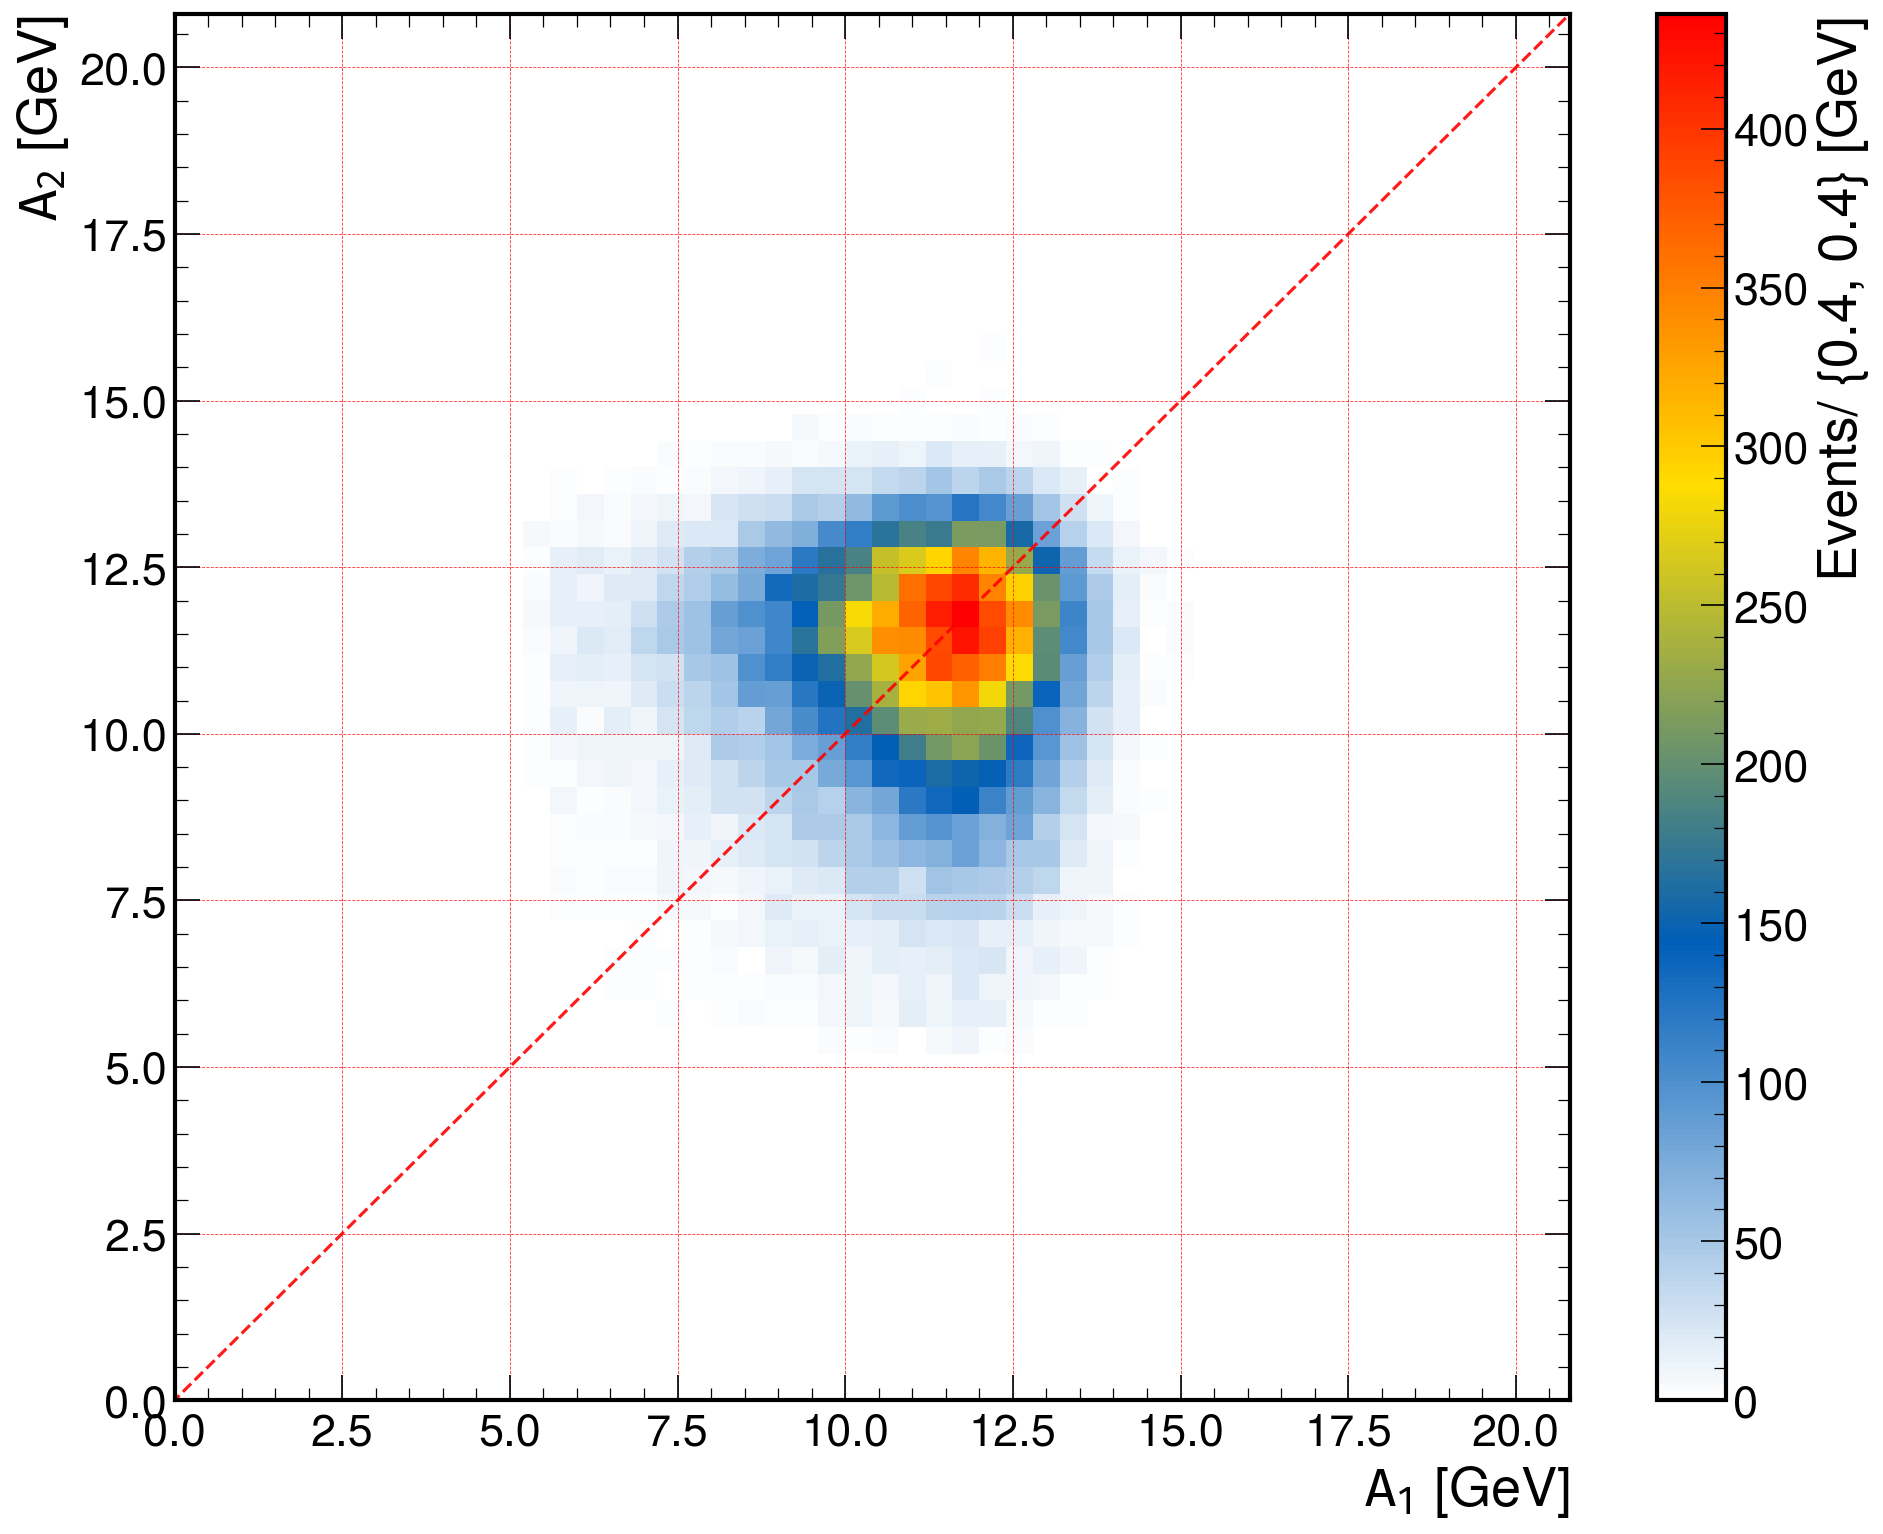

Signal Mass :  14


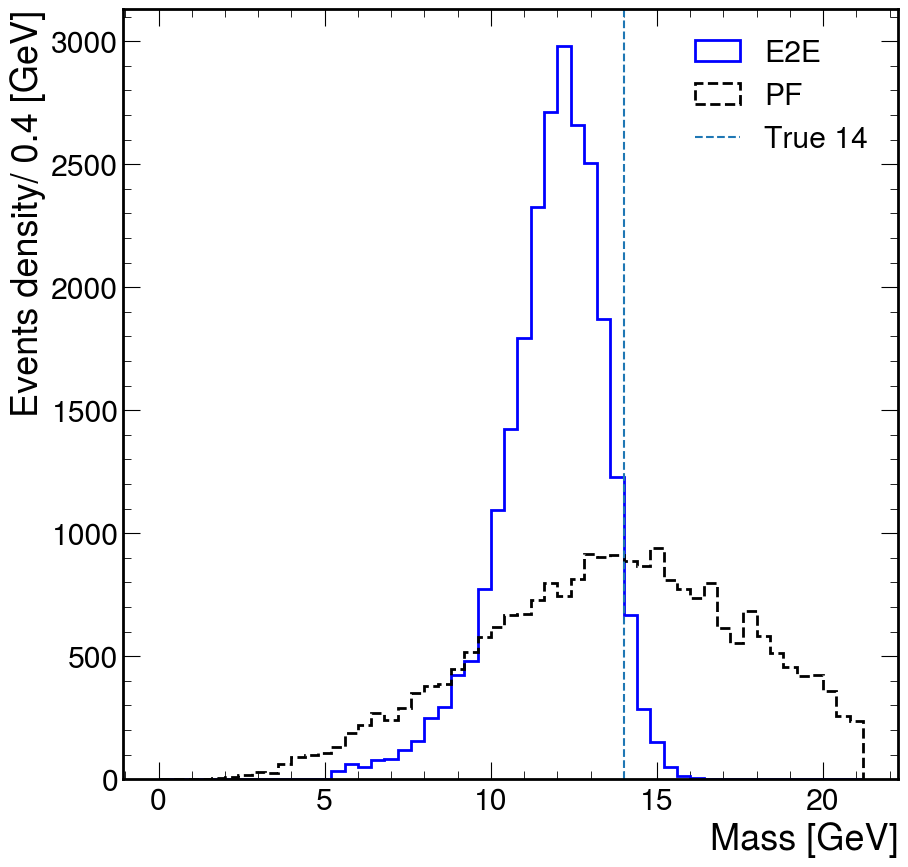

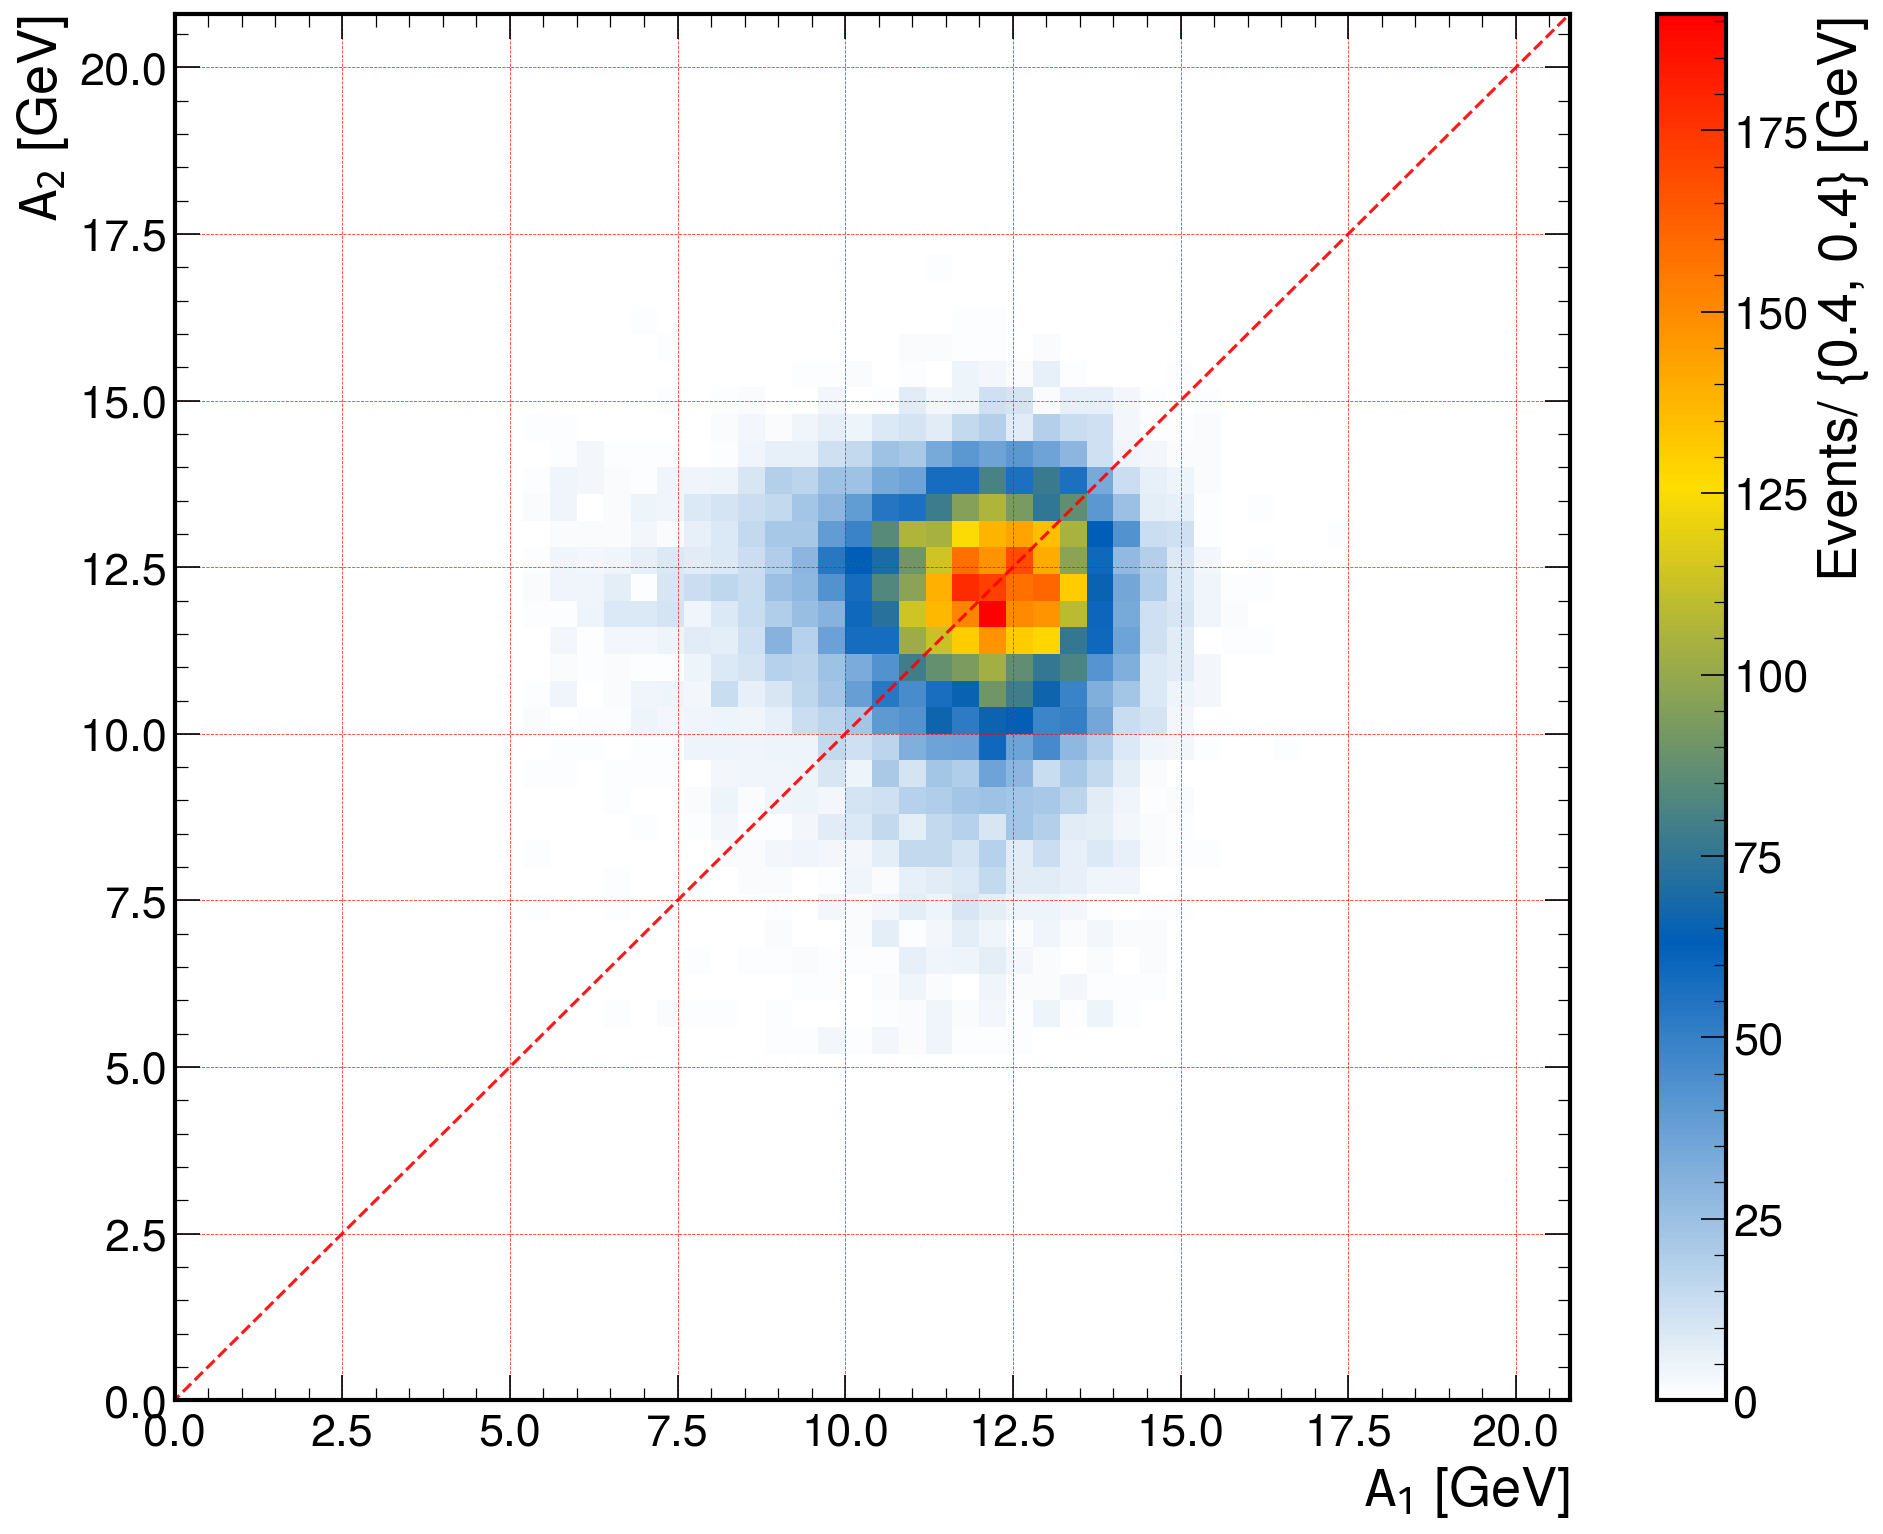

In [61]:
for m in Masses:
    plot_signal(Mass = m,corrected=True)

## Fitting with signal sample

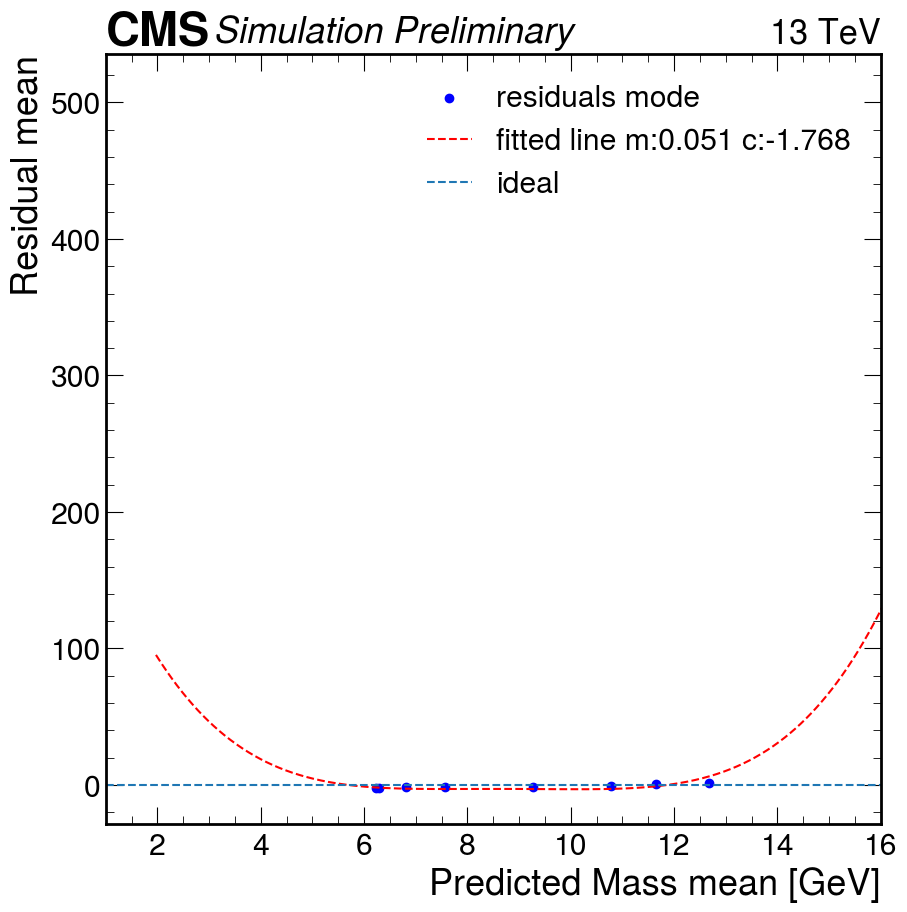

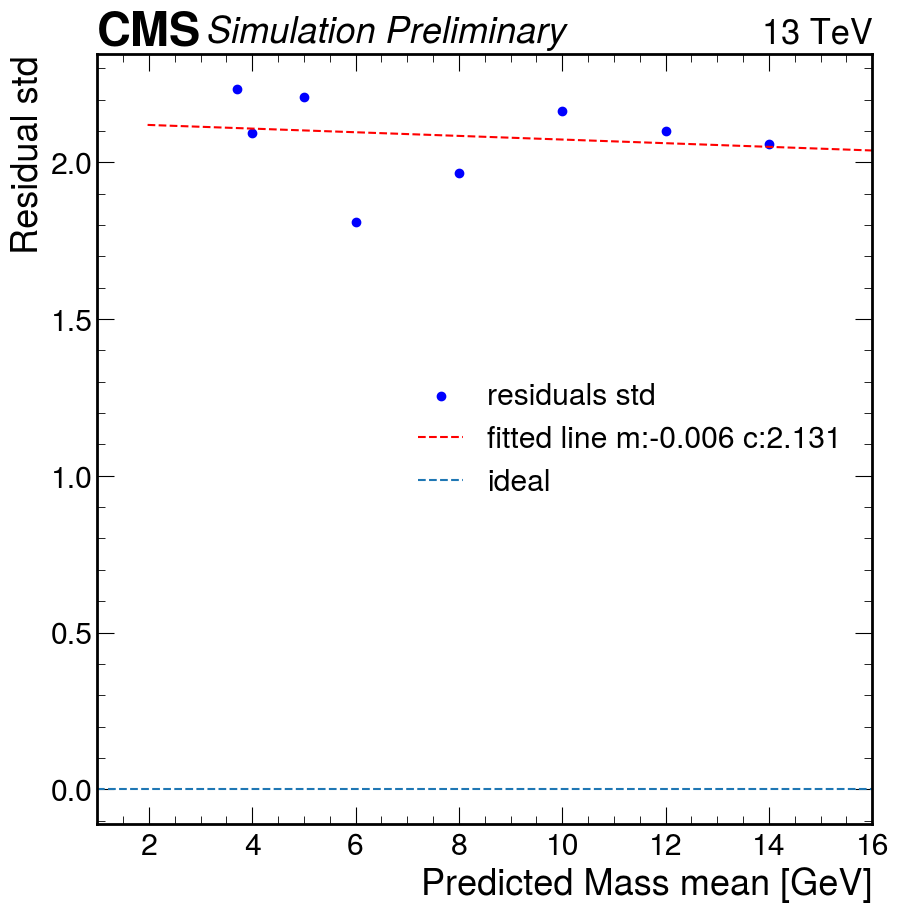

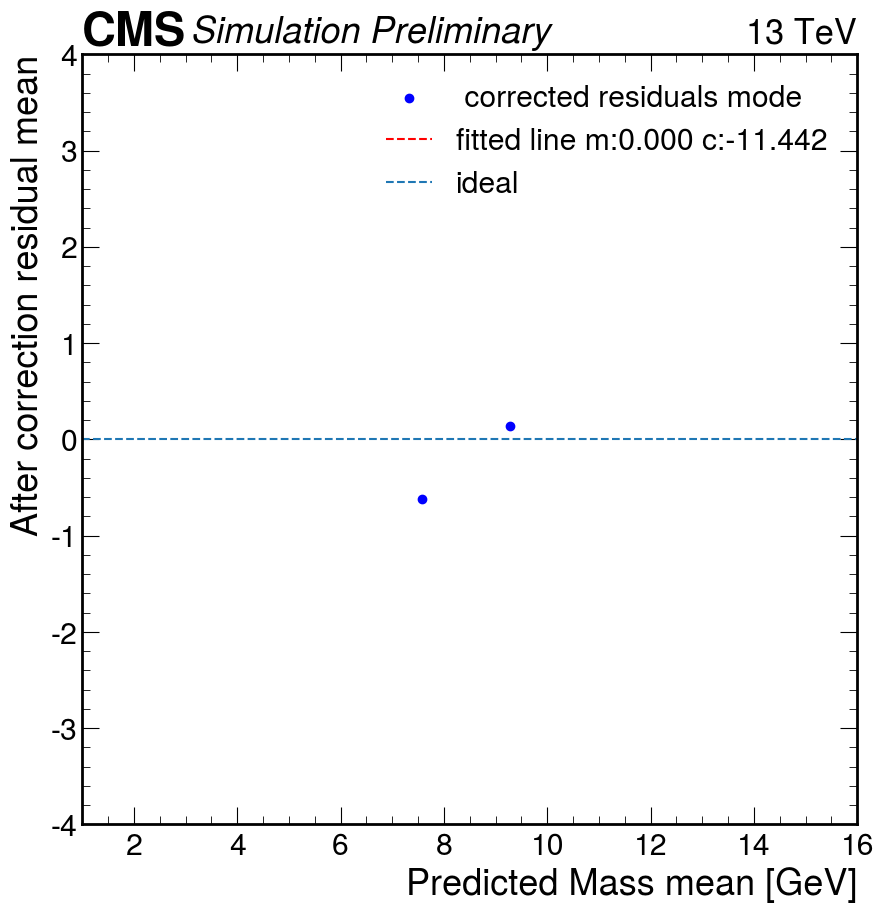

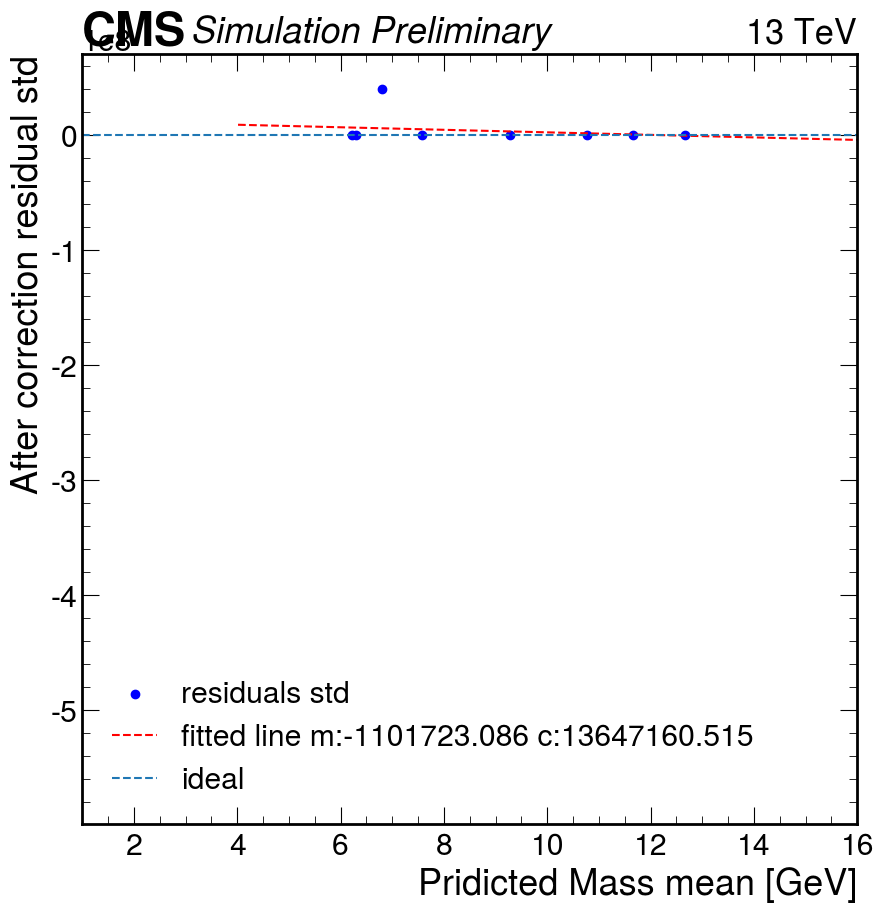

In [76]:
res_mean, res_std, res_mode = [], [], []
pred_mean, pred_std = [], []
signal_mass = [3.7,4,5,6,8,10,12,14]
Mass_point = ['3p7','4','5','6','8','10','12','14']
for Mass in Mass_point:
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    # print(mass)
    paths=np.sort(glob.glob(f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
    assert len(paths) > 0
    # print(f"{paths}")

    infile = open(f"{paths[0]}", "rb")
    data = pickle.load(infile)
    infile.close()
    m_true = data["m_true"]
    m_pred = data["m_pred"]
    pred_mean.append(np.mean(m_pred))
    pred_std.append(np.std(m_pred))
    residuals = m_true - m_pred
    mode = scipy.stats.mode(residuals)[0]
    mu, std = norm.fit(residuals)
    res_mean.append(mu)
    res_std.append(std)
    res_mode.append(mode)
    

res_mode = np.squeeze(res_mode)   
coeff_mean = np.polyfit(pred_mean, res_mode, 4)
polynomial_mean = np.poly1d(coeff_mean)
x = np.linspace(min(m_pred),max(m_pred), num=1000)
y_fit_mean = polynomial_mean(x)
fig, ax = plt.subplots()
plt.scatter(pred_mean, res_mean,color='b',marker='o',label='residuals mode')
plt.plot(x,y_fit_mean, color='r',linestyle='--', label = f"fitted line m:{coeff_mean[0]:.3f} c:{coeff_mean[1]:.3f}" )
plt.xlim(1,16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff_std = np.polyfit(pred_mean, res_std, 1)
polynomial_std = np.poly1d(coeff_std)
y_fit_std = polynomial_std(x)
fig, ax = plt.subplots()
plt.scatter(signal_mass,res_std,color='b',marker='o',label='residuals std')
plt.plot(x,y_fit_std, color='r',linestyle='--', label = f"fitted line m:{coeff_std[0]:.3f} c:{coeff_std[1]:.3f}" )
plt.xlim(1,16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("Residual std")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 





def corrected_pred(m):
    mass = m + polynomial_mean(m)
    return mass

res_mean, res_std, res_mode =[], [], []
pred_orig, pred_mean, pred_std =[], [], []
for Mass in Mass_point:
    mass  = {'3p7':3.7,'4':4, '5':5, '6':6, '8':8, '10':10, '12':12, '14':14}.get(Mass, None)
    # print(mass)
    paths=np.sort(glob.glob(f'{parent_folder_path}/INFERENCE_13_channels_aToTauTau_m1p2To17p2_pT30To180_M_{Mass}_H_AA_4Tau/epoch10_val_pseudoscala*.pkl'))
    assert len(paths) > 0
    # print(f"{paths}")

    infile = open(f"{paths[0]}", "rb")
    data = pickle.load(infile)
    infile.close()
    m_true = data["m_true"]
    m_pred = data["m_pred"]
    pred_orig.append(np.mean(m_pred))
    m_pred = corrected_pred(m_pred)
    pred_mean.append(np.mean(m_pred))
    pred_std.append(np.std(m_pred))
    
    residuals = m_true - m_pred
    mode = scipy.stats.mode(residuals)[0]
    mu, std = norm.fit(residuals)
    res_mean.append(mu)
    res_std.append(std)
    res_mode.append(mode)
    
    
    
res_mode = np.squeeze(res_mode)      
coeff = np.polyfit(pred_mean, res_mode, 1)
polynomial = np.poly1d(coeff)
x = np.linspace(min(m_pred),max(m_pred), num=1000)
y_fit = polynomial(x)
fig, ax = plt.subplots()
plt.scatter(pred_orig,res_mean,color='b',marker='o',label=' corrected residuals mode')
plt.plot(x,y_fit, color='r',linestyle='--', label = f"fitted line m:{coeff[0]:.3f} c:{coeff[1]:.3f}" )
plt.xlim(1,16)
plt.ylim(-4,4)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Predicted Mass mean [GeV]")
plt.ylabel("After correction residual mean")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 


coeff1 = np.polyfit(signal_mass, res_std, 1)
polynomial1 = np.poly1d(coeff1)
y_fit1 = polynomial1(x)
fig, ax = plt.subplots()
plt.scatter(pred_orig,res_std,color='b',marker='o',label='residuals std')
plt.plot(x,y_fit1, color='r',linestyle='--', label = f"fitted line m:{coeff1[0]:.3f} c:{coeff1[1]:.3f}" )
plt.xlim(1,16)
plt.axhline(y=0, linestyle='--', label="ideal")
plt.xlabel("Pridicted Mass mean [GeV]")
plt.ylabel("After correction residual std")
plt.legend()
plt.legend(loc='best')
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
plt.show() 

In [69]:
np.squeeze(res_mode)

array([-2.24415112, -2.22463274, -1.26358891, -4.53920841, -2.00966072,
       -3.94733429, -0.42143059,  6.0953207 ])

In [66]:
res_mean

[-2.525109589314371,
 -2.294013216934626,
 -1.8103137288864224,
 -1.5761917493810267,
 -1.2743176816538175,
 -0.7729828119357561,
 0.3459548349877247,
 1.3237783130704581]